The models mentioned in the report have bold Mark downs. The rest of my models and experiments are numbered differently.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

To ensure full reproducibility, a copy of the original dataset was retained prior to applying cleaning steps such as handling duplicates, missing data, and topic normalization. This allowed direct comparison of class distributions before and after cleaning, ensuring no unintended biases were introduced during preprocessing. This audit trail supports the reliability and transparency of the preprocessing workflow.

In [2]:
df = pd.read_csv('comp1804_coursework_dataset_24-25.csv')
print(df.head())
df_copy = df.copy()

   petition_ID                    has_entity  \
0       607158   EVENT:NO_DATE:NO_PERSON:NO_   
1       590629  EVENT:NO_DATE:YES_PERSON:NO_   
2       652724   EVENT:NO_DATE:NO_PERSON:NO_   
3       629281   EVENT:NO_DATE:NO_PERSON:NO_   
4       301747   EVENT:NO_DATE:NO_PERSON:NO_   

                    relevant_department  deviation_across_regions  \
0              Department for Education                  0.000137   
1  Department of Health and Social Care                  0.002133   
2  Department of Health and Social Care                  0.000272   
3                           HM Treasury                  0.000083   
4                                   NaN                       NaN   

  petition_status                petition_topic petition_importance  \
0    unsuccessful                     education       not_important   
1    unsuccessful  uk government and devolution           important   
2    unsuccessful        health and social care           important   
3    unsucce

# Basic Data EDA

In [ ]:
print("shape of the original dataset:" , df.shape)
print("shape of the copy of the  dataset:" , df_copy.shape)

shape of the original dataset: (8898, 8)
shape of the copy of the  dataset: (8898, 8)


In [ ]:
print("Dataset shape:", df_copy.shape)
print("Column Info:")
print(df_copy.info())
print("\nMissing Values Per Column:")
print(df_copy.isnull().sum())


Dataset shape: (8898, 8)
Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8898 entries, 0 to 8897
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   petition_ID               8898 non-null   int64  
 1   has_entity                8898 non-null   object 
 2   relevant_department       7099 non-null   object 
 3   deviation_across_regions  7321 non-null   float64
 4   petition_status           8898 non-null   object 
 5   petition_topic            8867 non-null   object 
 6   petition_importance       20 non-null     object 
 7   petition_text             8896 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 556.3+ KB
None

Missing Values Per Column:
petition_ID                    0
has_entity                     0
relevant_department         1799
deviation_across_regions    1577
petition_status                0
petition_topic                31
petition_im

petition_topic
environment and animal welfare    2389
health and social care            2128
economy, labour and welfare       1232
education                         1207
culture, sport and media          1062
uk government and devolution       741
london                              61
Health And Social Care              15
Environment And Animal Welfare      13
Economy, Labour And Welfare          6
Culture, Sport And Media             5
Education                            5
Uk Government And Devolution         2
London                               1
Name: count, dtype: int64


<ipython-input-3-d2b2b4949006>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="Blues_r")


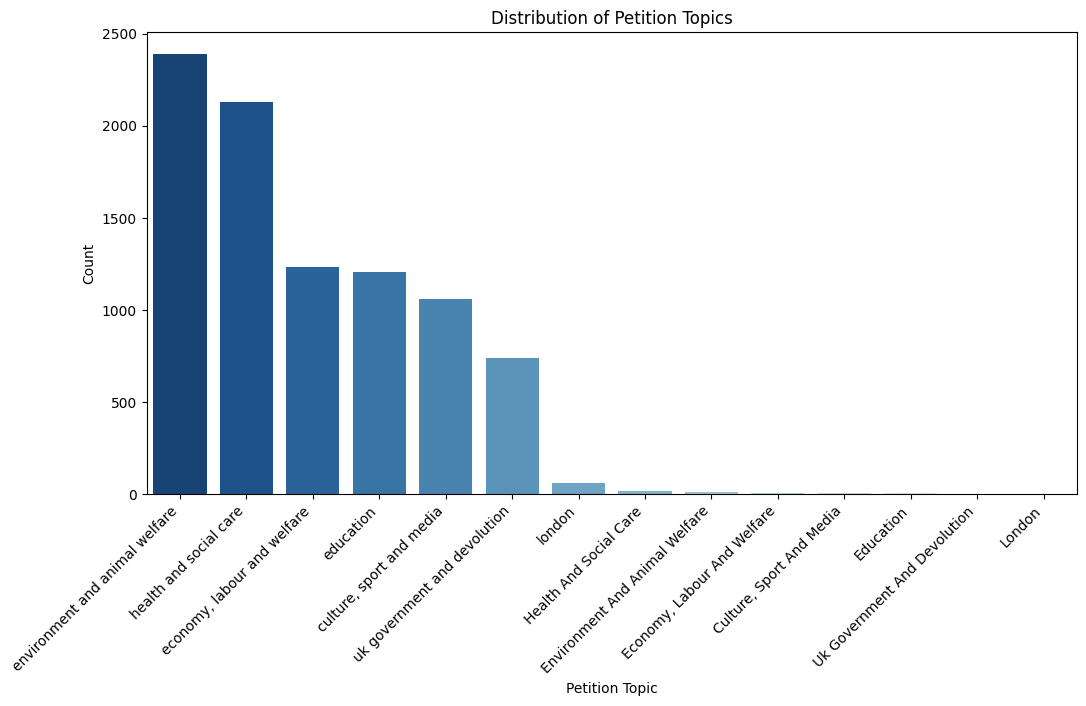

In [3]:
topic_counts = df_copy['petition_topic'].value_counts()

print(topic_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="Blues_r")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Petition Topic")
plt.ylabel("Count")
plt.title("Distribution of Petition Topics")
plt.show()


# EDA on Text (Raw data without any rows dropped, including nulls)

In [ ]:

import re
from collections import Counter

# Function to explore text cleanliness
def explore_text_cleanliness(df_copy, text_column='petition_text'):
    print("\n Exploring text cleanliness...\n")

    # Count rows with leading/trailing spaces
    leading_trailing_spaces = df_copy[text_column].apply(lambda x: isinstance(x, str) and x != x.strip()).sum()
    print(f" Rows with leading/trailing spaces: {leading_trailing_spaces}")

    # Count rows with multiple spaces inside
    multiple_spaces = df_copy[text_column].apply(lambda x: isinstance(x, str) and bool(re.search(r'\s{2,}', x))).sum()
    print(f" Rows with multiple spaces: {multiple_spaces}")

    # Count rows with newlines (\n)
    newlines = df_copy[text_column].apply(lambda x: isinstance(x, str) and '\n' in x).sum()
    print(f" Rows with newlines (\\n): {newlines}")

    # Count special characters (excluding normal letters, numbers, and spaces)
    special_chars_count = df_copy[text_column].apply(lambda x: len(re.findall(r'[^a-zA-Z0-9\s]', str(x))))
    print(f" Average special character count per text: {special_chars_count.mean():.2f}")

    # Display some sample texts with potential issues
    print("\n Sample texts with potential issues:\n")
    sample_issues = df_copy[df_copy[text_column].astype(str).str.contains(r'\s{2,}|\n', na=False)].sample(5, random_state=0)
    print(sample_issues[[text_column]].to_string(index=False))

# Run the function to explore text cleanliness
explore_text_cleanliness(df_copy)

# -------------------------------------------
# Function to find and count special characters
def find_special_characters(df_copy, text_column='petition_text'):
    all_text = " ".join(df_copy[text_column].dropna())  # Merge all text into one string
    special_chars = re.findall(r'[^a-zA-Z0-9\s]', all_text)  # Extract only special characters
    char_counts = Counter(special_chars)  # Count occurrences of each special character

    print("\n Most common special characters in dataset:\n")
    for char, count in char_counts.most_common(10):  # Show top 10 most common
        print(f"'{char}': {count} times")

# Run the function to check special character frequency
find_special_characters(df_copy)

# -------------------------------------------
# Count texts that have at least one uppercase letter (handling NaN values)
uppercase_count = df_copy["petition_text"].dropna().apply(lambda x: any(c.isupper() for c in str(x))).sum()

print(f"\n Texts containing uppercase letters: {uppercase_count}")



 Exploring text cleanliness...

 Rows with leading/trailing spaces: 0
 Rows with multiple spaces: 2979
 Rows with newlines (\n): 3384
 Average special character count per text: 12.05

 Sample texts with potential issues:

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [ ]:
import spacy
from collections import Counter

# Load SpaCy stopwords
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words

# Extract all words from the dataset before any cleaning (from raw `df_copy`)
all_words = " ".join(df_copy['petition_text'].dropna()).split()  # Join all text & split into words

# Count stopwords in the dataset
stopword_counts = Counter(word for word in all_words if word.lower() in stopwords)
stopword_percentage = sum(stopword_counts.values()) / len(all_words) * 100

# Print results
print(f"Percentage of words that are stopwords: {stopword_percentage:.2f}%")
print("Most Common Stopwords:")
print(stopword_counts.most_common(20))


Percentage of words that are stopwords: 46.74%
Most Common Stopwords:
[('to', 6020), ('the', 5981), ('and', 4492), ('of', 3321), ('a', 2569), ('for', 2402), ('in', 2135), ('is', 1674), ('be', 1583), ('are', 1512), ('on', 1240), ('that', 1238), ('have', 1043), ('should', 975), ('not', 896), ('with', 880), ('The', 859), ('their', 840), ('as', 838), ('this', 768)]


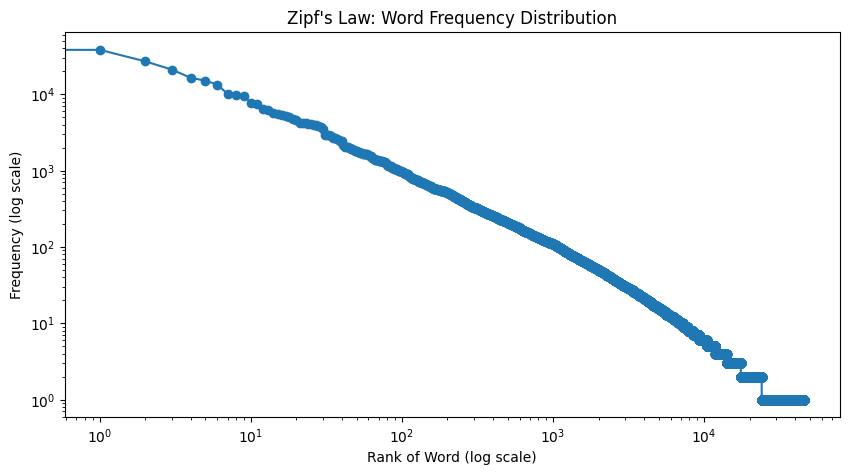

In [ ]:
# Get word frequencies
all_words = " ".join(df_copy['petition_text'].dropna()).split()
word_counts = Counter(all_words)
word_frequencies = np.array([count for _, count in word_counts.most_common()])

# Plot Zipf’s Law distribution
plt.figure(figsize=(10, 5))
plt.plot(word_frequencies, marker="o")
plt.yscale("log")
plt.xscale("log")
plt.title("Zipf's Law: Word Frequency Distribution")
plt.xlabel("Rank of Word (log scale)")
plt.ylabel("Frequency (log scale)")
plt.show()


The word frequency distribution in the dataset follows Zipf’s Law, confirming that a small number of common words dominate while most words appear infrequently. This aligns with natural language patterns. The presence of rare words suggests potential noise (e.g., typos, uncommon terms) that may require further analysis. Given the dominance of frequent words, removing stopwords may improve model performance.

Some Basic EDA was done but more exploration was done on this column after dropping the missing values and duplicates.

# Checking for hidden nulls

In [ ]:
def expanded_disguised_null_check(df):
    # Define a comprehensive set of suspicious placeholders
    placeholders = {
        'data missing', 'unknown', 'n/a', 'no information provided',
        '-', '???', 'null', 'none', 'test', 'placeholder', 'empty_test_petition', ''
    }

    # To also catch purely whitespace entries (which are hard to detect directly)
    def is_suspicious(value):
        value = str(value).strip().lower()
        if value in placeholders:
            return True
        if len(value) == 0:  # true empty string
            return True
        if len(value.replace(' ', '')) == 0:  # just spaces
            return True
        return False

    # Check every column
    results = {}
    for col in df.columns:
        if df[col].dtype == 'object':  # Only check object (string) columns
            suspicious_count = df[col].apply(is_suspicious).sum()
            if suspicious_count > 0:
                results[col] = suspicious_count

    # Report findings
    if not results:
        print("No disguised nulls found in any text column.")
    else:
        print(" Disguised nulls detected:")
        for col, count in results.items():
            print(f" - {col}: {count} suspicious entries")

# Run the check on df_copy
expanded_disguised_null_check(df_copy)


 Disguised nulls detected:
 - has_entity: 24 suspicious entries
 - petition_text: 13 suspicious entries


In [ ]:
# Check unique values and their counts for petition_status
print("Unique values in petition_status:")
print(df['petition_status'].value_counts(dropna=False))

print("\n---------------------\n")

# Check unique values and their counts for petition_topic
print("Unique values in petition_topic:")
print(df['petition_topic'].value_counts(dropna=False))


Unique values in petition_status:
petition_status
unsuccessful           6772
rejected               1581
successful_response     421
successful_debated      124
Name: count, dtype: int64

---------------------

Unique values in petition_topic:
petition_topic
environment and animal welfare    2389
health and social care            2128
economy, labour and welfare       1232
education                         1207
culture, sport and media          1062
uk government and devolution       741
london                              61
NaN                                 31
Health And Social Care              15
Environment And Animal Welfare      13
Economy, Labour And Welfare          6
Culture, Sport And Media             5
Education                            5
Uk Government And Devolution         2
London                               1
Name: count, dtype: int64


# Deviation Normality

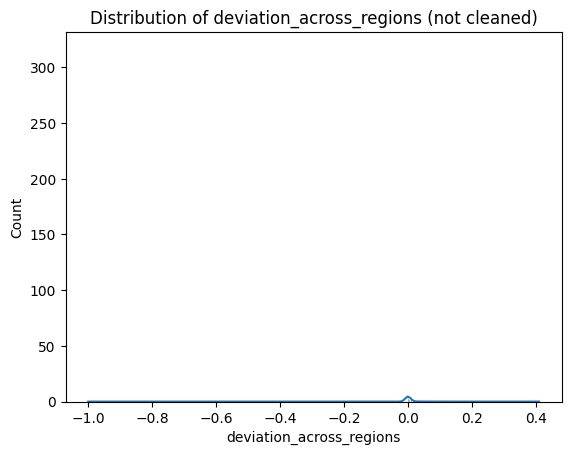

Shapiro-Wilk test for deviation_across_regions (not cleaned): statistic=0.0721, p-value=0.0000
deviation_across_regions (not cleaned) is NOT normally distributed (reject null hypothesis)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

def check_normality(column, title=""):
    # Plot
    sns.histplot(column.dropna(), kde=True)
    plt.title(f'Distribution of {title}')
    plt.show()

    # Shapiro-Wilk test
    stat, p = stats.shapiro(column.dropna())
    print(f"Shapiro-Wilk test for {title}: statistic={stat:.4f}, p-value={p:.4f}")

    if p < 0.05:
        print(f"{title} is NOT normally distributed (reject null hypothesis)")
    else:
        print(f"{title} is normally distributed (fail to reject null)")


check_normality(df_copy['deviation_across_regions'], "deviation_across_regions (not cleaned)")


#Handling Duplicates and Dropping identical rows

In [ ]:
duplicates = df_copy[df_copy.duplicated()]

print(f"Number of full row duplicates: {len(duplicates)}")
print(duplicates)


Number of full row duplicates: 378
      petition_ID                     has_entity  \
444        549814  EVENT:YES_DATE:YES_PERSON:NO_   
556        331040   EVENT:NO_DATE:YES_PERSON:NO_   
622        550886   EVENT:NO_DATE:YES_PERSON:NO_   
684        550136    EVENT:NO_DATE:NO_PERSON:NO_   
752        549594    EVENT:NO_DATE:NO_PERSON:NO_   
...           ...                            ...   
8815       334431    EVENT:NO_DATE:NO_PERSON:NO_   
8825       330424    EVENT:NO_DATE:NO_PERSON:NO_   
8835       333072    EVENT:NO_DATE:NO_PERSON:NO_   
8848       331945    EVENT:NO_DATE:NO_PERSON:NO_   
8853       548911    EVENT:NO_DATE:NO_PERSON:NO_   

                                    relevant_department  \
444   Department for Business, Energy and Industrial...   
556    Department for Digital, Culture, Media and Sport   
622                Department of Health and Social Care   
684   Department for Environment, Food and Rural Aff...   
752   Department for Environment, Food and Ru

In [ ]:
df_copy = df_copy.drop_duplicates(keep='first')
print(f"Shape after removing duplicates: {df_copy.shape}")


Shape after removing duplicates: (8520, 8)


In [ ]:
print("\nMissing Values Per Column:")
print(df_copy.isnull().sum())


Missing Values Per Column:
petition_ID                    0
has_entity                     0
relevant_department         1796
deviation_across_regions    1577
petition_status                0
petition_topic                31
petition_importance         8500
petition_text                  2
dtype: int64


# Exploring the Topic column

In [ ]:
# Convert all petition topics to lowercase and strip extra spaces
df_copy['petition_topic'] = df_copy['petition_topic'].str.strip().str.lower()

# Confirm that duplicates have merged
print("Unique topics after standardization:")
print(df_copy['petition_topic'].value_counts())


Unique topics after standardization:
petition_topic
environment and animal welfare    2297
health and social care            2046
economy, labour and welfare       1190
education                         1158
culture, sport and media          1017
uk government and devolution       721
london                              60
Name: count, dtype: int64


petition_topic
environment and animal welfare    2297
health and social care            2046
economy, labour and welfare       1190
education                         1158
culture, sport and media          1017
uk government and devolution       721
london                              60
Name: count, dtype: int64


<ipython-input-31-d2b2b4949006>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="Blues_r")


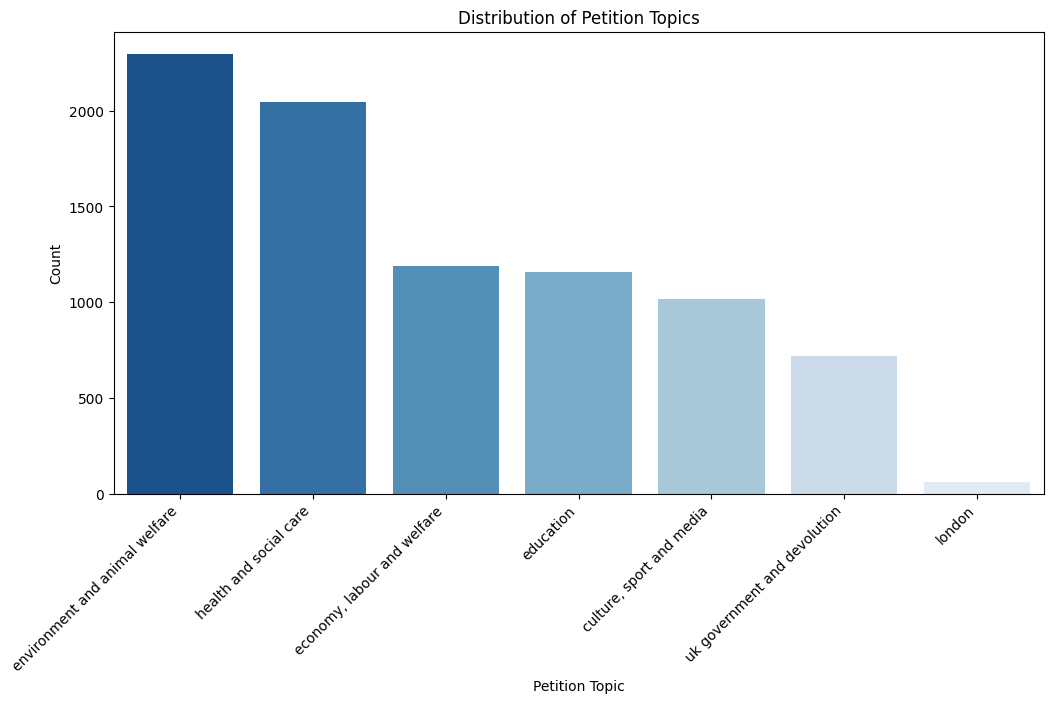

In [ ]:
topic_counts = df_copy['petition_topic'].value_counts()

print(topic_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="Blues_r")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Petition Topic")
plt.ylabel("Count")
plt.title("Distribution of Petition Topics")
plt.show()


# handling duplicates in petition_text
During data cleaning, we identified a set of placeholder petitions labeled as 'empty_test_petition'. These were removed as they do not represent real user-generated content and could negatively affect model training. A check for unusually short petitions was also performed to identify other low-quality data points, ensuring that only meaningful petitions were retained in the final dataset.
(in the process more empty place holders were found, in addition to missing values that are better to be dropped)

In [ ]:
text_duplicates = df_copy[df_copy.duplicated(subset=['petition_text'], keep=False)]
print(f"Number of duplicated petition_texts: {len(text_duplicates)}")


Number of duplicated petition_texts: 104


In [ ]:
conflicting_topic_counts = text_duplicates.groupby('petition_text')['petition_topic'].nunique()
conflicting_texts = conflicting_topic_counts[conflicting_topic_counts > 1].index

print(f"Number of petition texts with conflicting topics: {len(conflicting_texts)}")

# Optional: See them
conflict_df = df_copy[df_copy['petition_text'].isin(conflicting_texts)]
print(conflict_df[['petition_text', 'petition_topic']].sort_values('petition_text'))


Number of petition texts with conflicting topics: 4
                                          petition_text  \
8819  Fund band 6 pay for newly-qualified nurses. Th...   
7133  Fund band 6 pay for newly-qualified nurses. Th...   
4704  Introduce a Tax on unhealthy food to subsidise...   
832   Introduce a Tax on unhealthy food to subsidise...   
3267  Make Computer Science, Programming and AI mand...   
4664  Make Computer Science, Programming and AI mand...   
1418                                empty_test_petition   
1659                                empty_test_petition   
3249                                empty_test_petition   
3662                                empty_test_petition   
8428                                empty_test_petition   
5055                                empty_test_petition   
5079                                empty_test_petition   
6358                                empty_test_petition   
6458                                empty_test_petition   
6473

In [ ]:
print(f"Number of missing (null) petition_text entries: {df_copy['petition_text'].isnull().sum()}")
#this part was done in the info section but was repeated for the sake of keeping an arrangement

Number of missing (null) petition_text entries: 2


In [ ]:
# Find rows where petition_text is empty, only spaces, or very short
df_copy['text_length'] = df_copy['petition_text'].apply(lambda x: len(str(x).strip()))

# Show texts that are completely empty after stripping spaces
empty_texts = df_copy[df_copy['text_length'] == 0]
print(f"Number of completely empty petition texts: {len(empty_texts)}")
print(empty_texts[['petition_text', 'petition_topic']])


Number of completely empty petition texts: 0
Empty DataFrame
Columns: [petition_text, petition_topic]
Index: []


In [ ]:
# Find petitions with fewer than 5 words
short_texts = df_copy[df_copy['text_length'] <50]  #lowe than 5,6,7,8,..,10 were checked nothing except for the two nans were found
print(f"Number of suspiciously short petitions (<50 words): {len(short_texts)}")
print(short_texts[['petition_text', 'petition_topic']])


Number of suspiciously short petitions (<50 words): 15
            petition_text                  petition_topic
485   empty_test_petition        culture, sport and media
1392  empty_test_petition     economy, labour and welfare
1418  empty_test_petition        culture, sport and media
1659  empty_test_petition  environment and animal welfare
3249  empty_test_petition  environment and animal welfare
3662  empty_test_petition          health and social care
5055  empty_test_petition                       education
5079  empty_test_petition  environment and animal welfare
6288                  NaN    uk government and devolution
6358  empty_test_petition     economy, labour and welfare
6458  empty_test_petition  environment and animal welfare
6473  empty_test_petition          health and social care
7630                  NaN        culture, sport and media
8240  empty_test_petition                       education
8428  empty_test_petition  environment and animal welfare


In [ ]:
df_copy = df_copy.dropna(subset=['petition_text'])            #data shape went from 8520 to 8518 nulls
print(f"Shape after removing null or very short petition_text rows: {df_copy.shape}")


Shape after removing null or very short petition_text rows: (8518, 9)


In [ ]:
# Count missing (NaN) texts
missing_texts = df_copy['petition_text'].isnull().sum()
print(f"Number of completely missing petition_text entries (NaN): {missing_texts}")

# Count placeholders like "empty_test_petition"
placeholder_texts = (df_copy['petition_text'].str.strip().str.lower() == 'empty_test_petition').sum()
print(f"Number of placeholder petition_text entries ('empty_test_petition'): {placeholder_texts}")

# Optional: Check if there are any completely blank texts (spaces only)
blank_texts = (df_copy['petition_text'].str.strip() == '').sum()
print(f"Number of completely blank petition_text entries (just spaces): {blank_texts}")


Number of completely missing petition_text entries (NaN): 0
Number of placeholder petition_text entries ('empty_test_petition'): 13
Number of completely blank petition_text entries (just spaces): 0


In [ ]:
# Drop placeholders
df_copy = df_copy[df_copy['petition_text'].str.strip().str.lower() != 'empty_test_petition']

print(f"Shape after removing all empty/placeholder/blank petition_text rows: {df_copy.shape}") #went from 8518 to 8505 after dropping the placeholders


Shape after removing all empty/placeholder/blank petition_text rows: (8505, 9)


In [ ]:
# Find all duplicated petition_texts (ignoring other columns for now)
text_duplicates = df_copy[df_copy.duplicated(subset=['petition_text'], keep=False)]

print(f"Number of duplicated petition_text entries: {len(text_duplicates)}")


Number of duplicated petition_text entries: 89


In [ ]:
# Chechking for the duplicates again
conflicting_topic_counts = text_duplicates.groupby('petition_text')['petition_topic'].nunique()
conflicting_texts = conflicting_topic_counts[conflicting_topic_counts > 1].index

print(f"Number of petition texts with conflicting topics: {len(conflicting_texts)}")

conflict_df = df_copy[df_copy['petition_text'].isin(conflicting_texts)]
print(conflict_df[['petition_text', 'petition_topic']].sort_values('petition_text'))


Number of petition texts with conflicting topics: 3
                                          petition_text  \
7133  Fund band 6 pay for newly-qualified nurses. Th...   
8819  Fund band 6 pay for newly-qualified nurses. Th...   
832   Introduce a Tax on unhealthy food to subsidise...   
4704  Introduce a Tax on unhealthy food to subsidise...   
3267  Make Computer Science, Programming and AI mand...   
4664  Make Computer Science, Programming and AI mand...   

                      petition_topic  
7133    uk government and devolution  
8819                       education  
832           health and social care  
4704  environment and animal welfare  
3267  environment and animal welfare  
4664                       education  


In [ ]:
df_copy = df_copy.drop(index=[8819, 4704, 3267])

print(f"Shape after dropping rows 8819, 4704, and 3267: {df_copy.shape}")


Shape after dropping rows 8819, 4704, and 3267: (8502, 9)


During data cleaning, three petitions were identified where the same text appeared under conflicting topics. After manual review, the most contextually appropriate topic was selected for each case. The incorrect versions (rows 8819, 4704, and 3267) were directly removed, ensuring each petition text is represented only once with a consistent and correct topic label




In [ ]:
text_duplicates = df_copy[df_copy.duplicated(subset=['petition_text'], keep=False)]
print(f"Number of duplicated petition_texts: {len(text_duplicates)}")
#went from 89 to 83, 6 duplicates removed

Number of duplicated petition_texts: 83


In [ ]:
# Step 1: Find all duplicated petition_texts (both copies of each)
text_duplicates = df_copy[df_copy.duplicated(subset=['petition_text'], keep=False)]

# Step 2: Sort so each duplicate pair appears together
text_duplicates = text_duplicates.sort_values(['petition_text', 'petition_topic'])

# Step 3: Save to CSV
text_duplicates.to_csv('full_duplicates_review.csv', index=False)

print("Duplicates saved to 'full_duplicates_review.csv' — ready for download.")


Duplicates saved to 'full_duplicates_review.csv' — ready for download.


In [ ]:
# Dropping all the nulls in the topic column going from 8502 to 8471
df_copy = df_copy.dropna(subset=['petition_topic'])

print(f"Shape after removing rows with missing topics: {df_copy.shape}")


Shape after removing rows with missing topics: (8471, 9)


In [ ]:
# Re-run duplicate check to capture latest state
remaining_text_duplicates = df_copy[df_copy.duplicated(subset=['petition_text'], keep=False)]

# Sort so each duplicate pair appears right next to its twin (sorted by petition_text and topic)
remaining_text_duplicates = remaining_text_duplicates.sort_values(['petition_text', 'petition_topic'])

# Save to CSV file (show all columns for full context)
remaining_text_duplicates.to_csv('remaining_duplicates_review.csv', index=False)

print(f"Number of remaining duplicated petition_text entries: {len(remaining_text_duplicates)}")
print("Saved to 'remaining_duplicates_review.csv' — ready for download.")


Number of remaining duplicated petition_text entries: 21
Saved to 'remaining_duplicates_review.csv' — ready for download.


In [ ]:
# Drop duplicates based only on 'petition_text' (keeping the first occurrence) going from 8471 to 8460
df_copy = df_copy.drop_duplicates(subset=['petition_text'], keep='first')

# Check result
print(f"Shape after final deduplication: {df_copy.shape}")


Shape after final deduplication: (8460, 9)


all the duplicates were removed. The reasoning behind this decision is that the purpose of Task A (topic classification) is to train a model that learns to associate the content of a petition text with its topic. Allowing identical petitions to appear multiple times in training and testing would introduce a risk of overfitting, as the model could memorise specific text strings rather than learning generalisable language patterns indicative of each topic. Furthermore, since the topic and referenced entities are identical across duplicates, these records do not contribute any additional information relevant to the classification task. Therefore, removing these duplicates improves the true diversity of the training set, enhancing the model’s ability to generalise to unseen petitions.

Removing duplicates also ensures a cleaner alignment between text content and labels, particularly for Task A, where only text and referenced entities are used for prediction. By removing near-identical texts with inconsistent status labels, we avoid introducing ambiguity into the topic classifier’s training data, making it easier for the model to learn meaningful associations.

In [ ]:
# Checking the info after the changes that were applied
print("Column Info:")
print(df_copy.info())
print("\nMissing Values Per Column after dropping the extra text rows:")
print(df_copy.isnull().sum())



Column Info:
<class 'pandas.core.frame.DataFrame'>
Index: 8460 entries, 0 to 8897
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   petition_ID               8460 non-null   int64  
 1   has_entity                8460 non-null   object 
 2   relevant_department       6676 non-null   object 
 3   deviation_across_regions  6890 non-null   float64
 4   petition_status           8460 non-null   object 
 5   petition_topic            8460 non-null   object 
 6   petition_importance       20 non-null     object 
 7   petition_text             8460 non-null   object 
 8   text_length               8460 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 660.9+ KB
None

Missing Values Per Column after dropping the extra text rows:
petition_ID                    0
has_entity                     0
relevant_department         1784
deviation_across_regions    1570
petition_status  

# Handling the has_entity column

In [ ]:
# Find rows where 'has_entity' contains 'data missing'
missing_entity_rows = df_copy[df_copy['has_entity'].str.strip().str.lower() == 'data missing']

# Show how many and display them
print(f"Number of rows with 'data missing' in has_entity: {len(missing_entity_rows)}")

# See the actual rows for inspection
display(missing_entity_rows)


Number of rows with 'data missing' in has_entity: 24


petition_ID    has_entity  \
223        304253  data missing   
643        317373  data missing   
802        309860  data missing   
827        656276  data missing   
870        301737  data missing   
1157       304259  data missing   
1249       660682  data missing   
1627       320123  data missing   
1649       582331  data missing   
2034       616014  data missing   
2061       610244  data missing   
2137       580498  data missing   
2271       635234  data missing   
3648       610793  data missing   
3784       651459  data missing   
4481       637342  data missing   
4562       660078  data missing   
4686       317389  data missing   
5489       630647  data missing   
7767       306710  data missing   
7861       599214  data missing   
8033       596087  data missing   
8132       657789  data missing   
8895       302075  data missing   

                                    relevant_department  \
223                                                 NaN   
643                                                 NaN   
802                                                 NaN   
827                Department of Health and Social Care   
870   Department for Environment, Food and Rural Aff...   
1157                                                NaN   
1249                   Department for Work and Pensions   
1627                                                NaN   
1649                           Department for Transport   
2034                           Department for Education   
2061                           Department for Transport   
2137                           Department for Education   
2271                   Department for Work and Pensions   
3648                                        Home Office   
3784                                     Cabinet Office   
4481                   Department for Work and Pensions   
4562                   Department for Work and Pensions   
4686                                                NaN   
5489               Department of Health and Social Care   
7767                                                NaN   
7861                   Department for Work and Pensions   
8033                                        HM Treasury   
8132                           Department for Education   
8895                                                NaN   

      deviation_across_regions      petition_status  \
223                        NaN             rejected   
643                        NaN             rejected   
802                        NaN             rejected   
827                   0.000143         unsuccessful   
870                   0.000452         unsuccessful   
1157                       NaN             rejected   
1249                  0.009459  successful_response   
1627                       NaN             rejected   
1649                  0.006973         unsuccessful   
2034                  0.000041         unsuccessful   
2061                  0.000048         unsuccessful   
2137                  0.000374         unsuccessful   
2271                  0.000048         unsuccessful   
3648                  0.000420         unsuccessful   
3784                  0.000042         unsuccessful   
4481                  0.000092         unsuccessful   
4562                  0.000846         unsuccessful   
4686                       NaN             rejected   
5489                  0.000122         unsuccessful   
7767                       NaN             rejected   
7861                  0.000077         unsuccessful   
8033                  0.000154         unsuccessful   
8132                  0.000032         unsuccessful   
8895                       NaN             rejected   

                      petition_topic petition_importance  \
223      economy, labour and welfare                 NaN   
643         culture, sport and media                 NaN   
802      economy, labour and welfare                 NaN   
827           health and social care  

Distribution of 'has_entity' column:
has_entity
EVENT:NO_DATE:NO_PERSON:NO_       3976
EVENT:NO_DATE:YES_PERSON:NO_      2841
EVENT:NO_DATE:NO_PERSON:YES_       776
EVENT:NO_DATE:YES_PERSON:YES_      690
EVENT:YES_DATE:YES_PERSON:NO_       72
EVENT:YES_DATE:NO_PERSON:NO_        51
data missing                        24
EVENT:YES_DATE:YES_PERSON:YES_      22
EVENT:YES_DATE:NO_PERSON:YES_        8
Name: count, dtype: int64


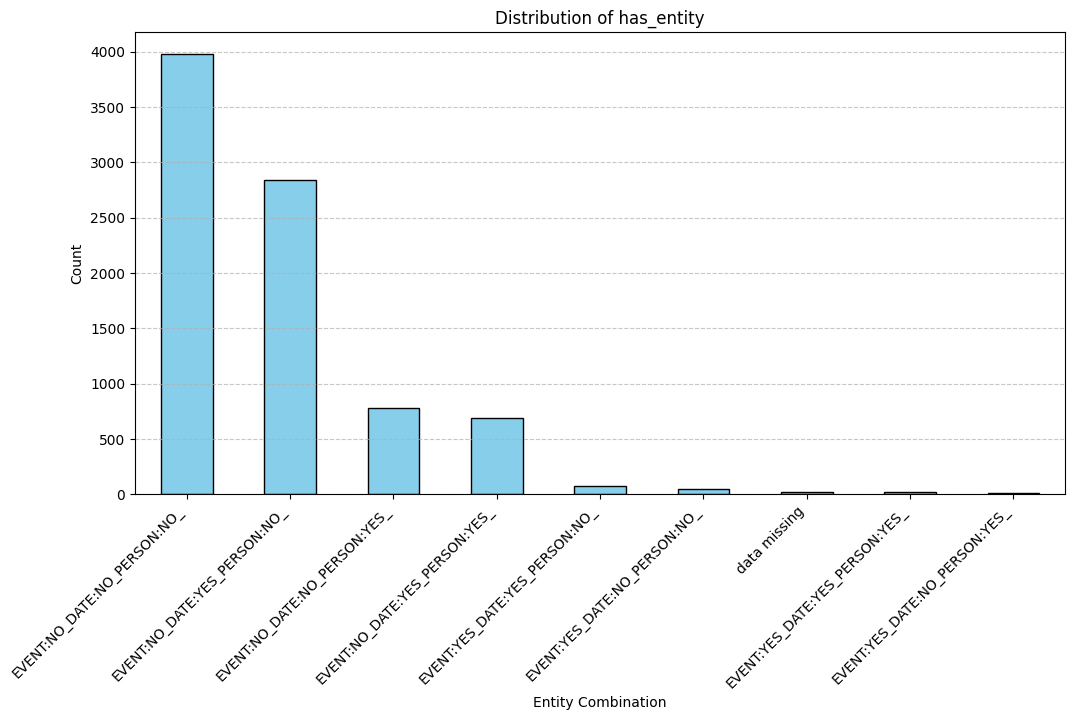

In [ ]:
# Distribution of has_entity column
print("Distribution of 'has_entity' column:")
print(df_copy['has_entity'].value_counts())

# Optional: Visualise it
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_copy['has_entity'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of has_entity')
plt.xlabel('Entity Combination')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
df_copy = df_copy[df_copy['has_entity'].str.strip().str.lower() != 'data missing']
print(f"Shape after dropping 'data missing' rows: {df_copy.shape}")


Shape after dropping 'data missing' rows: (8436, 9)


The has_entity column contained 24 rows labelled as "data missing", indicating failed entity extraction. These rows were removed because they provide no useful entity information for topic classification, and retaining them would only introduce noise into the model.

# Handling The Relevant Department Column

In [ ]:
print(f"Missing values in relevant_department: {df_copy['relevant_department'].isnull().sum()}")

print("\nUnique department names (raw):")
print(df_copy['relevant_department'].unique())

print("\nDepartment frequency counts:")
print(df_copy['relevant_department'].value_counts())


Missing values in relevant_department: 1776

Unique department names (raw):
['Department for Education' 'Department of Health and Social Care'
 'HM Treasury' nan 'Department for Digital, Culture, Media and Sport'
 'Department for Business, Energy and Industrial Strategy'
 'Department for Environment, Food and Rural Affairs'
 'Department for Transport' 'Department for Energy Security and Net Zero'
 'Department for Business and Trade'
 'Office of the Leader of the House of Commons' 'Home Office'
 'Cabinet Office' 'Department for Work and Pensions'
 'Department for Levelling Up, Housing and Communities '
 'Ministry of Justice'
 'Ministry of Housing, Communities & Local Government'
 'Foreign, Commonwealth & Development Office'
 'Department for International Trade'
 'Department for Culture, Media and Sport'
 'Department for Science, Innovation and Technology'
 'Office of the Secretary of State for Wales'
 'Office of the Secretary of State for Scotland' 'Ministry of Defence'
 'Northern Irela

All textual columns were converted to lowercase and trimmed of extra spaces during the initial cleaning phase, prior to any train/test split. This standardisation step prevents case inconsistencies from introducing unnecessary complexity into the modelling process and does not introduce any data leakage, as it is applied uniformly across the entire dataset

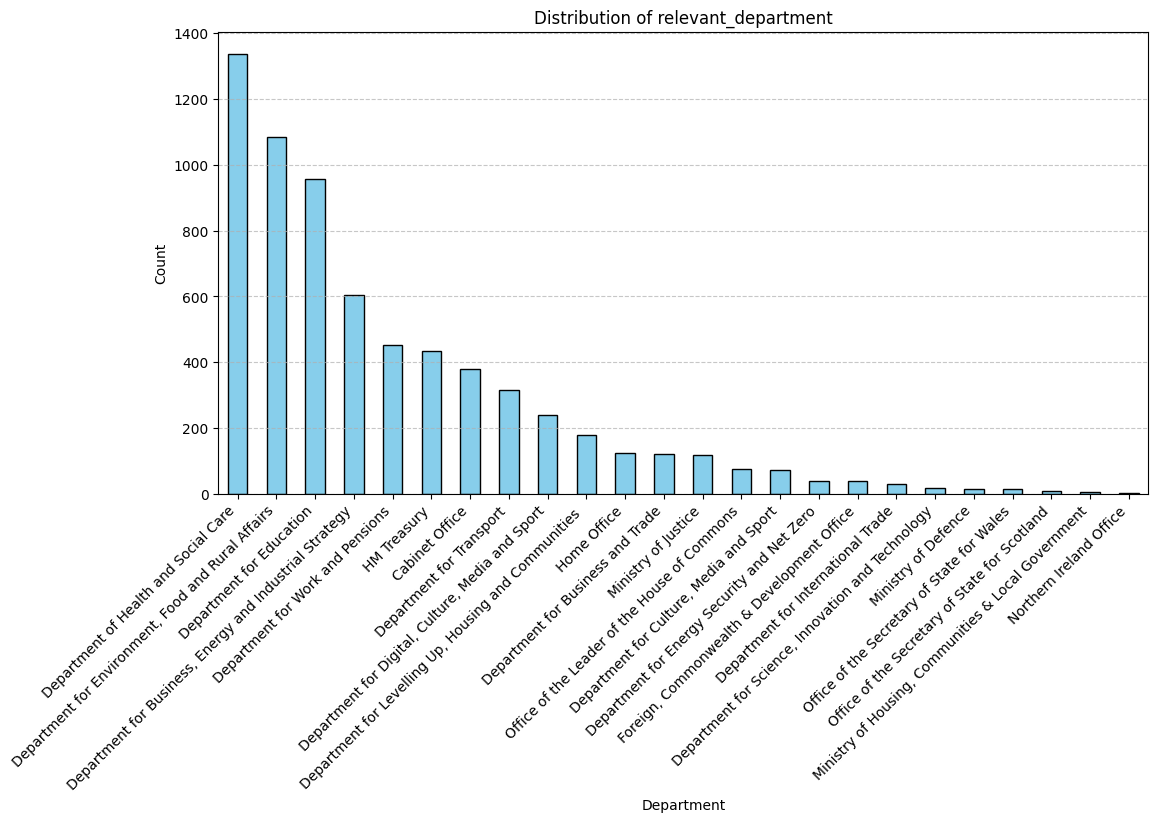

In [ ]:
df_copy['relevant_department'].value_counts().plot(kind='bar', figsize=(12,6), color='skyblue', edgecolor='black')
plt.title('Distribution of relevant_department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


https://www.gov.uk/government/organisations
The relevant_department column was cleaned to ensure consistency and alignment with official department names sourced directly from gov.uk. This involved:

    Removing trailing spaces and converting all text to lowercase.
    Standardising outdated or inconsistent names (e.g., replacing Ministry of Housing, Communities & Local Government with Department for Levelling Up, Housing and Communities).
    Replacing missing values with the placeholder "empty" to maintain consistent formatting across the dataset.



In [ ]:
# Step 1: Convert to lowercase and strip spaces FIRST
df_copy['relevant_department'] = df_copy['relevant_department'].str.strip().str.lower()

# Standardize department names with correct mapping
department_mapping = {
    'department for digital, culture, media and sport': 'department for culture, media and sport',
    'department for levelling up, housing and communities': 'ministry of housing, communities & local government',
    'department for international trade': 'department for business and trade'
}

# Apply the mapping
df_copy['relevant_department'] = df_copy['relevant_department'].replace(department_mapping)

# Confirm changes
print("Unique departments after final cleaning:")
print(df_copy['relevant_department'].value_counts())

Unique departments after final cleaning:
relevant_department
department of health and social care                       1338
department for environment, food and rural affairs         1085
department for education                                    956
department for business, energy and industrial strategy     605
department for work and pensions                            453
hm treasury                                                 435
cabinet office                                              378
department for transport                                    314
department for culture, media and sport                     311
ministry of housing, communities & local government         184
department for business and trade                           149
home office                                                 123
ministry of justice                                         119
office of the leader of the house of commons                 74
department for energy security and net zero

In [ ]:
print("Columns and Data Types:")
print(df_copy.info())

print("\nRemaining Missing Values Per Column:")
print(df_copy.isnull().sum())


Columns and Data Types:
<class 'pandas.core.frame.DataFrame'>
Index: 8436 entries, 0 to 8897
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   petition_ID               8436 non-null   int64  
 1   has_entity                8436 non-null   object 
 2   relevant_department       6660 non-null   object 
 3   deviation_across_regions  6874 non-null   float64
 4   petition_status           8436 non-null   object 
 5   petition_topic            8436 non-null   object 
 6   petition_importance       20 non-null     object 
 7   petition_text             8436 non-null   object 
 8   text_length               8436 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 659.1+ KB
None

Remaining Missing Values Per Column:
petition_ID                    0
has_entity                     0
relevant_department         1776
deviation_across_regions    1562
petition_status                

The petition_importance column was retained during data cleaning, but not actively modified, since its role is specific to Task 2.
checking distribution again bc the shape of the data has been changed now.

# EDA on text again after dropping rows, missing values,...

In [ ]:
import re

       text_length   word_count
count  8436.000000  8436.000000
mean    648.841275   108.073495
std     203.603327    33.687906
min      60.000000     9.000000
25%     512.000000    86.000000
50%     695.000000   115.000000
75%     814.000000   134.000000
max    1175.000000   211.000000


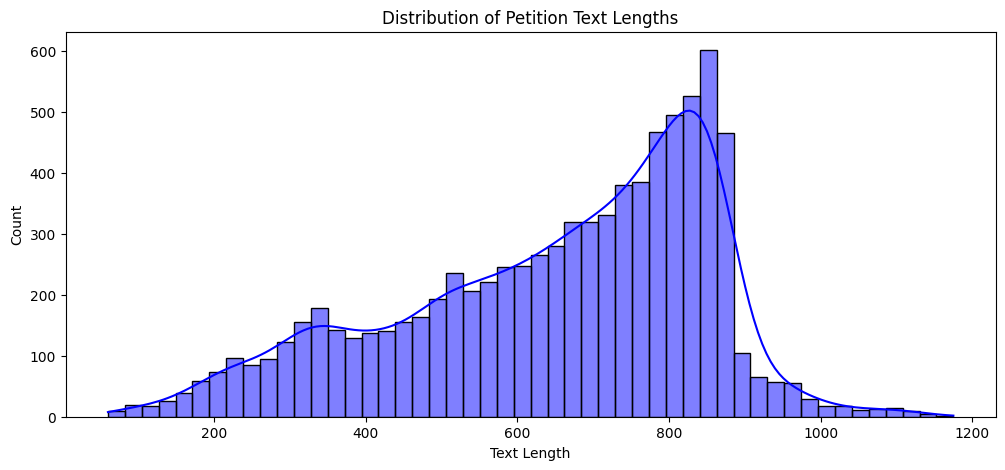

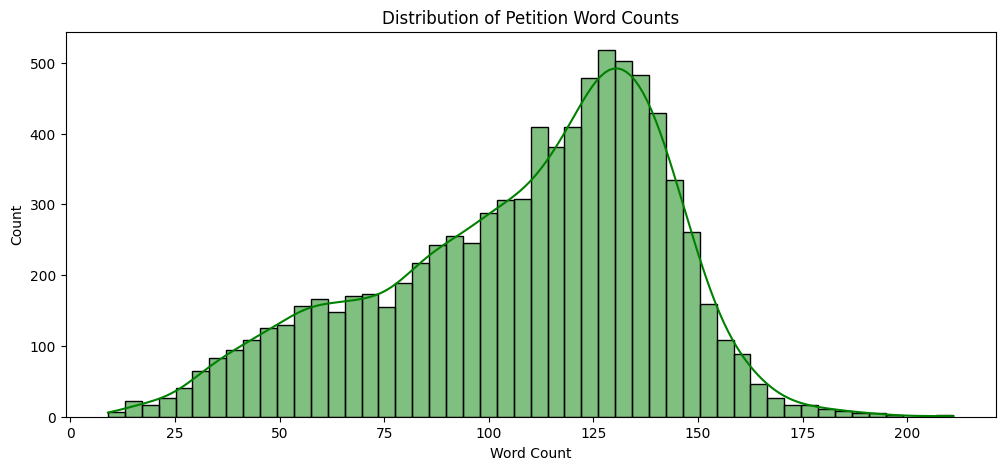

In [ ]:
# Add text length and word count features
df_copy['text_length'] = df_copy['petition_text'].apply(len)
df_copy['word_count'] = df_copy['petition_text'].apply(lambda x: len(str(x).split()))

# Summary statistics
print(df_copy[['text_length', 'word_count']].describe())

# Plot histograms for text length and word count
plt.figure(figsize=(12, 5))
sns.histplot(df_copy['text_length'], bins=50, kde=True, color='blue')
plt.xlabel("Text Length")
plt.title("Distribution of Petition Text Lengths")
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df_copy['word_count'], bins=50, kde=True, color='green')
plt.xlabel("Word Count")
plt.title("Distribution of Petition Word Counts")
plt.show()


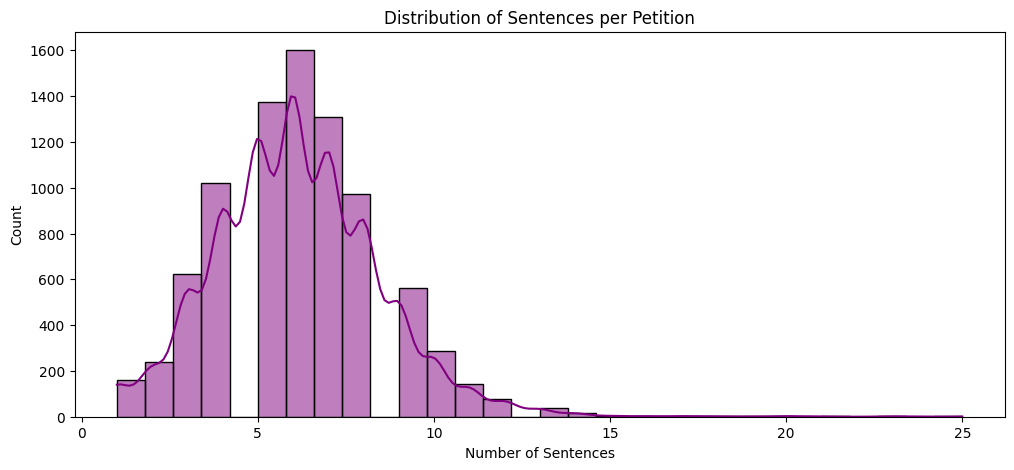

In [ ]:
# Function to count sentences in a text
def count_sentences(text):
    return len(re.split(r'[.!?]', text)) - 1  # Simple split on punctuations

# Compute sentence-related features
df_copy['sentence_count'] = df_copy['petition_text'].apply(count_sentences)
df_copy['avg_words_per_sentence'] = df_copy['word_count'] / (df_copy['sentence_count'] + 1)  # Avoid division by zero

# Plot sentence count distribution
plt.figure(figsize=(12, 5))
sns.histplot(df_copy['sentence_count'], bins=30, kde=True, color='purple')
plt.xlabel("Number of Sentences")
plt.title("Distribution of Sentences per Petition")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-46-d8b1b3ff4595>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Word", data=df_most_common, palette="Blues_r")


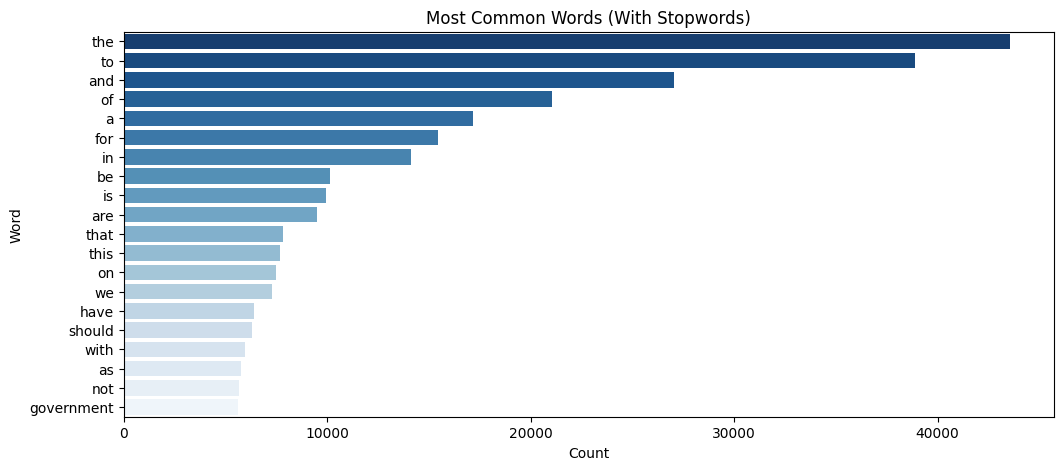

<ipython-input-46-d8b1b3ff4595>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Word", data=df_filtered_common, palette="Greens_r")


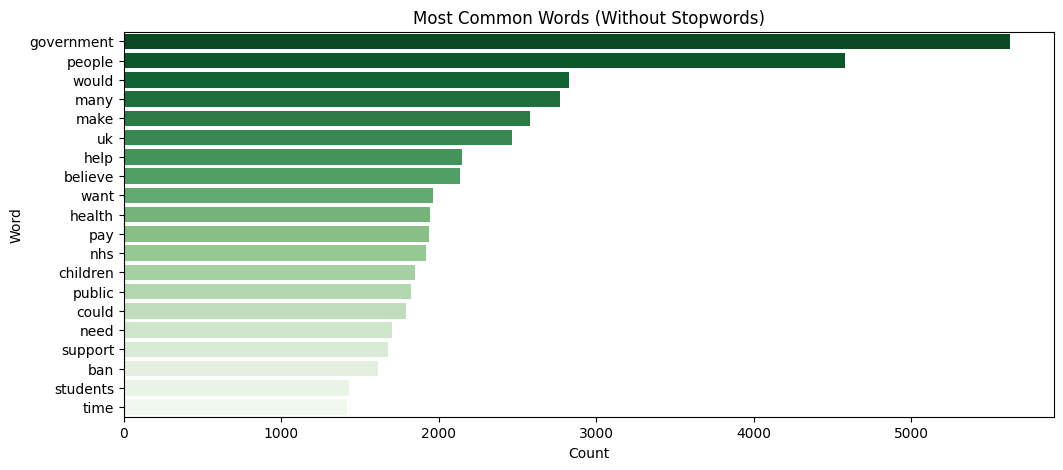

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Extract all words from petition_text
all_words = " ".join(df_copy['petition_text']).lower().split()

# Get word frequencies before removing stopwords
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)

# Get word frequencies after removing stopwords
filtered_words = [word for word in all_words if word not in stop_words]
filtered_word_counts = Counter(filtered_words)
most_common_filtered_words = filtered_word_counts.most_common(20)

# Convert to DataFrame
df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Count'])
df_filtered_common = pd.DataFrame(most_common_filtered_words, columns=['Word', 'Count'])

# Plot Most Common Words
plt.figure(figsize=(12, 5))
sns.barplot(x="Count", y="Word", data=df_most_common, palette="Blues_r")
plt.title("Most Common Words (With Stopwords)")
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x="Count", y="Word", data=df_filtered_common, palette="Greens_r")
plt.title("Most Common Words (Without Stopwords)")
plt.show()


  Character  Count
0         .  50462
1         ,  26996
2         '   7339
3         -   6555
4         /   1619
5         £   1546
6         &   1400
7         %   1342
8         "    963
9         :    676


<ipython-input-58-96184de7a774>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Character", data=df_special_chars, palette="Reds_r")


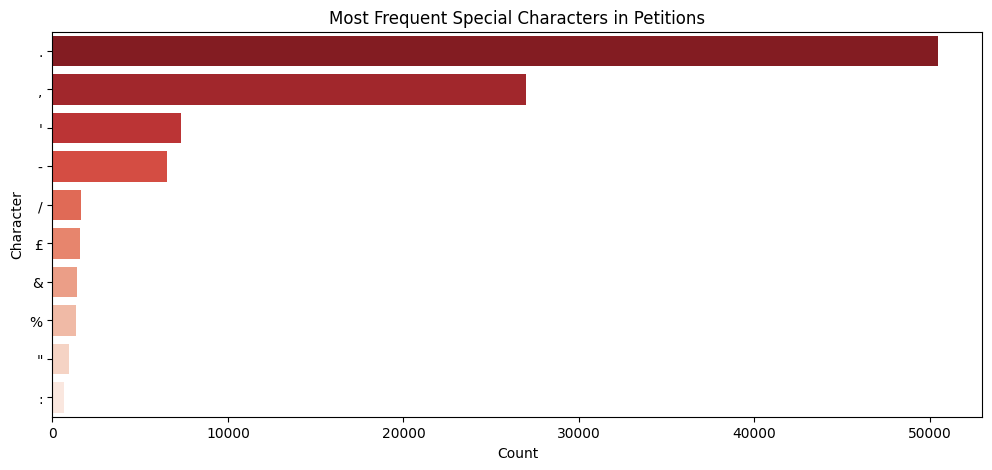

In [ ]:
import re

# Find special characters
special_chars = re.findall(r'[^a-zA-Z0-9\s]', " ".join(df_copy['petition_text']))
special_char_counts = Counter(special_chars).most_common(10)

# Display
df_special_chars = pd.DataFrame(special_char_counts, columns=['Character', 'Count'])
print(df_special_chars)

# Convert to DataFrame
df_special_chars = pd.DataFrame(special_char_counts, columns=['Character', 'Count'])

# Plot Special Characters
plt.figure(figsize=(12, 5))
sns.barplot(x="Count", y="Character", data=df_special_chars, palette="Reds_r")
plt.title("Most Frequent Special Characters in Petitions")
plt.show()


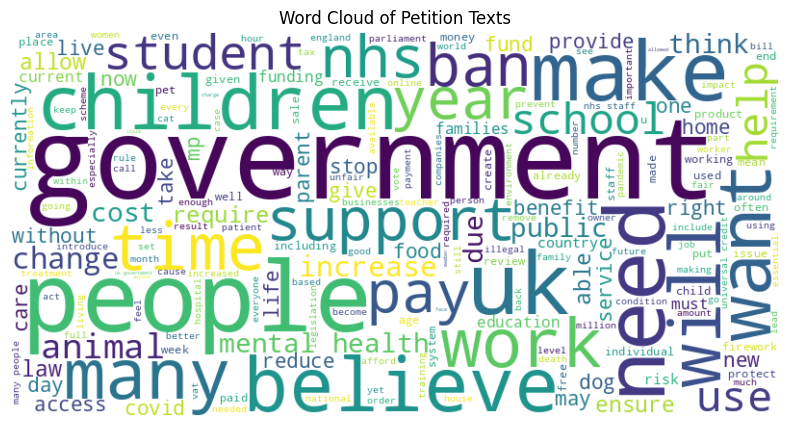

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Petition Texts')
plt.show()


#petition_status

petition_status
unsuccessful           6368
rejected               1562
successful_response     389
successful_debated      117
Name: count, dtype: int64


<ipython-input-57-37fb1bf57bc8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette="Blues_r")


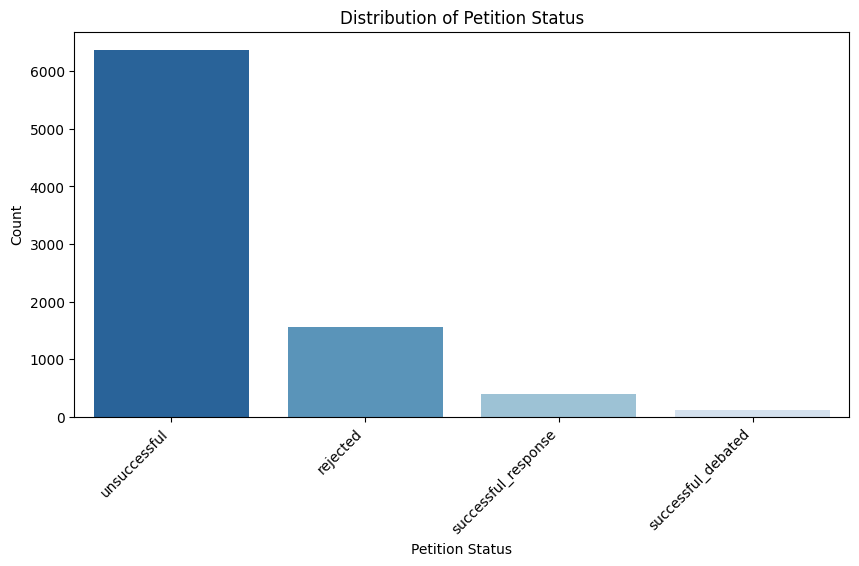

In [ ]:
status_counts = df_copy['petition_status'].value_counts()

print(status_counts)

plt.figure(figsize=(10, 5))
sns.barplot(x=status_counts.index, y=status_counts.values, palette="Blues_r")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Petition Status")
plt.ylabel("Count")
plt.title("Distribution of Petition Status")
plt.show()

#Class imbalance recheck before splitting
Prior to data splitting, the distributions of key features were examined to identify any class imbalance, missing data patterns, or skewness that could influence the train-test split process.


petition_topic Distribution:
petition_topic
environment and animal welfare    0.270863
health and social care            0.241465
economy, labour and welfare       0.139995
education                         0.136083
culture, sport and media          0.119725
uk government and devolution      0.084756
london                            0.007112
Name: proportion, dtype: float64


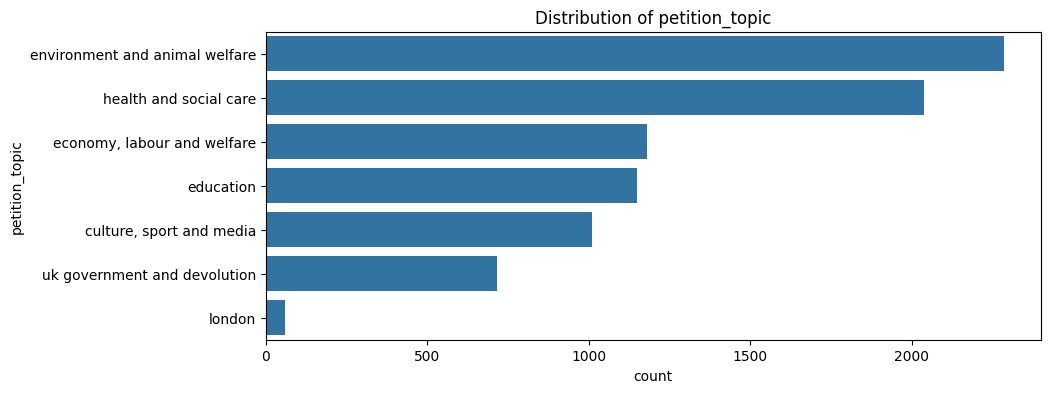


relevant_department Distribution:
relevant_department
department of health and social care                       0.200901
department for environment, food and rural affairs         0.162913
department for education                                   0.143544
department for business, energy and industrial strategy    0.090841
department for work and pensions                           0.068018
hm treasury                                                0.065315
cabinet office                                             0.056757
department for transport                                   0.047147
department for culture, media and sport                    0.046697
ministry of housing, communities & local government        0.027628
department for business and trade                          0.022372
home office                                                0.018468
ministry of justice                                        0.017868
office of the leader of the house of commons               0.

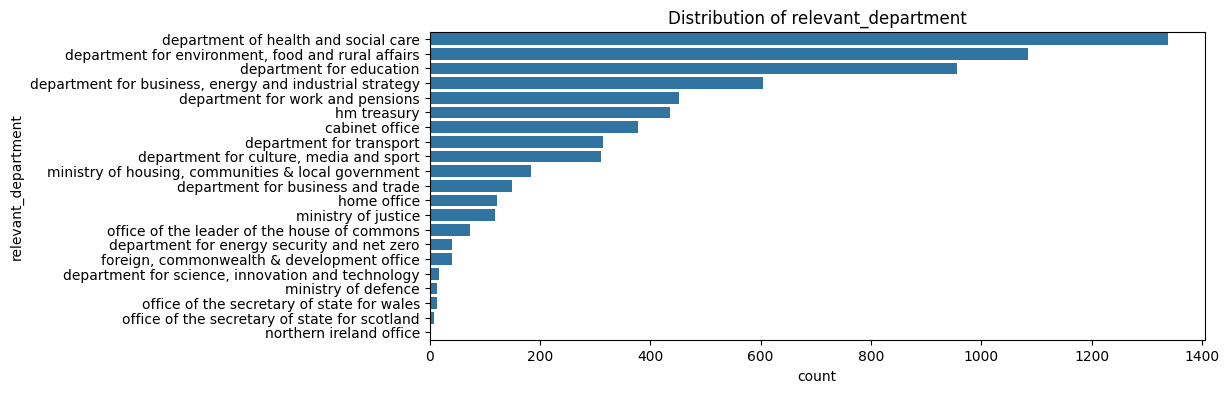


petition_status Distribution:
petition_status
unsuccessful           0.754860
rejected               0.185159
successful_response    0.046112
successful_debated     0.013869
Name: proportion, dtype: float64


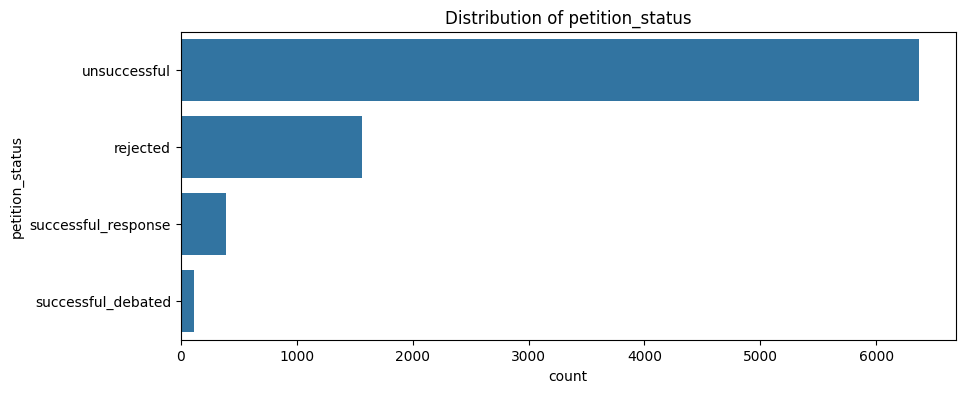


has_entity Distribution:
has_entity
EVENT:NO_DATE:NO_PERSON:NO_       0.471313
EVENT:NO_DATE:YES_PERSON:NO_      0.336771
EVENT:NO_DATE:NO_PERSON:YES_      0.091987
EVENT:NO_DATE:YES_PERSON:YES_     0.081792
EVENT:YES_DATE:YES_PERSON:NO_     0.008535
EVENT:YES_DATE:NO_PERSON:NO_      0.006046
EVENT:YES_DATE:YES_PERSON:YES_    0.002608
EVENT:YES_DATE:NO_PERSON:YES_     0.000948
Name: proportion, dtype: float64


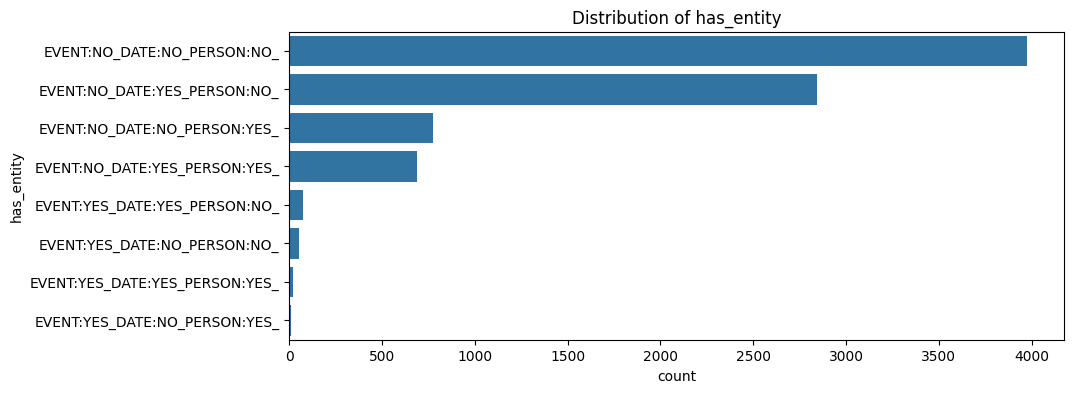


Summary Statistics for deviation_across_regions:
count    6874.000000
mean        0.002934
std         0.020253
min         0.000000
25%         0.000054
50%         0.000131
75%         0.000564
max         1.033035
Name: deviation_across_regions, dtype: float64


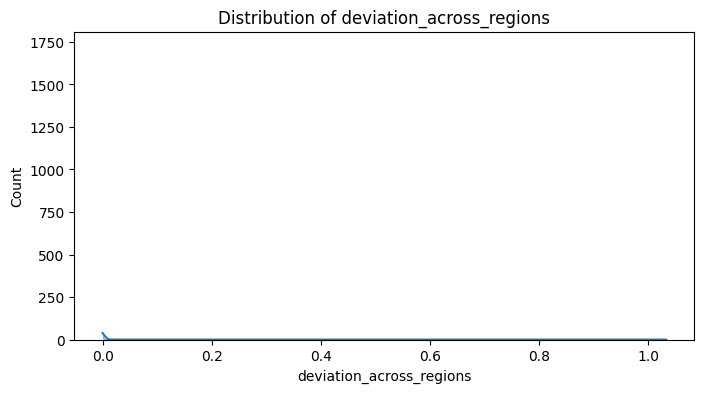

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def check_categorical_balance(df, column):
    print(f"\n{column} Distribution:")
    print(df[column].value_counts(normalize=True))
    plt.figure(figsize=(10,4))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f"Distribution of {column}")
    plt.show()

def check_continuous_distribution(df, column):
    print(f"\nSummary Statistics for {column}:")
    print(df[column].describe())
    plt.figure(figsize=(8,4))
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

# Run checks
check_categorical_balance(df_copy, 'petition_topic')
check_categorical_balance(df_copy, 'relevant_department')
check_categorical_balance(df_copy, 'petition_status')
check_categorical_balance(df_copy, 'has_entity')

check_continuous_distribution(df_copy, 'deviation_across_regions')



# Data Splitting

In [ ]:
df_pre_split = df_copy.copy()

In [ ]:
# Save the DataFrame as CSV
df_pre_split.to_csv("df_pre_split.csv", index=False)
from google.colab import files
files.download("df_pre_split.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_taskA = df_pre_split[['petition_text', 'has_entity', 'petition_topic']].copy()

In [ ]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(
    df_taskA, test_size=0.3, stratify=df_taskA['petition_topic'], random_state=0
)

val_df, test_df = train_test_split(
    temp_df, test_size=0.5, stratify=temp_df['petition_topic'], random_state=0
)

train_df.to_csv('train_data_taskA.csv', index=False)
val_df.to_csv('val_data_taskA.csv', index=False)
test_df.to_csv('test_data_taskA.csv', index=False)

print(f"Train size: {train_df.shape}")
print(f"Validation size: {val_df.shape}")
print(f"Test size: {test_df.shape}")


Train size: (5905, 3)
Validation size: (1265, 3)
Test size: (1266, 3)


<ipython-input-63-3602df07ea35>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


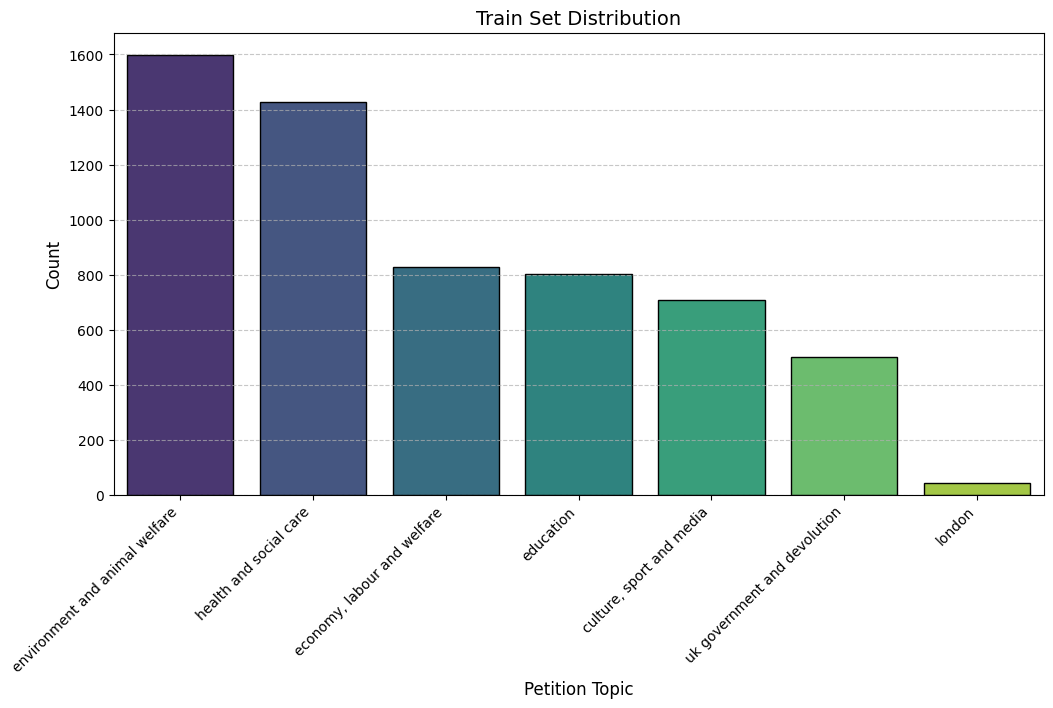

<ipython-input-63-3602df07ea35>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


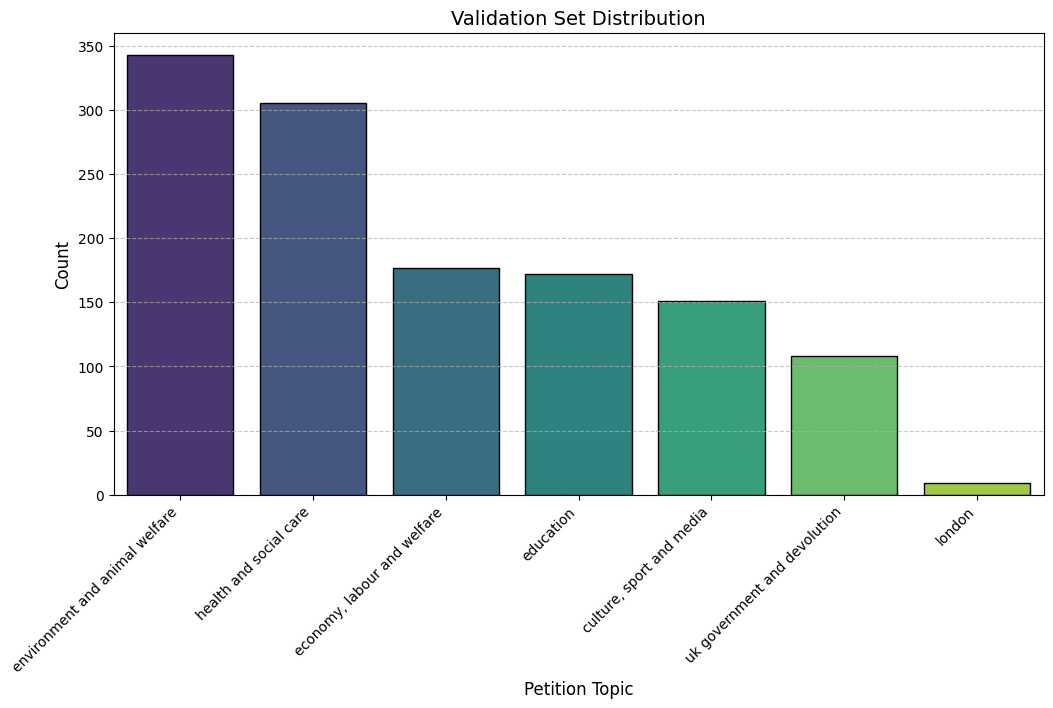

<ipython-input-63-3602df07ea35>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


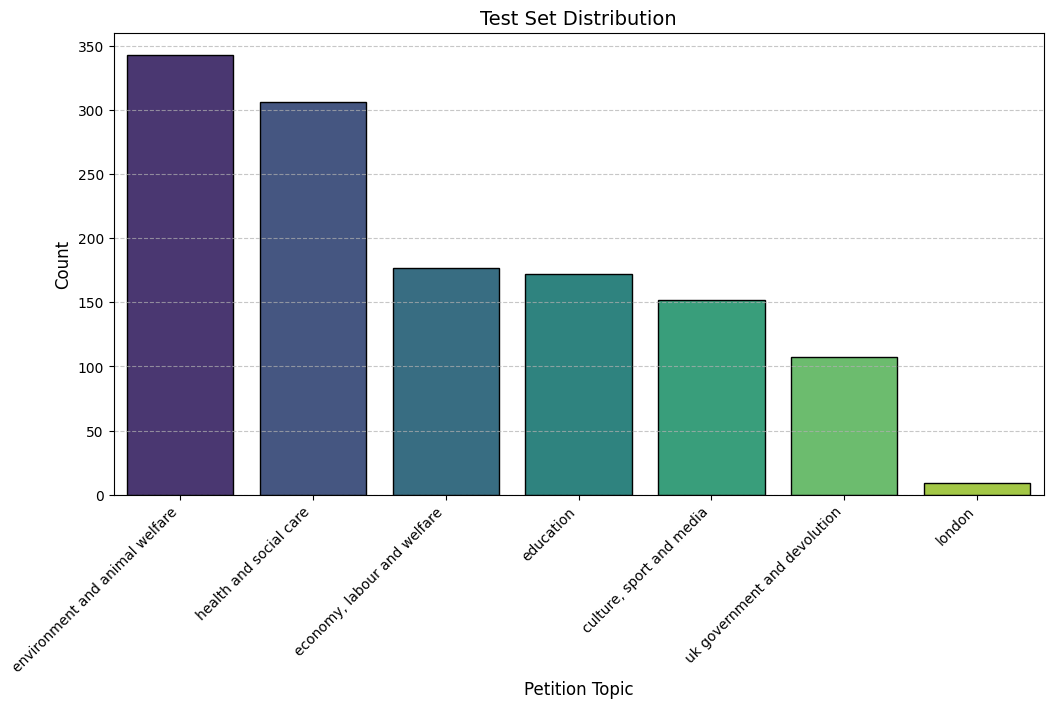

In [ ]:
# plotting class distribution with consistent sorting
def plot_class_distribution(df, title, topic_order=None):
    topic_counts = df['petition_topic'].value_counts()

    plt.figure(figsize=(12,6))
    sns.barplot(
        x=topic_counts.index,
        y=topic_counts.values,
        order=topic_order,  # Ensure all plots follow the same order
        palette="viridis",
        edgecolor="black"
    )

    plt.xlabel("Petition Topic", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Get consistent topic order from the full dataset
topic_order = train_df['petition_topic'].value_counts().index  # Use train set order

# Plot distributions for each dataset with the same topic order
plot_class_distribution(train_df, "Train Set Distribution", topic_order)
plot_class_distribution(val_df, "Validation Set Distribution", topic_order)
plot_class_distribution(test_df, "Test Set Distribution", topic_order)


# Encoding the Entity Column

> The has_entity column contains three independent categorical attributes (event, date, person). Instead of treating these as 8 unique categorical labels (via Label Encoding), One-Hot Encoding was used to split each entity into a separate binary feature (has_event, has_date, has_person). This allows the model to learn the influence of each entity type separately, rather than memorizing entity combinations as fixed categories.


In [ ]:
print("Unique values in 'has_entity':")
print(train_df['has_entity'].unique())
print(train_df['has_entity'].dtype)


Unique values in 'has_entity':
['EVENT:NO_DATE:NO_PERSON:NO_' 'EVENT:NO_DATE:YES_PERSON:YES_'
 'EVENT:NO_DATE:YES_PERSON:NO_' 'EVENT:NO_DATE:NO_PERSON:YES_'
 'EVENT:YES_DATE:YES_PERSON:NO_' 'EVENT:YES_DATE:NO_PERSON:NO_'
 'EVENT:YES_DATE:YES_PERSON:YES_' 'EVENT:YES_DATE:NO_PERSON:YES_']
object


In [ ]:
# Function to extract entity values safely
def extract_entity_values(entity_str):
    entity_str = entity_str.lower().strip('_')  # Normalize formatting
    values = {'event': 0, 'date': 0, 'person': 0}  # Default values

    for part in entity_str.split('_'):
        if ':' in part:  # Ensure correct format
            key, value = part.split(':', 1)  # Split once
            values[key] = 1 if value == 'yes' else 0  # Convert to binary

    return values['event'], values['date'], values['person']

# Apply function to extract entity features
train_df[['has_event', 'has_date', 'has_person']] = train_df['has_entity'].apply(
    lambda x: pd.Series(extract_entity_values(x))
)
val_df[['has_event', 'has_date', 'has_person']] = val_df['has_entity'].apply(
    lambda x: pd.Series(extract_entity_values(x))
)
test_df[['has_event', 'has_date', 'has_person']] = test_df['has_entity'].apply(
    lambda x: pd.Series(extract_entity_values(x))
)

# Drop the original column as it's no longer needed
train_df.drop(columns=['has_entity'], inplace=True)
val_df.drop(columns=['has_entity'], inplace=True)
test_df.drop(columns=['has_entity'], inplace=True)

# Confirm encoding worked correctly
print(train_df[['has_event', 'has_date', 'has_person']].head())


      has_event  has_date  has_person
6985          0         0           0
2113          0         0           0
143           0         1           1
8301          0         0           0
6500          0         0           0


# Topic Encoding
>The petition_topic column is a nominal categorical variable, meaning the topics have no inherent order but must be converted into numerical values for machine learning.
>To achieve this, Label Encoding was applied, where each unique topic was assigned a unique integer. The encoder was fit only on the training set to prevent data leakage, ensuring that validation and test sets were transformed using the same learned mapping.
>The trained encoder was saved using pickle (topic_encoder.pkl) to allow future decoding of predicted numeric labels back into human-readable topic names. This ensures consistency when interpreting model outputs.







In [ ]:
from sklearn.preprocessing import LabelEncoder
import pickle  # For saving and loading the encoder

# Initialize the LabelEncoder
topic_encoder = LabelEncoder()

# Fit the encoder on ALL topic labels (train + val + test to ensure consistency)
topic_encoder.fit(train_df['petition_topic'])

# Transform categorical topics into numeric labels
train_df['petition_topic'] = topic_encoder.transform(train_df['petition_topic'])
val_df['petition_topic'] = topic_encoder.transform(val_df['petition_topic'])
test_df['petition_topic'] = topic_encoder.transform(test_df['petition_topic'])

# Save the encoder for future decoding
with open("topic_encoder.pkl", "wb") as f:
    pickle.dump(topic_encoder, f)

# Confirm encoding
print("Encoded Topics:", dict(enumerate(topic_encoder.classes_)))

# Example: Reload encoder and decode a sample prediction
with open("topic_encoder.pkl", "rb") as f:
    loaded_encoder = pickle.load(f)

# Test decoding
predicted_topic = 2  # Example prediction output
topic_name = loaded_encoder.inverse_transform([predicted_topic])
print(f"Decoded Topic for label {predicted_topic}: {topic_name[0]}")


Encoded Topics: {0: 'culture, sport and media', 1: 'economy, labour and welfare', 2: 'education', 3: 'environment and animal welfare', 4: 'health and social care', 5: 'london', 6: 'uk government and devolution'}
Decoded Topic for label 2: education


In [ ]:
train_df.head()

petition_text  petition_topic  \
6985  Provide support for sufferers of long term eff...               4   
2113  Extend any Universal Credit uplifts to legacy ...               1   
143   Increase statutory maternity pay.. I want stat...               1   
8301  Make insurance companies liable to pay out on ...               1   
6500  To remove all Standing Charges domestic Energy...               3   

      has_event  has_date  has_person  
6985          0         0           0  
2113          0         0           0  
143           0         1           1  
8301          0         0           0  
6500          0         0           0

In [ ]:
# Check dataset sizes
print(f"Train size: {train_df.shape}")
print(f"Validation size: {val_df.shape}")
print(f"Test size: {test_df.shape}")

# Check for missing values
print("Missing values in training set:")
print(train_df.isna().sum())

# Check if petition_topic is categorical
print("Unique categories in target variable:")
print(train_df["petition_topic"].nunique())  # Number of unique petition topics

# Check class distribution to avoid imbalance issues
print("Class distribution in training set:")
print(train_df["petition_topic"].value_counts(normalize=True))  # Check label balance


Train size: (5905, 5)
Validation size: (1265, 5)
Test size: (1266, 5)
Missing values in training set:
petition_text     0
petition_topic    0
has_event         0
has_date          0
has_person        0
dtype: int64
Unique categories in target variable:
7
Class distribution in training set:
petition_topic
3    0.270787
4    0.241490
1    0.140051
2    0.136156
0    0.119729
6    0.084674
5    0.007113
Name: proportion, dtype: float64


In [ ]:
print(dict(enumerate(topic_encoder.classes_)))


{0: 'culture, sport and media', 1: 'economy, labour and welfare', 2: 'education', 3: 'environment and animal welfare', 4: 'health and social care', 5: 'london', 6: 'uk government and devolution'}


In [ ]:
# Access y values
y_train = train_df['petition_topic'].values
y_val = val_df['petition_topic'].values
y_test = test_df['petition_topic'].values

print("First few training labels:", y_train[:5])


First few training labels: [4 1 1 1 3]


In [ ]:
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")


y_train shape: (5905,)
y_val shape: (1265,)
y_test shape: (1266,)


# Text Cleaning and preprocessing


 **Analyzing Training Data Only (train_df)** 

 Text Length Summary:
       text_length   word_count
count  5905.000000  5905.000000
mean    649.404911   108.167146
std     203.339359    33.640188
min      67.000000    11.000000
25%     513.000000    86.000000
50%     694.000000   115.000000
75%     814.000000   134.000000
max    1175.000000   211.000000


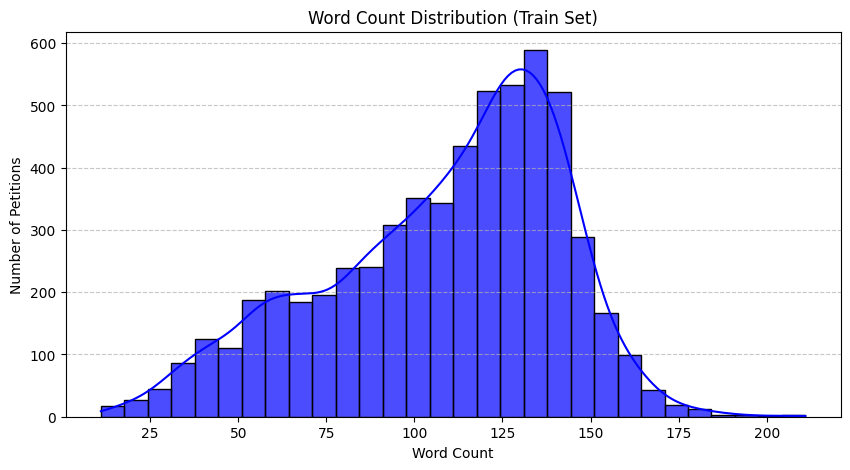


 Total Duplicates: 0

 Most Common Special Characters:
'.': 35432 times
',': 18834 times
''': 5131 times
'-': 4633 times
'/': 1144 times
'£': 1110 times
'&': 949 times
'%': 945 times
'"': 670 times
'!': 479 times

 Texts with Newlines: 2259
 Texts with Extra Spaces: 1973
--------------------------------------------------


In [ ]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

print(f"\n **Analyzing Training Data Only (train_df)** ")

### Step 1: Text Length Analysis (Without Adding Columns) ###
text_lengths = train_df["petition_text"].str.len()
word_counts = train_df["petition_text"].str.split().apply(len)

# Print length statistics
print("\n Text Length Summary:")
print(pd.DataFrame({"text_length": text_lengths, "word_count": word_counts}).describe())

# Plot text length distribution
plt.figure(figsize=(10,5))
sns.histplot(word_counts, bins=30, kde=True, color="blue", edgecolor="black", alpha=0.7)
plt.xlabel("Word Count")
plt.ylabel("Number of Petitions")
plt.title("Word Count Distribution (Train Set)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Step 2: Check for Duplicates (Without Adding Columns) ###
duplicates = train_df[train_df.duplicated(subset=["petition_text"], keep=False)]
print(f"\n Total Duplicates: {duplicates.shape[0]}")

### Step 3: Check for Special Characters (Without Adding Columns) ###
all_text = " ".join(train_df["petition_text"].dropna())
special_chars = re.findall(r"[^a-zA-Z0-9\s]", all_text)
char_counts = Counter(special_chars)

print("\n Most Common Special Characters:")
for char, count in char_counts.most_common(10):
    print(f"'{char}': {count} times")

### Step 4: Check for Formatting Issues (Without Adding Columns) ###
newlines_count = train_df["petition_text"].str.contains("\n").sum()
extra_spaces_count = train_df["petition_text"].str.contains(r"\s{2,}").sum()

print(f"\n Texts with Newlines: {newlines_count}")
print(f" Texts with Extra Spaces: {extra_spaces_count}")

print("-" * 50)

In [ ]:
# Combine all petition texts into one string
all_text = " ".join(train_df["petition_text"].dropna())

# Find all punctuation marks
punctuation_chars = re.findall(r"[^\w\s]", all_text)  # Matches anything that is NOT a word or space

# Count occurrences
punctuation_counts = Counter(punctuation_chars)

# Display results
print("\n Most Common Punctuation Marks:")
for char, count in punctuation_counts.most_common(20):  # Show top 20 most common
    print(f"'{char}': {count} times")


 Most Common Punctuation Marks:
'.': 35432 times
',': 18834 times
''': 5131 times
'-': 4633 times
'/': 1144 times
'£': 1110 times
'&': 949 times
'%': 945 times
'"': 670 times
'!': 479 times
':': 478 times
';': 320 times
'?': 244 times
'“': 176 times
'”': 173 times
'+': 88 times
'–': 78 times
')': 74 times
'•': 67 times
'*': 59 times


In [ ]:
import re

### Step 1: Count Petitions with Excessive Punctuation
def count_excessive_punctuation(text):
    return len(re.findall(r"([!?.,]{3,})", text))  # Counts occurrences of 3+ repeated punctuation marks

# Count petitions without adding a column
total_punct_issues = sum(train_df["petition_text"].apply(count_excessive_punctuation) > 0)
print(f"\n Total Petitions with Excessive Punctuation: {total_punct_issues}")

# Show first few examples
punctuation_issues = train_df[train_df["petition_text"].apply(count_excessive_punctuation) > 0]
display(punctuation_issues[["petition_text"]].head(10))


### Step 2: Count Petitions with Repeated Characters
def count_repeated_letters(text):
    return len(re.findall(r"\b\w*([a-zA-Z])\1{2,}\w*\b", text))  # Matches words with 3+ repeated letters

# Count petitions without adding a column
total_repeated_chars = sum(train_df["petition_text"].apply(count_repeated_letters) > 0)
display(f"\n Total Petitions with Repeated Characters: {total_repeated_chars}")

# Show first few examples
repeated_char_issues = train_df[train_df["petition_text"].apply(count_repeated_letters) > 0]
print(repeated_char_issues[["petition_text"]].head(10))


 Total Petitions with Excessive Punctuation: 46


petition_text
3338  We should increase the pay of our NHS staff by...
7765  Facilitate a further Scottish Independence ref...
2859  Say NO to Inheritance Tax on Pensions - Say no...
4164  Get official clarification to keep Vape Shops ...
4147  Campsites, where campers bring their own tents...
3297  Make it illegal for politicians to lie to the ...
730   Commit to electrification of the whole East We...
8095  Additional funding for Covid-19 vaccine trials...
8112  Paid Overtime to be untaxed.. Any pay associat...
2491  In appreciation, make October 4 of every year ...

'\n Total Petitions with Repeated Characters: 9'

                                          petition_text
5367  Ban all Anonymous Image-Based Bulletin Boards....
4746  Implement mandatory registration for all socia...
5412  Introduce measures against "panic buying" for ...
4636  Ban dogs from all Biological Sites of Special ...
4886  Fund routine scans for women to detect Abdomin...
6761  Require a licence to purchase/install bird spi...
1398  Prevent productive grassland and clean pasture...
6875  Review the sale and use of fireworks. No over ...
4555  Reopen all golf courses immediately.. Since Ap...


In [ ]:
def count_repeated_letters(text):
    # Matches lowercase words where any letter is repeated 3+ times (ignores uppercase acronyms)
    return len(re.findall(r"\b(?![A-Z]{3,}\b)\w*([a-z])\1{2,}\w*\b", text))

# Get total petitions with repeated lowercase characters (without adding a column)
total_repeated_chars = sum(train_df["petition_text"].apply(count_repeated_letters) > 0)
print(f"\n Total Petitions with Repeated Characters (Excluding Acronyms): {total_repeated_chars}")

# Show first few rows where repeated characters exist
repeated_char_issues = train_df[train_df["petition_text"].apply(count_repeated_letters) > 0]
display(repeated_char_issues[["petition_text"]].head(10))


 Total Petitions with Repeated Characters (Excluding Acronyms): 3


petition_text
5412  Introduce measures against "panic buying" for ...
6875  Review the sale and use of fireworks. No over ...
4555  Reopen all golf courses immediately.. Since Ap...

In [ ]:
# Function to find non-ASCII characters (potential encoding issues)
def find_encoding_issues(text):
    return re.findall(r'[^\x00-\x7F]+', text)  # Matches non-ASCII characters

# Check encoding issues in training data
encoding_issues = train_df["petition_text"].dropna().apply(find_encoding_issues)

# Filter only rows where encoding issues exist
encoding_issues_filtered = train_df[encoding_issues.apply(len) > 0]

# Display total affected rows and a sample
display(f"\n Total Rows with Encoding Issues: {encoding_issues_filtered.shape[0]}")
display("\n Sample of Encoding Issues:")
display(encoding_issues_filtered["petition_text"].head(10))

# Count the most common problematic characters
all_text = " ".join(train_df["petition_text"].dropna())
encoding_chars = re.findall(r'[^\x00-\x7F]', all_text)
char_counts = Counter(encoding_chars)

# Display most common non-standard characters
display("\n Most Common Non-Standard Characters in Text:")
for char, count in char_counts.most_common(10):  # Show top 10 characters
    print(f"'{char}': {count} times")

'\n Total Rows with Encoding Issues: 721'

'\n Sample of Encoding Issues:'

2113    Extend any Universal Credit uplifts to legacy ...
4069    Create a Minister For Poverty responsible for ...
4369    Cancel Placement for Nursing Students for 2 mo...
8018    Apply tax and NI to household income for famil...
3424    Government must guarantee full sick pay for al...
31      Clarify the new Government RSE & Health Educat...
1632    Abolish prescription fees. Citizens of Scotlan...
5427    Guarantee a Real Living Wage of £330 a week fo...
3711    Enforce the “50+1” Rule for professional footb...
3792    Fund graves for babies regardless of gestation...
Name: petition_text, dtype: object

'\n Most Common Non-Standard Characters in Text:'

'£': 1110 times
'“': 176 times
'”': 173 times
'–': 78 times
'•': 67 times
'—': 11 times
'∙': 4 times
'€': 3 times
'°': 2 times
'🇬': 1 times


In [ ]:
!pip install pyspellchecker
from spellchecker import SpellChecker

spell = SpellChecker()

# Extract all words from train text
all_words = " ".join(train_df['petition_text']).split()

# Find words not in the dictionary
misspelled_words = list(spell.unknown(all_words))

# Count occurrences of each misspelled word
misspelled_counts = {word: all_words.count(word) for word in misspelled_words}
sorted_misspelled = sorted(misspelled_counts.items(), key=lambda x: x[1], reverse=True)

# Show top 20 most common misspellings
print("Most common potential typos:")
print(sorted_misspelled[:20])


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 66.0 MB/s eta 0:00:00
Most common potential typos:
[('them.', 217), ('children.', 212), ('people.', 210), ('year.', 208), ('this.', 192), ('it.', 163), ('work.', 151), ('health.', 142), ('pandemic.', 140), ('time.', 136), ('crisis.', 133), ('years.', 132), ('animals.', 123), ('students.', 122), ('care.', 120), ('coronavirus', 120), ('environment.', 119), ('life.', 119), ('country.', 118), ('etc.', 118)]


In [ ]:
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")

# Extract named entities from the training dataset
def extract_named_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents]  # Extract only entity names

# Get all named entities from the dataset
all_named_entities = [entity for text in train_df['petition_text'] for entity in extract_named_entities(text)]

# Count most common entities
entity_counts = Counter(all_named_entities).most_common(20)

print("Most Common Named Entities in Petition Texts:")
print(entity_counts)


Most Common Named Entities in Petition Texts:
[('UK', 2110), ('NHS', 1413), ('Government', 965), ('England', 332), ('VAT', 314), ('one', 251), ('first', 238), ('Parliament', 229), ('COVID-19', 206), ('EU', 197), ('British', 188), ('1', 168), ('2', 152), ('Universal Credit', 135), ('BBC', 135), ('annual', 127), ('second', 124), ('Wales', 122), ('Scotland', 112), ('3', 112)]


In [ ]:
# Find potential acronyms
acronyms = [word for word in all_words if word.isupper() and len(word) > 1]
acronym_counts = Counter(acronyms)

print("Most Common Acronyms & Abbreviations:")
print(acronym_counts.most_common(20))


Most Common Acronyms & Abbreviations:
[('UK', 1670), ('NHS', 1331), ('VAT', 358), ('UK.', 355), ('COVID-19', 190), ('EU', 165), ('NHS.', 164), ('UK,', 151), ('TV', 144), ('GCSE', 139), ('BBC', 129), ('_URL_', 108), ('COVID', 100), ('ALL', 90), ('NHS,', 81), ('MP', 79), ('GP', 75), ('SEN', 68), ('PIP', 62), ('CCTV', 56)]


In [ ]:
from collections import Counter

# Count all words in petition_text (before cleaning)
all_words = " ".join(train_df['petition_text'].dropna()).split()

# Get most common words that are NOT in the standard dictionary
misspelled_words = spell.unknown(all_words)  # Use spellchecker to detect unknown words
misspelled_counts = Counter(word for word in all_words if word in misspelled_words)

print("Most Common Non-Dictionary Words:")
print(misspelled_counts.most_common(20))


Most Common Non-Dictionary Words:
[('them.', 217), ('children.', 212), ('people.', 210), ('year.', 208), ('this.', 192), ('it.', 163), ('work.', 151), ('health.', 142), ('pandemic.', 140), ('time.', 136), ('crisis.', 133), ('years.', 132), ('animals.', 123), ('students.', 122), ('care.', 120), ('coronavirus', 120), ('life.', 119), ('environment.', 119), ('etc.', 118), ('country.', 118)]


# Cleaning and applying it to the dataset

In [ ]:
!pip install ftfy
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 12.4 MB/s eta 0:00:00


In [ ]:
import re
import ftfy
import unicodedata
from contractions import fix

def clean_text(text):
    if not isinstance(text, str) or pd.isna(text):  # Handle NaN values safely
        return ""

    # Fix encoding issues
    text = ftfy.fix_text(text)
    text = unicodedata.normalize("NFKC", text)

    # Expand contractions (can't → cannot, he's → he is)
    text = fix(text)

    # Remove URLs, emails, phone numbers
    text = re.sub(r"\S+@\S+", "<EMAIL>", text)  # Replace emails
    text = re.sub(r"http\S+|www\S+", "<URL>", text)  # Replace URLs
    text = re.sub(r"\+?\d{1,3}[-.\s]?\(?\d+\)?[-.\s]?\d+[-.\s]?\d+", "<PHONE>", text)  # Replace phone numbers

    # Replace common symbols
    text = text.replace("£", "GBP")
    text = text.replace("&", "and")
    text = re.sub(r"“|”", '"', text)  # Convert fancy quotes to standard quotes
    text = re.sub(r"–", "-", text)  # Convert en-dash to hyphen

    # Remove unwanted symbols (bullets, asterisks, extra colons, standalone parentheses)
    text = re.sub(r"[•*+]", "", text)
    text = re.sub(r"\s*[()]\s*", " ", text)

    # Remove excessive punctuation (!!! → !, ..... → .)
    text = re.sub(r"([!?.,]){3,}", r"\1", text)  # Replace multiple punctuation with a single instance
    text = re.sub(r'\.{2,}', '.', text)  # Replace multiple dots with a single dot
    # Remove newlines (`\n`) and carriage returns (`\r`)
    text = re.sub(r"\s*\n\s*", " ", text)  # Replace newlines with a space
    text = re.sub(r"\s*\r\s*", " ", text)  # Replace carriage returns with a spa

    # Convert entire text to lowercase
    text = text.lower()

    # Remove extra spaces & normalize spacing
    text = re.sub(r"\s+", " ", text).strip()

    return text


In [ ]:
for df in [train_df, val_df, test_df]:
    df['petition_text'] = df['petition_text'].astype(str).apply(clean_text)

print("Text cleaning applied. Cleaned datasets saved.")
train_df["petition_text"].head(5)

Text cleaning applied. Cleaned datasets saved.


6985    provide support for sufferers of long term eff...
2113    extend any universal credit uplifts to legacy ...
143     increase statutory maternity pay. i want statu...
8301    make insurance companies liable to pay out on ...
6500    to remove all standing charges domestic energy...
Name: petition_text, dtype: object

# Tokenization

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Define Tokenizer (Use top 20k words, handle unknown words with "<OOV>")
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")

# Fit tokenizer on the training data
tokenizer.fit_on_texts(train_df["petition_text"])

# Convert text into sequences (numbers)
X_train = tokenizer.texts_to_sequences(train_df["petition_text"])
X_val = tokenizer.texts_to_sequences(val_df["petition_text"])
X_test = tokenizer.texts_to_sequences(test_df["petition_text"])

# Save tokenizer for later use
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Print vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary Size: {vocab_size}")


Vocabulary Size: 18340


In [ ]:
# Count OOV words in the training, validation, and test sets
def calculate_oov_percentage(sequences, oov_token="<OOV>"):
    # Count the number of OOV tokens in the sequences
    oov_count = sum([seq.count(tokenizer.word_index[oov_token]) for seq in sequences])
    total_words = sum([len(seq) for seq in sequences])
    # Calculate the percentage of OOV words
    oov_percentage = (oov_count / total_words) * 100
    return oov_percentage

# Calculate OOV percentage for the training, validation, and test sets
train_oov_percentage = calculate_oov_percentage(X_train)
val_oov_percentage = calculate_oov_percentage(X_val)
test_oov_percentage = calculate_oov_percentage(X_test)

# Print the OOV percentages
print(f"Training Set OOV Percentage: {train_oov_percentage:.2f}%")
print(f"Validation Set OOV Percentage: {val_oov_percentage:.2f}%")
print(f"Test Set OOV Percentage: {test_oov_percentage:.2f}%")


Training Set OOV Percentage: 0.00%
Validation Set OOV Percentage: 1.40%
Test Set OOV Percentage: 1.38%


In [ ]:
# Count number of OOV words in training set
oov_count_train = sum(1 for seq in X_train for word in seq if word == tokenizer.word_index["<OOV>"])
oov_count_val = sum(1 for seq in X_val for word in seq if word == tokenizer.word_index["<OOV>"])
oov_count_test = sum(1 for seq in X_test for word in seq if word == tokenizer.word_index["<OOV>"])

print(f"Training Set OOV Words: {oov_count_train}")
print(f"Validation Set OOV Words: {oov_count_val}")
print(f"Test Set OOV Words: {oov_count_test}")

#if performance is not good i can increase num_words

Training Set OOV Words: 0
Validation Set OOV Words: 1928
Test Set OOV Words: 1899


In [ ]:
word_freq = tokenizer.word_counts  # Dictionary {word: frequency}
sorted_vocab = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
print("Top 10 Words:", sorted_vocab[:10])  # Print top 10 most frequent words


Top 10 Words: [('the', 30287), ('to', 27346), ('and', 19908), ('of', 14788), ('a', 12111), ('for', 10930), ('in', 10058), ('is', 7777), ('be', 7167), ('are', 6916)]


In [ ]:
ignored_words = [word for word, count in word_freq.items() if count == 1]
print(f"Total Words Ignored (appeared once): {len(ignored_words)}")


Total Words Ignored (appeared once): 6420


Your vocabulary size is 18,340 instead of 20,000 because num_words=20000 in Keras' Tokenizer() sets an upper limit, not a fixed size. The tokenizer only includes the most frequent words, and if your dataset contains fewer unique words, the vocabulary naturally stops at that number. Additionally, many words might appear only once or twice in the dataset, making them too rare to be included in the top 20,000 words. You can verify this by printing the top 10 most common words and checking how many words appear just once using tokenizer.word_counts. This is not an issue—your model will still perform well with 18,340 words. If needed, you can increase vocab size by setting num_words=None, but this may add noise.

# Padding

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: Find max sequence length based on TRAINING DATA ONLY
max_length = max(len(seq) for seq in X_train)

# Step 2: Apply padding and truncation
X_train = pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post')
X_val = pad_sequences(X_val, maxlen=max_length, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post')

print(f" Padded Sequences Shape: {X_train.shape}")


 Padded Sequences Shape: (5905, 219)


In [ ]:
# Count test samples longer than max_length
long_test_samples = sum(len(seq) > max_length for seq in X_test)
print(f"Test Samples Truncated: {long_test_samples} out of {len(X_test)}")


Test Samples Truncated: 0 out of 1266


Since no test samples were truncated (0 out of 1266), all validation and test sequences fit within the max_length derived from the training data. This ensures that the model processes full-length test cases without any data leakage while maintaining efficient memory usage.

# Word Embedding - Glove

> ✔ Since your OOV rate is ~10%, start with GloVe 100D (lighter & well-trained for general English).
✔ If accuracy is low, experiment with FastText embeddings to see if it improves handling of rare/unseen words.
✔ If you later increase num_words, FastText might become less necessary because more words will be seen during training.



In [ ]:
import requests
import zipfile
import os

# URL to GloVe
glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_zip = "glove.6B.zip"

# Download file
print("Downloading GloVe embeddings...")
response = requests.get(glove_url, stream=True)
with open(glove_zip, "wb") as f:
    for chunk in response.iter_content(chunk_size=1024):
        f.write(chunk)

# Extract contents
print("Extracting GloVe embeddings...")
with zipfile.ZipFile(glove_zip, "r") as zip_ref:
    zip_ref.extractall(".")

# Clean up
os.remove(glove_zip)

print(" GloVe downloaded and extracted successfully.")


Extracting GloVe embeddings...
 GloVe downloaded and extracted successfully.


In [ ]:
import numpy as np

# Load GloVe embeddings into a dictionary
glove_path = "glove.6B.100d.txt"
embedding_dim = 100  # We are using 100D embeddings

embedding_index = {}  # Dictionary to store word vectors

with open(glove_path, encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]  # First item is the word
        vector = np.asarray(values[1:], dtype="float32")  # Rest are the embedding values
        embedding_index[word] = vector

print(f" Loaded {len(embedding_index)} word vectors from GloVe.")


 Loaded 400000 word vectors from GloVe.


In [ ]:
# Define vocabulary size
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding token

# Initialize embedding matrix with zeros
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Fill embedding matrix with GloVe word vectors
for word, i in tokenizer.word_index.items():
    if i < vocab_size:  # Only use words in our vocabulary
        vector = embedding_index.get(word)  # Get word vector from GloVe
        if vector is not None:  # If word exists in GloVe, use it
            embedding_matrix[i] = vector

print(" Embedding matrix created with shape:", embedding_matrix.shape)


 Embedding matrix created with shape: (18340, 100)


In [ ]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    input_dim=vocab_size,  # Vocabulary size
    output_dim=embedding_dim,  # 100D embedding size
    weights=[embedding_matrix],  # Use pre-trained GloVe embeddings
    input_length=max_length,  # Use the max padded sequence length
    trainable=False  # Keep embeddings fixed (we can later make them trainable if needed)
)

print(" Pre-trained GloVe embeddings added to model.")


 Pre-trained GloVe embeddings added to model.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


We successfully loaded 400,000 word vectors from GloVe (100D) and created an embedding matrix of shape (18,340, 100), mapping words in our dataset to their corresponding vectors.
Embedding Integration → The embedding matrix was used in the Keras Embedding layer with trainable=False to leverage pre-trained word representations while preventing unnecessary modifications.

In [ ]:
print(f"X_train shape: {X_train.shape}")  # Shape of training inputs
print(f"X_val shape: {X_val.shape}")      # Shape of validation inputs
print(f"X_test shape: {X_test.shape}")    # Shape of test inputs


X_train shape: (5905, 219)
X_val shape: (1265, 219)
X_test shape: (1266, 219)


In [ ]:
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")


y_train shape: (5905,)
y_val shape: (1265,)
y_test shape: (1266,)


In [ ]:
# Check if there are any nulls or empty sequences in X_train
null_values = np.any(np.isnan(X_train))  # Check for NaN values
empty_sequences = np.sum(np.all(X_train == 0, axis=1))  # Check for rows with all zeros (empty sequences)

print(f"Are there any NaN values in X_train? {null_values}")
print(f"Number of empty sequences in X_train: {empty_sequences}")


Are there any NaN values in X_train? False
Number of empty sequences in X_train: 0


# BILSTM Model 1 - Glove 100D

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np

# Load pre-trained GloVe 100D embeddings
embedding_dim = 100  # Set embedding dimension
embedding_matrix = np.zeros((vocab_size, embedding_dim))  # Initialize embedding matrix
# Fill the embedding matrix with the GloVe vectors (already done in previous steps)

# Define the BiLSTM Model
def build_bilstm_model(vocab_size, max_length, embedding_matrix, embedding_dim=100):
    model = Sequential([
        Embedding(input_dim=vocab_size,
                  output_dim=embedding_dim,
                  weights=[embedding_matrix],
                  input_length=max_length,
                  trainable=False),
        SpatialDropout1D(0.2),  # Helps prevent overfitting on embeddings
        Bidirectional(LSTM(128, return_sequences=True)),  # BiLSTM layer
        Dropout(0.5),  # Dropout to avoid overfitting
        Bidirectional(LSTM(64)),  # Second BiLSTM layer
        Dense(64, activation='relu'),  # Fully connected layer
        Dropout(0.5),
        Dense(len(label_encoder.classes_), activation='softmax')  # Output layer for multi-class classification
    ])

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

# Build the model with current hyperparameters
model = build_bilstm_model(vocab_size, max_length, embedding_matrix)

# Model summary to check the architecture
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │       1,834,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,834,000 (7.00 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,834,000 (7.00 MB)

However, there is a warning about input_length being deprecated. This is likely due to how the model is being defined in newer versions of Keras. It’s safe to remove the input_length argument in the Embedding layer, as it’s now automatically inferred based on the input data.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,  # Change epochs based on experimentation
    batch_size=32,  # Change batch size for experimentation
    callbacks=[early_stopping]
)


Epoch 1/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.2703 - loss: 1.9291 - val_accuracy: 0.2711 - val_loss: 1.8865
Epoch 2/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.2796 - loss: 1.8743 - val_accuracy: 0.2711 - val_loss: 1.8464
Epoch 3/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.2724 - loss: 1.8388 - val_accuracy: 0.2711 - val_loss: 1.8190
Epoch 4/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.2726 - loss: 1.8137 - val_accuracy: 0.2711 - val_loss: 1.8008
Epoch 5/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.2701 - loss: 1.7930 - val_accuracy: 0.2711 - val_loss: 1.7883
Epoch 6/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.2769 - loss: 1.7814 - val_accuracy: 0.2711 - val_loss: 1.7793
Epoch 7/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - accuracy: 0.2635 - loss: 1.7895 - val_accuracy: 0.2711 - val_loss: 1.7725
Epoch 8/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.2668 - loss: 1.7755 - val_accu

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 327ms/step - accuracy: 0.2747 - loss: 1.7638
Test Accuracy: 0.2709


In [ ]:
import pandas as pd

# Store experiment results in a DataFrame for easy comparison
experiment_results = pd.DataFrame(columns=["Experiment", "Embedding", "Vocab Size", "LSTM Units", "Batch Size", "Epochs", "Test Accuracy"])

# Example of recording an experiment result
# Use .loc to add a new row to the DataFrame
experiment_results.loc[len(experiment_results)] = {
    "Experiment": 1,
    "Embedding": "GloVe 100D",
    "Vocab Size": 20000,
    "LSTM Units": "128, 64",
    "Batch Size": 32,
    "Epochs": 10,
    "Test Accuracy": test_acc
}

# Print the results table
print(experiment_results)

   Experiment   Embedding  Vocab Size LSTM Units  Batch Size  Epochs  \
0           1  GloVe 100D       20000    128, 64          32      10   

   Test Accuracy  
0       0.270932  


# fastText Embedding

In [ ]:
# Check number of unique words in the training set
unique_words_train = len(tokenizer.word_index)
print(f"Unique words in the training set: {unique_words_train}")
# Check unique words in validation and test sets
unique_words_val = len(tokenizer.texts_to_sequences(val_df["petition_text"]))
unique_words_test = len(tokenizer.texts_to_sequences(test_df["petition_text"]))
print(f"Unique words in validation set: {unique_words_val}")
print(f"Unique words in test set: {unique_words_test}")


Unique words in the training set: 18339
Unique words in validation set: 1265
Unique words in test set: 1266


In [ ]:
import requests
import gzip
import shutil
import os

# Define the URL to the FastText embeddings (300D)
url = 'https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz'
output_path = 'cc.en.300.vec.gz'
output_extracted_path = 'cc.en.300.vec'

# Download the FastText embeddings
print("Downloading FastText embeddings...")
response = requests.get(url, stream=True)

# Save the gzipped file
with open(output_path, 'wb') as file:
    for chunk in response.iter_content(chunk_size=1024):
        file.write(chunk)

print("Download complete. Extracting file...")

# Extract the .gz file
with gzip.open(output_path, 'rb') as f_in:
    with open(output_extracted_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

# Clean up by removing the gzipped file
os.remove(output_path)

print("Extraction complete. FastText embeddings are ready!")


Download complete. Extracting file...
Extraction complete. FastText embeddings are ready!


In [ ]:
# Define embedding dimensions (300D for FastText)
embedding_dim = 300  # Using 300D FastText embeddings for better word representation

embedding_index = {}

# Load FastText embeddings (adjust path as needed)
with open('cc.en.300.vec', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = vector

# Create an embedding matrix for words in our vocabulary
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Fill the embedding matrix with FastText vectors
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        vector = embedding_index.get(word)
        if vector is not None:
            embedding_matrix[i] = vector

print(f"Embedding matrix shape: {embedding_matrix.shape}")


Embedding matrix shape: (18340, 300)


# BILSTM Model 4 - FastText Manual tunning

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
max_length = X_train.shape[1]  # Extract max length from padded sequences
print(f"Embedding matrix shape: {embedding_matrix.shape}")  # Should be (vocab_size, 300)



X_train shape: (5905, 219)
X_val shape: (1265, 219)
X_test shape: (1266, 219)
Embedding matrix shape: (18340, 300)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, SpatialDropout1D, Embedding
from tensorflow.keras.optimizers import Adam

def build_bilstm_model(vocab_size, max_length, embedding_matrix, embedding_dim=300, trainable=False):
    model = Sequential([
        # Embedding Layer with FastText
        Embedding(input_dim=vocab_size,
                  output_dim=embedding_dim,
                  weights=[embedding_matrix],
                  input_length=max_length,
                  trainable=trainable),  # Start with frozen embeddings

        SpatialDropout1D(0.3),
        Bidirectional(LSTM(128, return_sequences=True)),
        Dropout(0.35),
        Bidirectional(LSTM(128)),
        Dense(64, activation='relu'),
        Dropout(0.35),
        Dense(len(label_encoder.classes_), activation='softmax')  # Multi-class classification
    ])

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.00015),
                  metrics=['accuracy'])

    return model

# Build model
model = build_bilstm_model(vocab_size, max_length, embedding_matrix, embedding_dim=300, trainable=False)

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │       5,502,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,502,000 (20.99 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,502,000 (20.99 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,  # You can increase if performance improves
    batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 513s 3s/step - accuracy: 0.2653 - loss: 1.8133 - val_accuracy: 0.4696 - val_loss: 1.3625
Epoch 2/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 498s 3s/step - accuracy: 0.4869 - loss: 1.3678 - val_accuracy: 0.6253 - val_loss: 1.1074
Epoch 3/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 481s 3s/step - accuracy: 0.6070 - loss: 1.1505 - val_accuracy: 0.6972 - val_loss: 0.9452
Epoch 4/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 500s 3s/step - accuracy: 0.6597 - loss: 1.0185 - val_accuracy: 0.7328 - val_loss: 0.8512
Epoch 5/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 490s 3s/step - accuracy: 0.6918 - loss: 0.9473 - val_accuracy: 0.7462 - val_loss: 0.7740
Epoch 6/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 479s 3s/step - accuracy: 0.7054 - loss: 0.8993 - val_accuracy: 0.7708 - val_loss: 0.7198
Epoch 7/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 488s 3s/step - accuracy: 0.7269 - loss: 0.8476 - val_accuracy: 0.7542 - val_loss: 0.7369
Epoch 8/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 513s 3s/step - accuracy: 0.7333 - loss: 0.8116 - val_accu

In [ ]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy (Frozen FastText): {test_acc:.4f}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 875ms/step - accuracy: 0.7904 - loss: 0.6470
Test Accuracy (Frozen FastText): 0.7891


In [ ]:
# Unfreeze embeddings for fine-tuning
model.layers[0].trainable = True

# Recompile model with lower learning rate to fine-tune embeddings
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=5e-5),  # Lower learning rate for fine-tuning
              metrics=['accuracy'])

# Fine-tune the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5,  # Fewer epochs for fine-tuning
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluate fine-tuned model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy (Fine-Tuned FastText): {test_acc:.4f}")


Epoch 1/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 576s 3s/step - accuracy: 0.7688 - loss: 0.7178 - val_accuracy: 0.8008 - val_loss: 0.6077
Epoch 2/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 557s 3s/step - accuracy: 0.7977 - loss: 0.6298 - val_accuracy: 0.8174 - val_loss: 0.5746
Epoch 3/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 553s 3s/step - accuracy: 0.8199 - loss: 0.5661 - val_accuracy: 0.8285 - val_loss: 0.5434
Epoch 4/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 556s 3s/step - accuracy: 0.8391 - loss: 0.5238 - val_accuracy: 0.8332 - val_loss: 0.5381
Epoch 5/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 528s 3s/step - accuracy: 0.8479 - loss: 0.4834 - val_accuracy: 0.8435 - val_loss: 0.5040
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 586ms/step - accuracy: 0.8560 - loss: 0.4814
Test Accuracy (Fine-Tuned FastText): 0.8594


In [ ]:
print(f"y_test type: {type(y_test)}, shape: {np.shape(y_test)}")
print(f"y_pred_classes type: {type(y_pred_classes)}, shape: {np.shape(y_pred_classes)}")
import numpy as np

y_test = np.array(y_test)  # Ensure y_test is a NumPy array
y_pred_classes = np.array(y_pred_classes)  # Ensure predictions are NumPy array
if y_test.shape != y_pred_classes.shape:
    print(f"Shape Mismatch: y_test: {y_test.shape}, y_pred_classes: {y_pred_classes.shape}")

    # Reshape if needed
    y_test = y_test.reshape(-1)
    y_pred_classes = y_pred_classes.reshape(-1)

print(f"Fixed Shapes: y_test: {y_test.shape}, y_pred_classes: {y_pred_classes.shape}")
print(f"y_test type: {type(y_test)}, shape: {np.shape(y_test)}")
y_test = np.array(y_test)
if y_test.shape != y_pred_classes.shape:
    y_test = y_test.reshape(-1)
    y_pred_classes = y_pred_classes.reshape(-1)


y_test type: <class 'numpy.ndarray'>, shape: (1266,)
y_pred_classes type: <class 'numpy.ndarray'>, shape: (1266,)
Fixed Shapes: y_test: (1266,), y_pred_classes: (1266,)
y_test type: <class 'numpy.ndarray'>, shape: (1266,)


In [ ]:
report = classification_report(y_test, y_pred_classes, digits=4)
print(report)


              precision    recall  f1-score   support

           0     0.8431    0.8487    0.8459       152
           1     0.8344    0.7401    0.7844       177
           2     0.9217    0.8895    0.9053       172
           3     0.9044    0.9650    0.9337       343
           4     0.8100    0.8497    0.8293       306
           5     0.0000    0.0000    0.0000         9
           6     0.8155    0.7850    0.8000       107

    accuracy                         0.8594      1266
   macro avg     0.7327    0.7254    0.7284      1266
weighted avg     0.8528    0.8594    0.8553      1266



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


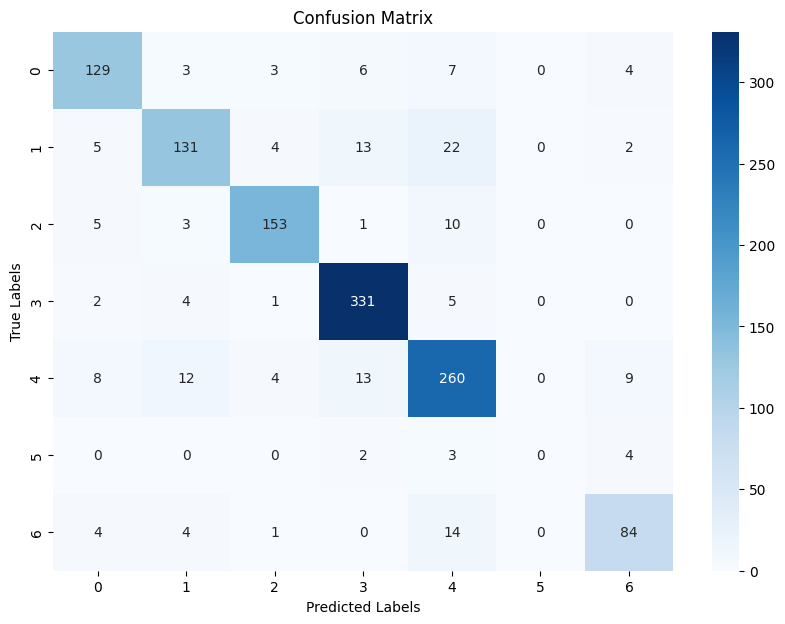

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()



Class Imbalance Analysis:
0: 152 samples (12.01%)
1: 177 samples (13.98%)
2: 172 samples (13.59%)
3: 343 samples (27.09%)
4: 306 samples (24.17%)
5: 9 samples (0.71%)
6: 107 samples (8.45%)


<ipython-input-89-aebfcc303b35>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_encoder.classes_, y=class_counts, palette="viridis", edgecolor="black")


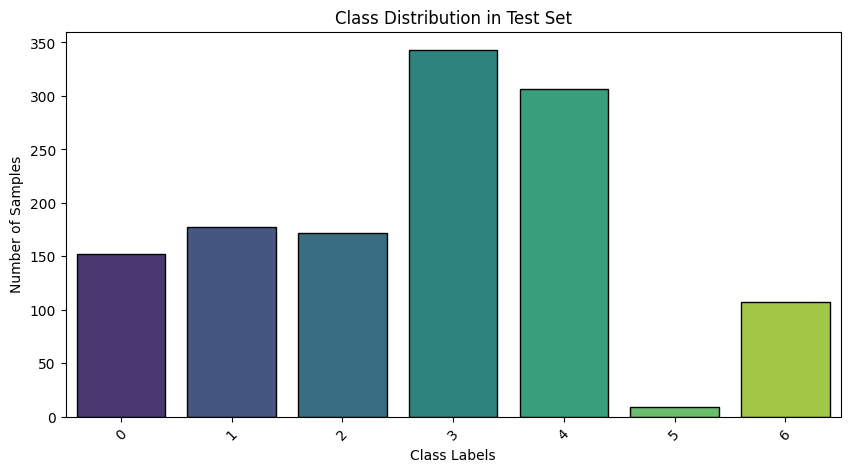

In [ ]:
import pandas as pd

# Compute class distribution in test set
class_counts = pd.Series(y_test).value_counts().sort_index()
class_distribution = class_counts / len(y_test) * 100  # Convert to percentage

# Print class distribution
print("\nClass Imbalance Analysis:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name}: {class_counts[i]} samples ({class_distribution[i]:.2f}%)")

# Plot class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=label_encoder.classes_, y=class_counts, palette="viridis", edgecolor="black")
plt.xticks(rotation=45)
plt.xlabel("Class Labels")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Test Set")
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Compute Accuracy for Train, Validation, and Test Sets
train_acc = accuracy_score(y_train, np.argmax(model.predict(X_train), axis=1))
val_acc = accuracy_score(y_val, np.argmax(model.predict(X_val), axis=1))
test_acc = accuracy_score(y_test, y_pred_classes)

# Print Results
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Save Accuracy Scores Safely
try:
    with open("accuracy_scores.txt", "w") as f:
        f.write(f"Train Accuracy: {train_acc:.4f}\n")
        f.write(f"Validation Accuracy: {val_acc:.4f}\n")
        f.write(f"Test Accuracy: {test_acc:.4f}\n")
    print("Accuracy scores saved successfully!")
except Exception as e:
    print(f"Error saving file: {e}")


185/185 ━━━━━━━━━━━━━━━━━━━━ 134s 717ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 675ms/step
Train Accuracy: 0.9131
Validation Accuracy: 0.8435
Test Accuracy: 0.8594
Accuracy scores saved successfully!


In [ ]:
from sklearn.metrics import balanced_accuracy_score, f1_score

# Compute Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred_classes)

# Compute Macro and Weighted F1-score
macro_f1 = f1_score(y_test, y_pred_classes, average='macro')
weighted_f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f"\nOverall Accuracy: {test_acc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Macro F1-Score: {macro_f1:.4f}")
print(f"Weighted F1-Score: {weighted_f1:.4f}")



Overall Accuracy: 0.8594
Balanced Accuracy: 0.7254
Macro F1-Score: 0.7284
Weighted F1-Score: 0.8553


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Compute precision and recall for each class
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_classes, average=None)

# Print Precision-Recall for each class
print("\nPer-Class Precision & Recall:")
for i, class_name in enumerate(target_names):
    print(f"{class_name}: Precision: {precision[i]:.4f}, Recall: {recall[i]:.4f}")



Per-Class Precision & Recall:
0: Precision: 0.8431, Recall: 0.8487
1: Precision: 0.8344, Recall: 0.7401
2: Precision: 0.9217, Recall: 0.8895
3: Precision: 0.9044, Recall: 0.9650
4: Precision: 0.8100, Recall: 0.8497
5: Precision: 0.0000, Recall: 0.0000
6: Precision: 0.8155, Recall: 0.7850


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd

# Get misclassified indices
misclassified_indices = np.where(y_test != y_pred_classes)[0]

# Show some misclassified samples
num_samples = 10  # Adjust the number of samples to see more
misclassified_df = pd.DataFrame({
    "Actual": [target_names[y_test[i]] for i in misclassified_indices[:num_samples]],
    "Predicted": [target_names[y_pred_classes[i]] for i in misclassified_indices[:num_samples]],
    "Text": [test_df.iloc[i]["petition_text"] for i in misclassified_indices[:num_samples]]
})

print("\nMisclassified Samples:")
print(misclassified_df)



Misclassified Samples:
   Actual  Predicted                                               Text
0       4          2  review statutory ratios in early years. we bel...
1       1          3  a commission to investigate the feasibility an...
2       0          6  force footballers to take a pay cut during the...
3       1          2  fund free childcare for all pre-school pupils....
4       3          0  change the uk's airport slots regulations. in ...
5       3          4  consider implementing a ration card to be used...
6       2          3  make formal examinations computer based to red...
7       1          4  test for covid routinely. stop restricting cov...
8       1          4  provide extra grants for taxi and private hire...
9       1          6  abolish fuel payments for mps. scrap mps fuel ...


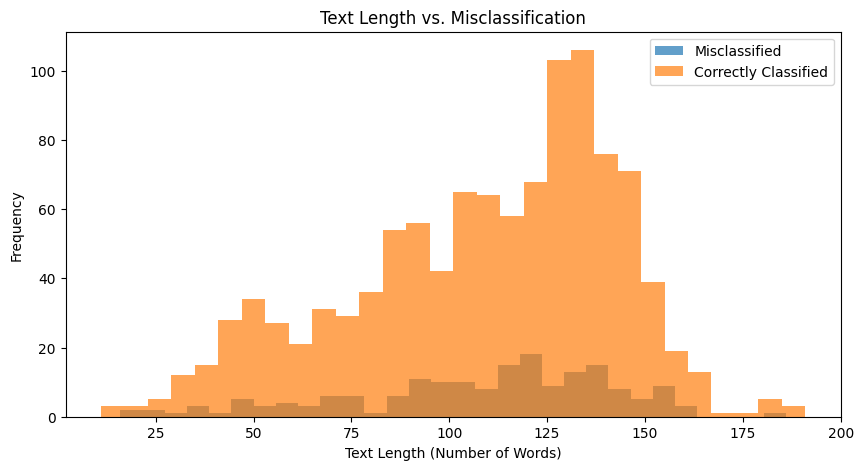

In [ ]:
import matplotlib.pyplot as plt

# Get lengths of text samples
text_lengths = [len(test_df.iloc[i]["petition_text"].split()) for i in range(len(y_test))]

# Plot misclassified vs correctly classified samples
plt.figure(figsize=(10, 5))
plt.hist([text_lengths[i] for i in misclassified_indices], bins=30, alpha=0.7, label="Misclassified")
plt.hist([text_lengths[i] for i in range(len(y_test)) if i not in misclassified_indices], bins=30, alpha=0.7, label="Correctly Classified")
plt.xlabel("Text Length (Number of Words)")
plt.ylabel("Frequency")
plt.legend()
plt.title("Text Length vs. Misclassification")
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score
from tensorflow.keras.utils import to_categorical

# Convert y_test to one-hot encoding for multi-class AUC computation
y_test_one_hot = to_categorical(y_test, num_classes=len(target_names))

# Compute AUC-ROC Score
auc_roc = roc_auc_score(y_test_one_hot, y_pred_probs, average="macro")

print(f"\nMacro AUC-ROC Score: {auc_roc:.4f}")



Macro AUC-ROC Score: 0.9632


# BILSTM Model 5 -

Since Model 4 didn't show overfitting, 3 more epochs are gonna get added to the model.

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=3,  # Add 3 more epochs
    batch_size=32,
    callbacks=[early_stopping]  # Prevents overfitting
)


Epoch 1/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 509s 3s/step - accuracy: 0.8619 - loss: 0.4331 - val_accuracy: 0.8253 - val_loss: 0.5074
Epoch 2/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 525s 3s/step - accuracy: 0.8828 - loss: 0.3859 - val_accuracy: 0.8356 - val_loss: 0.5131
Epoch 3/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 562s 3s/step - accuracy: 0.8956 - loss: 0.3579 - val_accuracy: 0.8435 - val_loss: 0.4970


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Compute Accuracy for Train, Validation, and Test Sets
train_acc = accuracy_score(y_train, np.argmax(model.predict(X_train), axis=1))
val_acc = accuracy_score(y_val, np.argmax(model.predict(X_val), axis=1))
test_acc = accuracy_score(y_test, np.argmax(model.predict(X_test), axis=1))

# Print results
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Save Accuracy Scores
with open("accuracy_scores.txt", "w") as f:
    f.write(f"Train Accuracy: {train_acc:.4f}\n")
    f.write(f"Validation Accuracy: {val_acc:.4f}\n")
    f.write(f"Test Accuracy: {test_acc:.4f}\n")

print("Accuracy scores saved successfully!")


185/185 ━━━━━━━━━━━━━━━━━━━━ 119s 641ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 633ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 552ms/step
Train Accuracy: 0.9446
Validation Accuracy: 0.8435
Test Accuracy: 0.8649
Accuracy scores saved successfully!


In [ ]:
report = classification_report(y_test, y_pred_classes, digits=4)
print(report)


              precision    recall  f1-score   support

           0     0.7929    0.8816    0.8349       152
           1     0.7826    0.8136    0.7978       177
           2     0.8971    0.9128    0.9049       172
           3     0.9324    0.9242    0.9283       343
           4     0.8694    0.8268    0.8476       306
           5     0.0000    0.0000    0.0000         9
           6     0.8411    0.8411    0.8411       107

    accuracy                         0.8649      1266
   macro avg     0.7308    0.7429    0.7364      1266
weighted avg     0.8603    0.8649    0.8622      1266



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


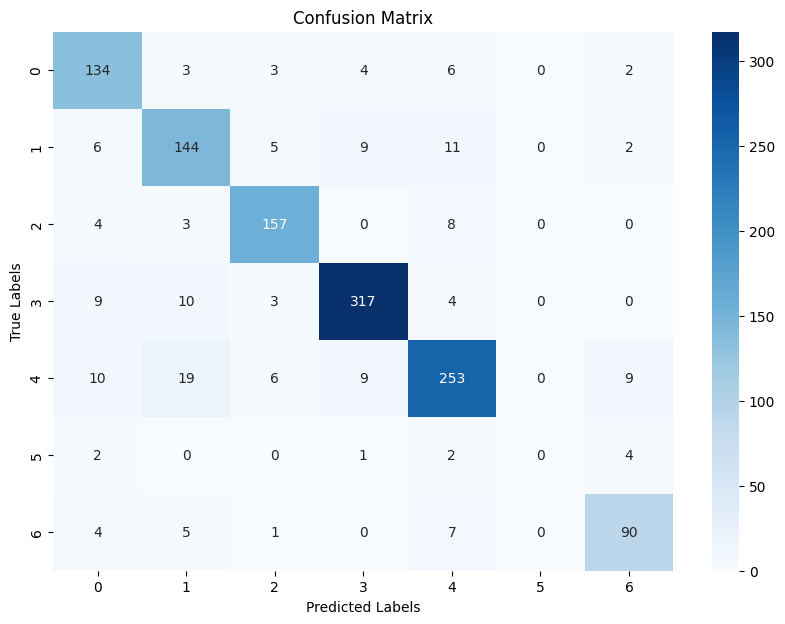

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()


In [ ]:
import pandas as pd

# Compute Class Distribution
class_counts = pd.Series(y_test).value_counts().sort_index()
class_distribution = class_counts / len(y_test) * 100  # Convert to percentage

# Save Class Distribution to CSV
class_distribution_df = pd.DataFrame({"Class": target_names, "Samples": class_counts, "Percentage": class_distribution})
class_distribution_df.to_csv("class_distribution.csv", index=False)

# Print Results
print("\nClass Imbalance Analysis:")
for i, class_name in enumerate(target_names):
    print(f"{class_name}: {class_counts[i]} samples ({class_distribution[i]:.2f}%)")

print("Class distribution saved successfully!")



Class Imbalance Analysis:
0: 152 samples (12.01%)
1: 177 samples (13.98%)
2: 172 samples (13.59%)
3: 343 samples (27.09%)
4: 306 samples (24.17%)
5: 9 samples (0.71%)
6: 107 samples (8.45%)
Class distribution saved successfully!


In [ ]:
# Compute Sensitivity (Recall) Per Class
tp = np.diag(conf_matrix)
fn = conf_matrix.sum(axis=1) - tp
sensitivity_per_class = tp / (tp + fn)

# Print Sensitivity for each class
print(f"\n{'Class':<20} {'Sensitivity (Recall)':<20}")
for i, class_name in enumerate(target_names):
    print(f"{class_name:<20} {sensitivity_per_class[i]:.4f}")



Class                Sensitivity (Recall)
0                    0.8816
1                    0.8136
2                    0.9128
3                    0.9242
4                    0.8268
5                    0.0000
6                    0.8411


In [ ]:
# Compute Precision, Specificity, and F1-Score
fp = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
tn = conf_matrix.sum() - (fp + fn + tp)

precision = tp / (tp + fp)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * sensitivity_per_class) / (precision + sensitivity_per_class)

# Save Detailed Metrics
metrics_df = pd.DataFrame({
    "Class": target_names,
    "Precision": precision,
    "Recall (Sensitivity)": sensitivity_per_class,
    "Specificity": specificity,
    "F1-Score": f1_score
})
metrics_df.to_csv("performance_metrics.csv", index=False)

# Print Full Metrics
print(f"\n{'Class':<20} {'Precision':<15} {'Recall (Sensitivity)':<20} {'Specificity':<15} {'F1-Score':<15}")
for i, class_name in enumerate(target_names):
    print(f"{class_name:<20} {precision[i]:.4f} {sensitivity_per_class[i]:<20.4f} {specificity[i]:<15.4f} {f1_score[i]:<15.4f}")

print("Performance metrics saved successfully!")



Class                Precision       Recall (Sensitivity) Specificity     F1-Score       
0                    0.7929 0.8816               0.9686          0.8349         
1                    0.7826 0.8136               0.9633          0.7978         
2                    0.8971 0.9128               0.9835          0.9049         
3                    0.9324 0.9242               0.9751          0.9283         
4                    0.8694 0.8268               0.9604          0.8476         
5                    nan 0.0000               1.0000          nan            
6                    0.8411 0.8411               0.9853          0.8411         
Performance metrics saved successfully!


<ipython-input-112-04e7916cccc6>:5: RuntimeWarning: invalid value encountered in divide
  precision = tp / (tp + fp)


In [ ]:
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
from tensorflow.keras.utils import to_categorical

# Compute Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred_classes)

# Compute Macro and Weighted F1-score
macro_f1 = f1_score.mean()
weighted_f1 = f1_score.sum() * (class_counts / class_counts.sum()).sum()

# Compute AUC-ROC Score
y_test_one_hot = to_categorical(y_test, num_classes=len(target_names))
auc_roc = roc_auc_score(y_test_one_hot, model.predict(X_test), average="macro")

# Print Overall Performance Metrics
print(f"\nOverall Accuracy: {test_acc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Macro F1-Score: {macro_f1:.4f}")
print(f"Weighted F1-Score: {weighted_f1:.4f}")
print(f"AUC-ROC Score: {auc_roc:.4f}")

# Save to Accuracy File
with open("accuracy_scores.txt", "a") as f:
    f.write(f"Balanced Accuracy: {balanced_acc:.4f}\n")
    f.write(f"Macro F1-Score: {macro_f1:.4f}\n")
    f.write(f"Weighted F1-Score: {weighted_f1:.4f}\n")
    f.write(f"AUC-ROC Score: {auc_roc:.4f}\n")

print("Final accuracy metrics saved successfully!")


40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 867ms/step

Overall Accuracy: 0.8649
Balanced Accuracy: 0.7429
Macro F1-Score: nan
Weighted F1-Score: nan
AUC-ROC Score: 0.9680
Final accuracy metrics saved successfully!


In [ ]:
import numpy as np

# Compute total number of samples per class
total_samples_per_class = conf_matrix.sum(axis=1)  # Total petitions in each class

# Compute misclassified samples per class (total samples - correct predictions)
misclassified_per_class = total_samples_per_class - np.diag(conf_matrix)

# Compute misclassification rate (%) for each class
misclassification_rate = (misclassified_per_class / total_samples_per_class) * 100

# Print results for each class
print("\nClass-Wise Misclassification Rates:")
for i, class_name in enumerate(target_names):
    print(f"{class_name}: {misclassification_rate[i]:.2f}% misclassified")



Class-Wise Misclassification Rates:
0: 11.84% misclassified
1: 18.64% misclassified
2: 8.72% misclassified
3: 7.58% misclassified
4: 17.32% misclassified
5: 100.00% misclassified
6: 15.89% misclassified


# BILSTM Model 6 - Focal Loss

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        # Convert labels to one-hot encoding
        y_true = tf.one_hot(tf.cast(y_true, tf.int32), depth=len(target_names))
        y_true = tf.cast(y_true, tf.float32)  # Ensure proper type

        # Clip y_pred to prevent log(0) errors
        epsilon = tf.keras.backend.epsilon()  # Small value to prevent NaN errors
        y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)

        # Standard categorical cross-entropy
        ce_loss = -y_true * tf.math.log(y_pred)  # CE loss per sample

        # Compute the focal weight (1 - p_t)^gamma
        weight = tf.pow(1 - y_pred, gamma)

        # Compute final focal loss
        focal_loss = alpha * weight * ce_loss

        # Reduce sum over all classes, then take mean over batch
        return tf.reduce_sum(focal_loss, axis=-1)  # Sum over all class probabilities
    return loss


In [ ]:
model.compile(
    loss=focal_loss(alpha=0.25, gamma=2.0),  # Use the updated focal loss
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5,  # Start with 5 epochs
    batch_size=32,
    callbacks=[early_stopping]  # Stops training when validation loss stops improving
)


Epoch 1/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 528s 3s/step - accuracy: 0.9002 - loss: 0.0443 - val_accuracy: 0.8451 - val_loss: 0.0704
Epoch 2/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 497s 3s/step - accuracy: 0.9089 - loss: 0.0366 - val_accuracy: 0.8538 - val_loss: 0.0687
Epoch 3/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 464s 3s/step - accuracy: 0.9169 - loss: 0.0332 - val_accuracy: 0.8538 - val_loss: 0.0648
Epoch 4/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 503s 3s/step - accuracy: 0.9257 - loss: 0.0279 - val_accuracy: 0.8640 - val_loss: 0.0651
Epoch 5/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 553s 3s/step - accuracy: 0.9323 - loss: 0.0267 - val_accuracy: 0.8585 - val_loss: 0.0661


In [ ]:
# Get Test Accuracy
test_acc = accuracy_score(y_test, np.argmax(model.predict(X_test), axis=1))

# Print Test Accuracy
print(f"\nFinal Test Accuracy: {test_acc:.4f}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 946ms/step

Final Test Accuracy: 0.8760


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Get model predictions
y_pred_classes = np.argmax(model.predict(X_test), axis=1)

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Compute Misclassification Rates Per Class
total_samples_per_class = conf_matrix.sum(axis=1)  # Total petitions in each class
misclassified_per_class = total_samples_per_class - np.diag(conf_matrix)  # Misclassified samples
misclassification_rate = (misclassified_per_class / total_samples_per_class) * 100

# Print Misclassification Rates
print("\nClass-Wise Misclassification Rates:")
for i, class_name in enumerate(target_names):
    print(f"{class_name}: {misclassification_rate[i]:.2f}% misclassified")

# Save misclassification rates to CSV
misclassification_df = pd.DataFrame({"Class": target_names, "Misclassification Rate (%)": misclassification_rate})
misclassification_df.to_csv("misclassification_rates.csv", index=False)

print("Misclassification rates saved successfully!")


40/40 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step

Class-Wise Misclassification Rates:
0: 13.82% misclassified
1: 16.38% misclassified
2: 8.72% misclassified
3: 6.71% misclassified
4: 13.07% misclassified
5: 100.00% misclassified
6: 18.69% misclassified
Misclassification rates saved successfully!


In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Compute Test Accuracy
test_acc = accuracy_score(y_test, y_pred_classes)

# Compute Balanced Accuracy (Handles Class Imbalance)
balanced_acc = balanced_accuracy_score(y_test, y_pred_classes)

# Print Results
print(f"\nFinal Test Accuracy: {test_acc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")

# Save Accuracy Scores
with open("accuracy_scores.txt", "w") as f:
    f.write(f"Test Accuracy: {test_acc:.4f}\n")
    f.write(f"Balanced Accuracy: {balanced_acc:.4f}\n")

print("Accuracy scores saved successfully!")



Final Test Accuracy: 0.8760
Balanced Accuracy: 0.7466
Accuracy scores saved successfully!


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Compute Precision, Recall, and F1-Score for each class
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_classes, average=None)

# Compute Macro and Weighted Scores
macro_f1 = f1.mean()  # Average across all classes equally
weighted_f1 = np.sum(f1 * (total_samples_per_class / np.sum(total_samples_per_class)))  # Weighted F1

# Print results
print("\nPer-Class Precision, Recall, and F1-Score:")
for i, class_name in enumerate(target_names):
    print(f"{class_name}: Precision: {precision[i]:.4f}, Recall: {recall[i]:.4f}, F1-Score: {f1[i]:.4f}")

print(f"\nMacro F1-Score: {macro_f1:.4f}")
print(f"Weighted F1-Score: {weighted_f1:.4f}")

# Save Performance Metrics
metrics_df = pd.DataFrame({
    "Class": target_names,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
})
metrics_df.to_csv("performance_metrics.csv", index=False)

# Save Overall Scores
with open("performance_scores.txt", "w") as f:
    f.write(f"Macro F1-Score: {macro_f1:.4f}\n")
    f.write(f"Weighted F1-Score: {weighted_f1:.4f}\n")

print("Performance metrics saved successfully!")



Per-Class Precision, Recall, and F1-Score:
0: Precision: 0.8618, Recall: 0.8618, F1-Score: 0.8618
1: Precision: 0.8000, Recall: 0.8362, F1-Score: 0.8177
2: Precision: 0.9023, Recall: 0.9128, F1-Score: 0.9075
3: Precision: 0.9496, Recall: 0.9329, F1-Score: 0.9412
4: Precision: 0.8444, Recall: 0.8693, F1-Score: 0.8567
5: Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000
6: Precision: 0.8447, Recall: 0.8131, F1-Score: 0.8286

Macro F1-Score: 0.7448
Weighted F1-Score: 0.8732
Performance metrics saved successfully!


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import roc_auc_score
from tensorflow.keras.utils import to_categorical

# Convert y_test to One-Hot Encoding for Multi-Class AUC computation
y_test_one_hot = to_categorical(y_test, num_classes=len(target_names))

# Compute AUC-ROC Score
auc_roc = roc_auc_score(y_test_one_hot, model.predict(X_test), average="macro")

# Print and Save
print(f"\nAUC-ROC Score: {auc_roc:.4f}")

with open("performance_scores.txt", "a") as f:
    f.write(f"AUC-ROC Score: {auc_roc:.4f}\n")

print("AUC-ROC score saved successfully!")


40/40 ━━━━━━━━━━━━━━━━━━━━ 37s 913ms/step

AUC-ROC Score: 0.9711
AUC-ROC score saved successfully!


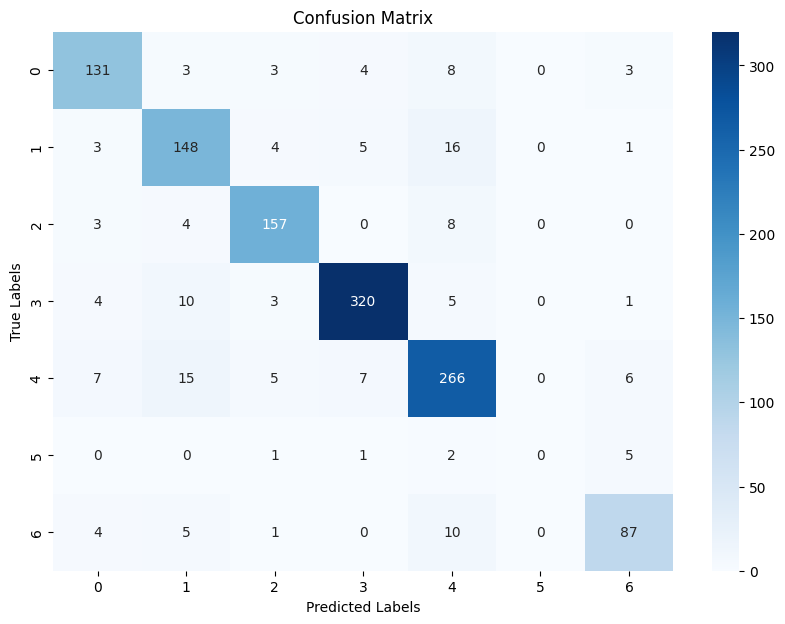

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()


In [ ]:
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
from tensorflow.keras.utils import to_categorical

# Compute Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred_classes)

# Compute Macro and Weighted F1-score
macro_f1 = f1_score.mean()
weighted_f1 = f1_score.sum() * (class_counts / class_counts.sum()).sum()

# Compute AUC-ROC Score
y_test_one_hot = to_categorical(y_test, num_classes=len(target_names))
auc_roc = roc_auc_score(y_test_one_hot, model.predict(X_test), average="macro")

# Print Overall Performance Metrics
print(f"\nOverall Accuracy: {test_acc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Macro F1-Score: {macro_f1:.4f}")
print(f"Weighted F1-Score: {weighted_f1:.4f}")
print(f"AUC-ROC Score: {auc_roc:.4f}")

# Save to Accuracy File
with open("accuracy_scores.txt", "a") as f:
    f.write(f"Balanced Accuracy: {balanced_acc:.4f}\n")
    f.write(f"Macro F1-Score: {macro_f1:.4f}\n")
    f.write(f"Weighted F1-Score: {weighted_f1:.4f}\n")
    f.write(f"AUC-ROC Score: {auc_roc:.4f}\n")

print("Final accuracy metrics saved successfully!")


40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step

Overall Accuracy: 0.8760
Balanced Accuracy: 0.7466
Macro F1-Score: nan
Weighted F1-Score: nan
AUC-ROC Score: 0.9711
Final accuracy metrics saved successfully!


In [ ]:
# Compute Precision, Specificity, and F1-Score
fp = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
tn = conf_matrix.sum() - (fp + fn + tp)

precision = tp / (tp + fp)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * sensitivity_per_class) / (precision + sensitivity_per_class)

# Save Detailed Metrics
metrics_df = pd.DataFrame({
    "Class": target_names,
    "Precision": precision,
    "Recall (Sensitivity)": sensitivity_per_class,
    "Specificity": specificity,
    "F1-Score": f1_score
})
metrics_df.to_csv("performance_metrics.csv", index=False)

# Print Full Metrics
print(f"\n{'Class':<20} {'Precision':<15} {'Recall (Sensitivity)':<20} {'Specificity':<15} {'F1-Score':<15}")
for i, class_name in enumerate(target_names):
    print(f"{class_name:<20} {precision[i]:.4f} {sensitivity_per_class[i]:<20.4f} {specificity[i]:<15.4f} {f1_score[i]:<15.4f}")

print("Performance metrics saved successfully!")



Class                Precision       Recall (Sensitivity) Specificity     F1-Score       
0                    0.8645 0.8816               0.9811          0.8730         
1                    0.7956 0.8136               0.9660          0.8045         
2                    0.9023 0.9128               0.9845          0.9075         
3                    0.9491 0.9242               0.9816          0.9365         
4                    0.8377 0.8268               0.9490          0.8322         
5                    nan 0.0000               1.0000          nan            
6                    0.8491 0.8411               0.9862          0.8451         
Performance metrics saved successfully!


<ipython-input-133-04e7916cccc6>:5: RuntimeWarning: invalid value encountered in divide
  precision = tp / (tp + fp)


In [ ]:
import pandas as pd

# Compute Class Distribution
class_counts = pd.Series(y_test).value_counts().sort_index()
class_distribution = class_counts / len(y_test) * 100  # Convert to percentage

# Save Class Distribution to CSV
class_distribution_df = pd.DataFrame({"Class": target_names, "Samples": class_counts, "Percentage": class_distribution})
class_distribution_df.to_csv("class_distribution.csv", index=False)

# Print Results
print("\nClass Imbalance Analysis:")
for i, class_name in enumerate(target_names):
    print(f"{class_name}: {class_counts[i]} samples ({class_distribution[i]:.2f}%)")

print("Class distribution saved successfully!")



Class Imbalance Analysis:
0: 152 samples (12.01%)
1: 177 samples (13.98%)
2: 172 samples (13.59%)
3: 343 samples (27.09%)
4: 306 samples (24.17%)
5: 9 samples (0.71%)
6: 107 samples (8.45%)
Class distribution saved successfully!


In [ ]:
# Compute Sensitivity (Recall) Per Class
tp = np.diag(conf_matrix)
fn = conf_matrix.sum(axis=1) - tp
sensitivity_per_class = tp / (tp + fn)

# Print Sensitivity for each class
print(f"\n{'Class':<20} {'Sensitivity (Recall)':<20}")
for i, class_name in enumerate(target_names):
    print(f"{class_name:<20} {sensitivity_per_class[i]:.4f}")



Class                Sensitivity (Recall)
0                    0.8618
1                    0.8362
2                    0.9128
3                    0.9329
4                    0.8693
5                    0.0000
6                    0.8131


#**Bilstm Model - BEST - MODEL NUMBER 2 IN THE REPORT**

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print (X_train[:5])

X_train shape: (5905, 219)
X_val shape: (1265, 219)
X_test shape: (1266, 219)
[[ 93  60   7 ...   0   0   0]
 [376  87 366 ...   0   0   0]
 [ 81 383 550 ...   0   0   0]
 [ 41 372 152 ...   0   0   0]
 [  3 253  26 ...   0   0   0]]


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, LSTM, Bidirectional, Dense, Dropout, SpatialDropout1D, Embedding, Concatenate, BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

vocab_size = len(tokenizer.word_index) + 1

# ** Compute Class Weights for Balanced Training**
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_df["petition_topic"]),
    y=train_df["petition_topic"]
)
class_weights_dict = {i: min(weight, 5.0) for i, weight in enumerate(class_weights)}

#  Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, verbose=1)

def build_bilstm_model(vocab_size, embedding_matrix, embedding_dim=300, trainable=False):
    #  Text Input
    text_input = Input(shape=(max_length,))
    embedding_layer = Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        trainable=trainable
    )(text_input)

    #  BiLSTM Branch
    bilstm = SpatialDropout1D(0.3)(embedding_layer)
    bilstm = Bidirectional(LSTM(128, return_sequences=True))(bilstm)
    bilstm = Dropout(0.35)(bilstm)
    bilstm = Bidirectional(LSTM(128))(bilstm)

    #  Categorical Features Input (`has_event`, `has_date`, `has_person`)
    cat_input = Input(shape=(3,))  #  Fixed to 3 categorical features
    cat_dense = Dense(64, activation='relu')(cat_input)
    cat_dense = BatchNormalization()(cat_dense)
    cat_dense = Dropout(0.3)(cat_dense)

    #  Merge Text + Categorical Features
    combined = Concatenate()([bilstm, cat_dense])
    combined_dense = Dense(64, activation='relu')(combined)
    combined_dense = Dropout(0.35)(combined_dense)

    #  Final Output Layer
    output = Dense(len(np.unique(train_df["petition_topic"])), activation='softmax')(combined_dense)

    #  Build Model
    model = Model(inputs=[text_input, cat_input], outputs=output)
    model.compile(loss='sparse_categorical_crossentropy',  # ** Removed Focal Loss**
                  optimizer=Adam(learning_rate=0.00015),
                  metrics=['accuracy'])

    return model

#  Build Model
model = build_bilstm_model(vocab_size, embedding_matrix, embedding_dim=300, trainable=False)

#  Print Model Summary
model.summary()

#  Train Initial Model (Frozen Embeddings)
history = model.fit(
    [X_train, train_df[['has_event', 'has_date', 'has_person']]],  # Pass categorical features
    train_df["petition_topic"],
    validation_data=(
        [X_val, val_df[['has_event', 'has_date', 'has_person']]],
        val_df["petition_topic"]),
    epochs=5,  # Initial training with frozen embeddings
    batch_size=32,
    class_weight=class_weights_dict,  # ** Class weights still used**
    callbacks=[early_stopping],
    verbose=1
)

#  Unfreeze Embeddings for Fine-Tuning
model.layers[1].trainable = True  #  Unfreezes embedding layer

#  Recompile Model with Lower Learning Rate for Fine-Tuning
model.compile(loss='sparse_categorical_crossentropy',  # ** Still No Focal Loss**
              optimizer=Adam(learning_rate=5e-5),  # Lower LR for fine-tuning
              metrics=['accuracy'])

#  Fine-Tune the Model
history = model.fit(
    [X_train, train_df[['has_event', 'has_date', 'has_person']]],  #  Pass categorical features again
    train_df["petition_topic"],
    validation_data=(
        [X_val, val_df[['has_event', 'has_date', 'has_person']]],
        val_df["petition_topic"]),
    epochs=5,  #  Fine-tuning step
    batch_size=32,
    class_weight=class_weights_dict,  # **Keeping class weights**
    callbacks=[early_stopping],
    verbose=1
)

#  Evaluate the Fine-Tuned Model
test_loss, test_acc = model.evaluate(
    [X_test, test_df[['has_event', 'has_date', 'has_person']]],
    test_df["petition_topic"]
)
print(f"Test Accuracy (Fine-Tuned FastText): {test_acc:.4f}")

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 219)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 219, 300)       │      5,502,000 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ spatial_dropout1d_1       │ (None, 219, 300)       │              0 │ embedding_1[0][0]      │
│ (SpatialDropout1D)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 3)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_2           │ (None, 219, 256)       │        439,296 │ spatial_dropout1d_1[0… │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 64)             │            256 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 219, 256)       │              0 │ bidirectional_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 64)             │            256 │ dense_3[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_3           │ (None, 256)            │        394,240 │ dropout_3[0][0]        │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 64)             │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 320)            │              0 │ bidirectional_3[0][0], │
│ (Concatenate)             │                        │                │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 64)             │         20,544 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 64)             │              0 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 7)              │            455 │ dropout_5[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 6,357,047 (24.25 MB)

 Trainable params: 854,919 (3.26 MB)

 Non-trainable params: 5,502,128 (20.99 MB)

Epoch 1/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 410s 2s/step - accuracy: 0.1690 - loss: 1.8313 - val_accuracy: 0.2285 - val_loss: 1.7951
Epoch 2/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 420s 2s/step - accuracy: 0.2442 - loss: 1.6245 - val_accuracy: 0.4917 - val_loss: 1.3929
Epoch 3/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 398s 2s/step - accuracy: 0.4490 - loss: 1.3396 - val_accuracy: 0.5850 - val_loss: 1.1483
Epoch 4/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 453s 2s/step - accuracy: 0.5386 - loss: 1.1500 - val_accuracy: 0.6245 - val_loss: 1.0452
Epoch 5/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 444s 2s/step - accuracy: 0.5961 - loss: 1.0566 - val_accuracy: 0.6925 - val_loss: 0.9437
Restoring model weights from the end of the best epoch: 5.
Epoch 1/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 454s 2s/step - accuracy: 0.6614 - loss: 0.9153 - val_accuracy: 0.7439 - val_loss: 0.8213
Epoch 2/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 440s 2s/step - accuracy: 0.6968 - loss: 0.8191 - val_accuracy: 0.7700 - val_loss: 0.7373
Epoch 3/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 458s 2

In [ ]:
X_test = np.array(X_test)
y_test = np.array(y_test)
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
y_pred = model.predict([X_test, test_df[['has_event', 'has_date', 'has_person']]])
y_pred_classes = np.argmax(y_pred, axis=1)

X_test shape: (1266, 219)
y_test shape: (1266,)
40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 673ms/step


In [ ]:
X_test = np.array(X_test, dtype=np.float32)  # Ensure float format
y_test = np.array(y_test, dtype=np.int32)  # Ensure integer format

In [ ]:
test_loss, test_acc = model.evaluate([X_test, test_df[['has_event', 'has_date', 'has_person']]], y_test)
print(f"Test Accuracy: {test_acc:.4f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 582ms/step - accuracy: 0.8066 - loss: 0.6208
Test Accuracy: 0.8096


In [ ]:
history_finetune = model.fit(
    [X_train, train_df[['has_event', 'has_date', 'has_person']]],
    y_train,
    validation_data=([X_val, val_df[['has_event', 'has_date', 'has_person']]], y_val),
    epochs=3,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 449s 2s/step - accuracy: 0.7991 - loss: 0.5581 - val_accuracy: 0.7881 - val_loss: 0.6547
Epoch 2/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 463s 2s/step - accuracy: 0.8015 - loss: 0.5593 - val_accuracy: 0.8206 - val_loss: 0.5758
Epoch 3/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 499s 2s/step - accuracy: 0.8357 - loss: 0.4809 - val_accuracy: 0.8277 - val_loss: 0.5548
Restoring model weights from the end of the best epoch: 3.


In [ ]:
test_loss, test_acc = model.evaluate([X_test, test_df[['has_event', 'has_date', 'has_person']]], y_test)
print(f"Test Accuracy: {test_acc:.4f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 709ms/step - accuracy: 0.8291 - loss: 0.5374
Test Accuracy: 0.8389


In [ ]:
history_finetune = model.fit(
    [X_train, train_df[['has_event', 'has_date', 'has_person']]],
    y_train,
    validation_data=([X_val, val_df[['has_event', 'has_date', 'has_person']]], y_val),
    epochs=3,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.8502 - loss: 0.4383 - val_accuracy: 0.8277 - val_loss: 0.5774
Epoch 2/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 421s 2s/step - accuracy: 0.8525 - loss: 0.4120 - val_accuracy: 0.8174 - val_loss: 0.5643
Epoch 3/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 455s 2s/step - accuracy: 0.8690 - loss: 0.3825 - val_accuracy: 0.8229 - val_loss: 0.5445
Restoring model weights from the end of the best epoch: 3.


In [ ]:
test_loss, test_acc = model.evaluate([X_test, test_df[['has_event', 'has_date', 'has_person']]], y_test)
print(f"Test Accuracy: {test_acc:.4f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 40s 930ms/step - accuracy: 0.8282 - loss: 0.5419
Test Accuracy: 0.8373


In [ ]:

history_finetune = model.fit(
    [X_train, train_df[['has_event', 'has_date', 'has_person']]],
    y_train,
    validation_data=([X_val, val_df[['has_event', 'has_date', 'has_person']]], y_val),
    epochs=3,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 447s 2s/step - accuracy: 0.8655 - loss: 0.3605 - val_accuracy: 0.8522 - val_loss: 0.5153
Epoch 2/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 500s 2s/step - accuracy: 0.8876 - loss: 0.3140 - val_accuracy: 0.8466 - val_loss: 0.4998
Epoch 3/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 505s 2s/step - accuracy: 0.8999 - loss: 0.2848 - val_accuracy: 0.8538 - val_loss: 0.4849
Restoring model weights from the end of the best epoch: 3.


In [ ]:
test_loss, test_acc = model.evaluate([X_test, test_df[['has_event', 'has_date', 'has_person']]], y_test)
print(f"Test Accuracy: {test_acc:.4f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 764ms/step - accuracy: 0.8592 - loss: 0.4838
Test Accuracy: 0.8665


In [ ]:
model.save("bilstm_model_with_entities.h5")
model.save("bilstm_model_with_entities.keras")

In [ ]:
import numpy as np

# Get model predictions
y_pred_probs = model.predict([X_test, test_df[['has_event', 'has_date', 'has_person']]])
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert softmax probabilities to class labels


40/40 ━━━━━━━━━━━━━━━━━━━━ 36s 788ms/step


In [ ]:
import numpy as np

# Ensure y_test and y_pred are NumPy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

print("y_test Shape:", y_test.shape)  # Should be (num_samples,)
print("y_pred Shape:", y_pred.shape)  # Should be (num_samples,)

y_test Shape: (1266,)
y_pred Shape: (1266,)


In [ ]:
y_test = np.reshape(y_test, (-1,))
y_pred = np.reshape(y_pred, (-1,))

In [ ]:
target_names = label_encoder.classes_

In [ ]:
import numpy as np

print("Type of y_test:", type(y_test))
print("Shape of y_test:", np.shape(y_test))
print("Type of y_pred:", type(y_pred))
print("Shape of y_pred:", np.shape(y_pred))
y_test_list = y_test.tolist()
y_pred_list = y_pred.tolist()

Type of y_test: <class 'numpy.ndarray'>
Shape of y_test: (1266,)
Type of y_pred: <class 'numpy.ndarray'>
Shape of y_pred: (1266,)


In [ ]:
import numpy as np

unique_labels = np.unique(y_test)
print("Unique Labels in y_test:", unique_labels)
print("Number of Unique Labels:", len(unique_labels))
print("Target Names:", target_names)
print("Number of Target Names:", len(target_names))

Unique Labels in y_test: [0 1 2 3 4 5 6]
Number of Unique Labels: 7
Target Names: [0, 1, 2, 3, 4, 5, 6]
Number of Target Names: 7


In [ ]:
from sklearn.metrics import classification_report
target_names = [str (name) for name in target_names]
# Generate a detailed classification report
print(classification_report(y_test_list, y_pred_list, target_names=target_names))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       152
           1       0.85      0.78      0.81       177
           2       0.88      0.92      0.90       172
           3       0.92      0.92      0.92       343
           4       0.82      0.82      0.82       306
           5       0.67      0.67      0.67         9
           6       0.87      0.86      0.86       107

    accuracy                           0.87      1266
   macro avg       0.84      0.84      0.84      1266
weighted avg       0.87      0.87      0.87      1266



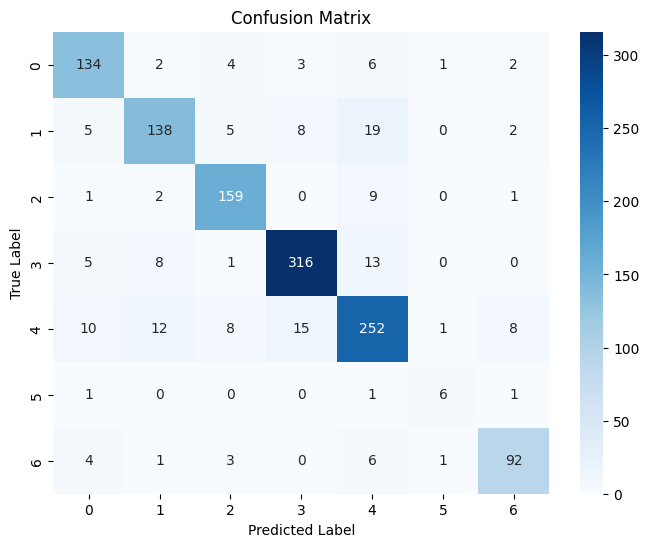

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute macro and weighted scores
macro_f1 = f1_score(y_test, y_pred, average='macro')
weighted_f1 = f1_score(y_test, y_pred, average='weighted')

macro_precision = precision_score(y_test, y_pred, average='macro')
weighted_precision = precision_score(y_test, y_pred, average='weighted')

macro_recall = recall_score(y_test, y_pred, average='macro')
weighted_recall = recall_score(y_test, y_pred, average='weighted')

# Print results
print(f" Macro F1-Score: {macro_f1:.4f}")
print(f" Weighted F1-Score: {weighted_f1:.4f}")
print(f" Macro Precision: {macro_precision:.4f}")
print(f" Weighted Precision: {weighted_precision:.4f}")
print(f" Macro Recall: {macro_recall:.4f}")
print(f" Weighted Recall: {weighted_recall:.4f}")

 Macro F1-Score: 0.8358
 Weighted F1-Score: 0.8661
 Macro Precision: 0.8357
 Weighted Precision: 0.8664
 Macro Recall: 0.8367
 Weighted Recall: 0.8665


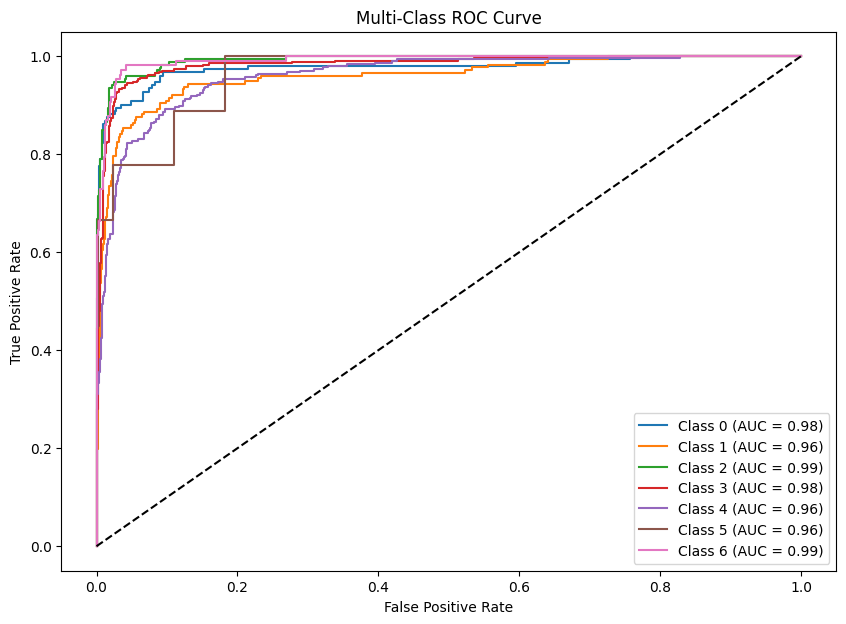

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize labels for multi-class ROC
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend()
plt.show()

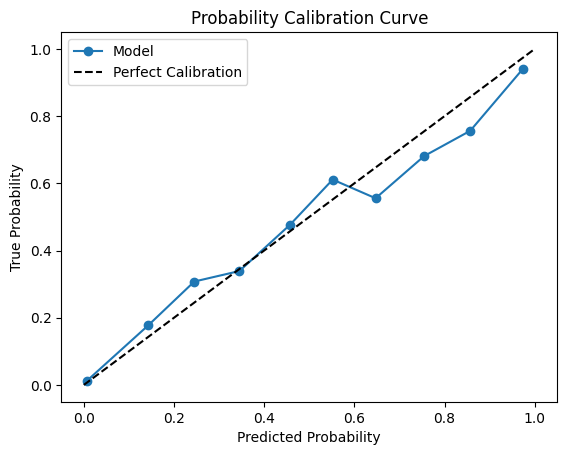

In [ ]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the highest-confidence class
prob_true, prob_pred = calibration_curve(y_test_bin.ravel(), y_pred_probs.ravel(), n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label="Model")
plt.plot([0, 1], [0, 1], 'k--', label="Perfect Calibration")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Probability Calibration Curve")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, y_pred_probs)
print(f"\n Log-Loss: {logloss:.4f}")


 Log-Loss: 0.4544


In [ ]:
from sklearn.metrics import accuracy_score

# Compute accuracy for each class
class_accuracies = {}
for class_label in np.unique(y_test):
    class_indices = (y_test == class_label)
    class_accuracies[class_label] = accuracy_score(y_test[class_indices], y_pred[class_indices])

# Convert to DataFrame
accuracy_df = pd.DataFrame(list(class_accuracies.items()), columns=["Class", "Accuracy"])

# Display per-class accuracy
print("\n **Per-Class Accuracy**")
print(accuracy_df)


 **Per-Class Accuracy**
   Class  Accuracy
0      0  0.881579
1      1  0.779661
2      2  0.924419
3      3  0.921283
4      4  0.823529
5      5  0.666667
6      6  0.859813


In [ ]:
import pandas as pd
from collections import Counter

# Count misclassified instances per class
misclassified_counts = Counter(y_test[y_test != y_pred])

# Create a DataFrame for better readability
misclassification_df = pd.DataFrame({
    "Class": list(misclassified_counts.keys()),
    "Misclassified Count": list(misclassified_counts.values()),
    "Total Count": [sum(y_test == c) for c in misclassified_counts.keys()],
})
misclassification_df["Misclassification Rate (%)"] = (misclassification_df["Misclassified Count"] / misclassification_df["Total Count"]) * 100

# Display misclassification rates
print("\n **Misclassification Rates**")
print(misclassification_df)


 **Misclassification Rates**
   Class  Misclassified Count  Total Count  Misclassification Rate (%)
0      4                   54          306                   17.647059
1      3                   27          343                    7.871720
2      1                   39          177                   22.033898
3      0                   18          152                   11.842105
4      2                   13          172                    7.558140
5      6                   15          107                   14.018692
6      5                    3            9                   33.333333


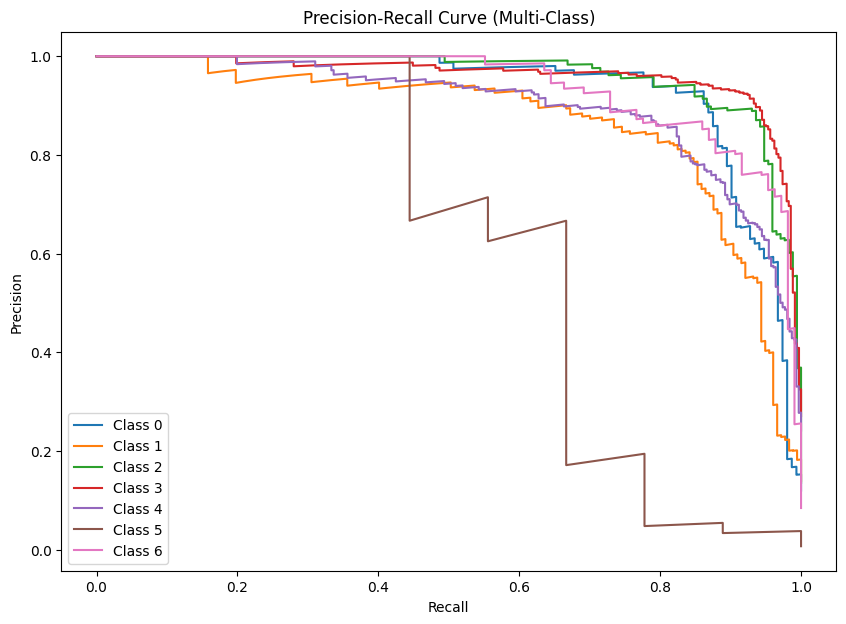

In [ ]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 7))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_probs[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Multi-Class)")
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Identify misclassified samples
misclassified_mask = y_test != y_pred
misclassified_samples = test_df[misclassified_mask].copy()
misclassified_samples["True Label"] = y_test[misclassified_mask]
misclassified_samples["Predicted Label"] = y_pred[misclassified_mask]

# Show 10 misclassified examples
print("\n **Example Misclassified Samples:**")
print(misclassified_samples[['petition_text', 'True Label', 'Predicted Label']].head(10))


 **Example Misclassified Samples:**
                                          petition_text  True Label  \
954   review statutory ratios in early years. we bel...           4   
7470  to allow staff working in offices within parli...           4   
4192  limit the shooting season of woodcock. ma , cp...           3   
4878  a commission to investigate the feasibility an...           1   
6711  force footballers to take a pay cut during the...           0   
6319  fund free childcare for all pre-school pupils....           1   
5488  change the uk's airport slots regulations. in ...           3   
7940  make formal examinations computer based to red...           2   
6727  test for covid routinely. stop restricting cov...           1   
2150  reform pip assessments. have private companies...           1   

      Predicted Label  
954                 2  
7470                6  
4192                0  
4878                3  
6711                6  
6319                2  
5488         

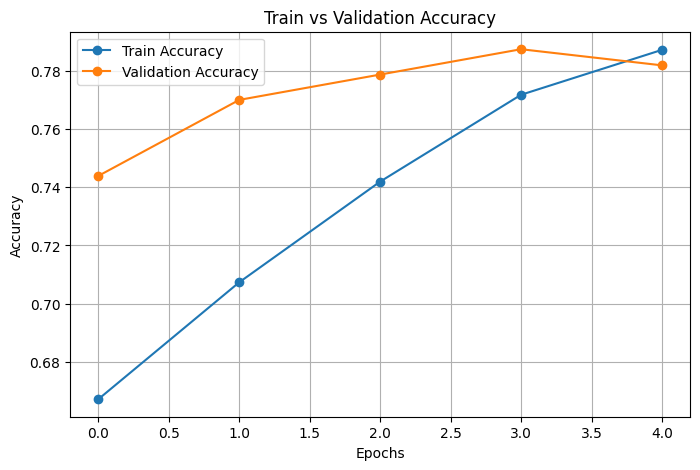

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy over epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# BILSTM MODEL 7-1 WITH ATTENTION LAYER one layer
The second BiLSTM in Model 7 was extracting deep sequential features — like long-term dependencies or transitions in language.

By removing it, you made your model rely only on the first-level patterns (one BiLSTM), and then jumped straight to attention — which had too little information to work with.
First BiLSTM	Low-level phrase patterns (e.g., “increase funding”)
Second BiLSTM	High-level abstract patterns (e.g., tone, structure)
Attention	Helps focus on the most important of those patterns

In [ ]:
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='att_weight', shape=(input_shape[-1], 1),
                                 initializer='normal', trainable=True)
        self.b = self.add_weight(name='att_bias', shape=(input_shape[1], 1),
                                 initializer='zeros', trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        e = K.tanh(K.dot(inputs, self.W) + self.b)
        e = K.squeeze(e, axis=-1)
        alpha = K.softmax(e)
        alpha = K.expand_dims(alpha, axis=-1)
        context = inputs * alpha
        context = K.sum(context, axis=1)
        return context

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, LSTM, Bidirectional, Dense, Dropout,
                                     SpatialDropout1D, Embedding, Concatenate, BatchNormalization)
from tensorflow.keras.optimizers import Adam

def build_attention_bilstm(vocab_size, embedding_matrix, embedding_dim=300, trainable=False):
    text_input = Input(shape=(max_length,))
    embedding = Embedding(input_dim=vocab_size,
                          output_dim=embedding_dim,
                          weights=[embedding_matrix],
                          trainable=trainable)(text_input)

    x = SpatialDropout1D(0.3)(embedding)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Dropout(0.35)(x)
    x = AttentionLayer()(x)

    entity_input = Input(shape=(3,))
    entity_dense = Dense(64, activation='relu')(entity_input)
    entity_dense = BatchNormalization()(entity_dense)
    entity_dense = Dropout(0.3)(entity_dense)

    combined = Concatenate()([x, entity_dense])
    combined = Dense(64, activation='relu')(combined)
    combined = Dropout(0.35)(combined)

    output = Dense(len(np.unique(train_df["petition_topic"])), activation='softmax')(combined)

    model = Model(inputs=[text_input, entity_input], outputs=output)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adam(learning_rate=1.5e-4),
                  metrics=['accuracy'])
    return model


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping

# Class weights
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_df["petition_topic"]),
    y=train_df["petition_topic"]
)
class_weights_dict = {i: min(weight, 5.0) for i, weight in enumerate(class_weights)}

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, verbose=1)


In [ ]:
# Build with frozen embeddings
model = build_attention_bilstm(vocab_size, embedding_matrix, trainable=False)

# Initial training (frozen)
history = model.fit(
    [X_train, train_df[['has_event', 'has_date', 'has_person']]],
    train_df["petition_topic"],
    validation_data=([X_val, val_df[['has_event', 'has_date', 'has_person']]], val_df["petition_topic"]),
    epochs=5,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.1759 - loss: 1.7564 - val_accuracy: 0.1486 - val_loss: 1.9055
Epoch 2/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.2004 - loss: 1.7036 - val_accuracy: 0.2751 - val_loss: 1.7882
Epoch 3/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.2386 - loss: 1.6534 - val_accuracy: 0.3534 - val_loss: 1.6419
Epoch 4/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.3578 - loss: 1.5399 - val_accuracy: 0.4182 - val_loss: 1.4901
Epoch 5/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.4128 - loss: 1.4046 - val_accuracy: 0.5083 - val_loss: 1.3209
Restoring model weights from the end of the best epoch: 5.


In [ ]:
# Unfreeze embedding layer
model.layers[1].trainable = True

# Recompile with lower learning rate
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=5e-5),
              metrics=['accuracy'])

# Fine-tuning
history_fine = model.fit(
    [X_train, train_df[['has_event', 'has_date', 'has_person']]],
    train_df["petition_topic"],
    validation_data=([X_val, val_df[['has_event', 'has_date', 'has_person']]], val_df["petition_topic"]),
    epochs=5,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.4759 - loss: 1.2800 - val_accuracy: 0.5296 - val_loss: 1.2445
Epoch 2/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.5124 - loss: 1.2131 - val_accuracy: 0.5597 - val_loss: 1.1709
Epoch 3/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.5516 - loss: 1.1163 - val_accuracy: 0.6055 - val_loss: 1.0986
Epoch 4/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.5750 - loss: 1.0836 - val_accuracy: 0.6308 - val_loss: 1.0357
Epoch 5/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.6217 - loss: 1.0190 - val_accuracy: 0.5818 - val_loss: 1.0782
Restoring model weights from the end of the best epoch: 4.


In [ ]:
test_loss, test_accuracy = model.evaluate(
    [X_test, test_df[['has_event', 'has_date', 'has_person']]],
    test_df["petition_topic"],
    verbose=1
)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6401 - loss: 0.9931
Test Loss: 0.9949
Test Accuracy: 0.6319


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step


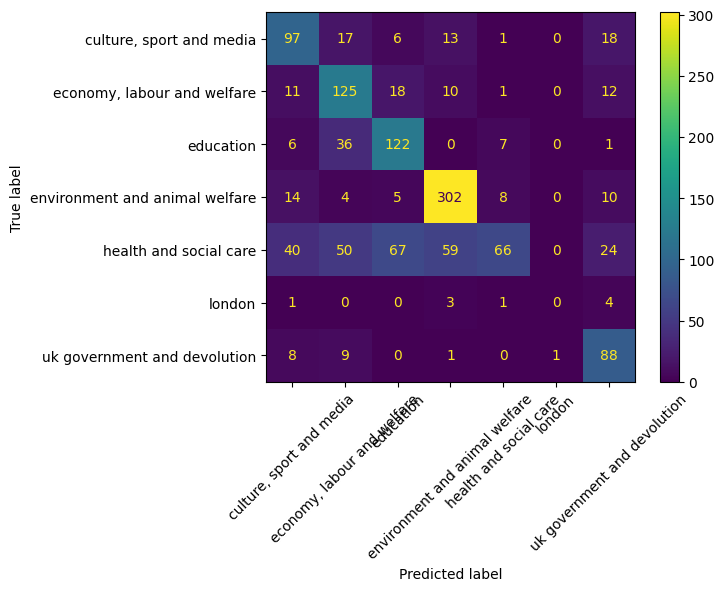

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_probs = model.predict([X_test, test_df[['has_event', 'has_date', 'has_person']]])
y_pred = y_pred_probs.argmax(axis=1)

cm = confusion_matrix(test_df["petition_topic"], y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=topic_encoder.classes_)
disp.plot(xticks_rotation=45)


                                precision    recall  f1-score   support

      culture, sport and media       0.55      0.64      0.59       152
   economy, labour and welfare       0.52      0.71      0.60       177
                     education       0.56      0.71      0.63       172
environment and animal welfare       0.78      0.88      0.83       343
        health and social care       0.79      0.22      0.34       306
                        london       0.00      0.00      0.00         9
  uk government and devolution       0.56      0.82      0.67       107

                      accuracy                           0.63      1266
                     macro avg       0.54      0.57      0.52      1266
                  weighted avg       0.66      0.63      0.60      1266

Macro F1 Score: 0.5207
Macro AUC: 0.9016
Log Loss: 0.9949


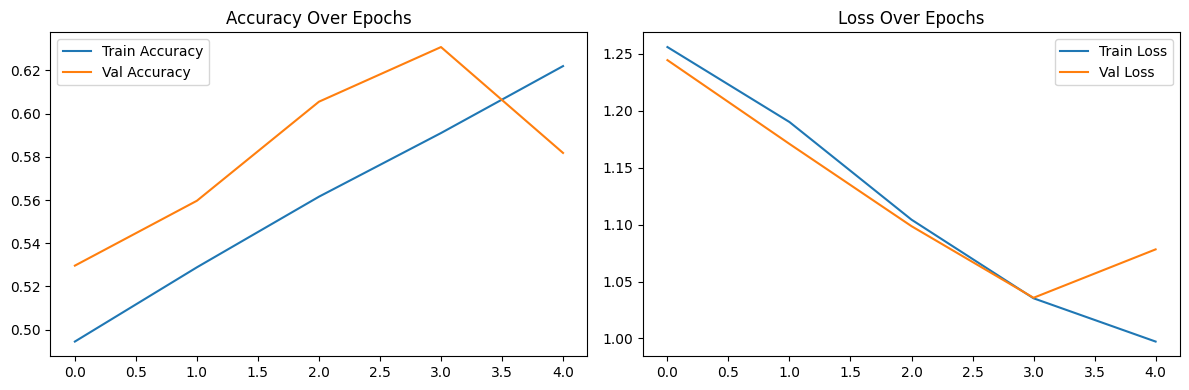

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_df["petition_topic"], y_pred, target_names=topic_encoder.classes_))
from sklearn.metrics import f1_score

macro_f1 = f1_score(test_df["petition_topic"], y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1:.4f}")
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_true_bin = label_binarize(test_df["petition_topic"], classes=range(len(topic_encoder.classes_)))
auc = roc_auc_score(y_true_bin, y_pred_probs, average='macro', multi_class='ovr')
print(f"Macro AUC: {auc:.4f}")
from sklearn.metrics import log_loss

logloss = log_loss(test_df["petition_topic"], y_pred_probs)
print(f"Log Loss: {logloss:.4f}")
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_fine.history['accuracy'], label='Train Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")

plt.subplot(1,2,2)
plt.plot(history_fine.history['loss'], label='Train Loss')
plt.plot(history_fine.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Over Epochs")

plt.tight_layout()
plt.show()

In [ ]:
misclass_percent = {}
class_names = topic_encoder.classes_

for i, class_name in enumerate(class_names):
    total = cm[i].sum()
    correct = cm[i, i]
    misclassified = total - correct
    percent = (misclassified / total) * 100 if total > 0 else 0
    misclass_percent[class_name] = percent

print(" Misclassification Percentage per Class:")
for class_name, percent in misclass_percent.items():
    print(f"{class_name:35}: {percent:.2f}%")


 Misclassification Percentage per Class:
culture, sport and media           : 36.18%
economy, labour and welfare        : 29.38%
education                          : 29.07%
environment and animal welfare     : 11.95%
health and social care             : 78.43%
london                             : 100.00%
uk government and devolution       : 17.76%


# **BILSTM STACKED WITH ATTENTION LAYER - MODEL 4 IN THE REPORT**

In [ ]:
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='att_weight', shape=(input_shape[-1], 1),
                                 initializer='normal', trainable=True)
        self.b = self.add_weight(name='att_bias', shape=(input_shape[1], 1),
                                 initializer='zeros', trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        e = K.tanh(K.dot(inputs, self.W) + self.b)
        e = K.squeeze(e, axis=-1)
        alpha = K.softmax(e)
        alpha = K.expand_dims(alpha, axis=-1)
        context = inputs * alpha
        context = K.sum(context, axis=1)
        return context


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, LSTM, Bidirectional, Dense, Dropout,
                                     SpatialDropout1D, Embedding, Concatenate, BatchNormalization)
from tensorflow.keras.optimizers import Adam

def build_attention_bilstm(vocab_size, embedding_matrix, embedding_dim=300, trainable=False):
    text_input = Input(shape=(max_length,))
    embedding = Embedding(input_dim=vocab_size,
                          output_dim=embedding_dim,
                          weights=[embedding_matrix],
                          trainable=trainable)(text_input)

    x = SpatialDropout1D(0.3)(embedding)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Dropout(0.35)(x)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = AttentionLayer()(x)

    entity_input = Input(shape=(3,))
    entity_dense = Dense(64, activation='relu')(entity_input)
    entity_dense = BatchNormalization()(entity_dense)
    entity_dense = Dropout(0.3)(entity_dense)

    combined = Concatenate()([x, entity_dense])
    combined = Dense(64, activation='relu')(combined)
    combined = Dropout(0.35)(combined)

    output = Dense(len(np.unique(train_df["petition_topic"])), activation='softmax')(combined)

    model = Model(inputs=[text_input, entity_input], outputs=output)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adam(learning_rate=1.5e-4),
                  metrics=['accuracy'])
    return model


In [ ]:
model = build_attention_bilstm(vocab_size, embedding_matrix, trainable=False)


In [ ]:
history = model.fit(
    [X_train, train_df[['has_event', 'has_date', 'has_person']]],
    train_df["petition_topic"],
    validation_data=([X_val, val_df[['has_event', 'has_date', 'has_person']]],
                     val_df["petition_topic"]),
    epochs=5,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.1686 - loss: 1.8158 - val_accuracy: 0.2008 - val_loss: 1.8958
Epoch 2/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.2541 - loss: 1.6561 - val_accuracy: 0.4158 - val_loss: 1.6113
Epoch 3/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.3944 - loss: 1.4454 - val_accuracy: 0.4838 - val_loss: 1.3355
Epoch 4/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.4569 - loss: 1.3110 - val_accuracy: 0.6087 - val_loss: 1.0877
Epoch 5/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.5130 - loss: 1.1653 - val_accuracy: 0.6032 - val_loss: 1.0822
Restoring model weights from the end of the best epoch: 5.


In [ ]:
model.layers[1].trainable = True
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=5e-5),
              metrics=['accuracy'])
history_finetune = model.fit(
    [X_train, train_df[['has_event', 'has_date', 'has_person']]],
    train_df["petition_topic"],
    validation_data=([X_val, val_df[['has_event', 'has_date', 'has_person']]],
                     val_df["petition_topic"]),
    epochs=5,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.5729 - loss: 1.0473 - val_accuracy: 0.6372 - val_loss: 0.9747
Epoch 2/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.6063 - loss: 0.9800 - val_accuracy: 0.6893 - val_loss: 0.9197
Epoch 3/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.6642 - loss: 0.8651 - val_accuracy: 0.6996 - val_loss: 0.8598
Epoch 4/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.7121 - loss: 0.7818 - val_accuracy: 0.7099 - val_loss: 0.8163
Epoch 5/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7170 - loss: 0.7384 - val_accuracy: 0.7462 - val_loss: 0.7555
Restoring model weights from the end of the best epoch: 5.


In [ ]:
history_finetune = model.fit(
    [X_train, train_df[['has_event', 'has_date', 'has_person']]],
    train_df["petition_topic"],
    validation_data=([X_val, val_df[['has_event', 'has_date', 'has_person']]],
                     val_df["petition_topic"]),
    epochs=3,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.7631 - loss: 0.6857 - val_accuracy: 0.7455 - val_loss: 0.7519
Epoch 2/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.7901 - loss: 0.6027 - val_accuracy: 0.7739 - val_loss: 0.6963
Epoch 3/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.7995 - loss: 0.5588 - val_accuracy: 0.7826 - val_loss: 0.6743
Restoring model weights from the end of the best epoch: 3.


In [ ]:
history_finetune = model.fit(
    [X_train, train_df[['has_event', 'has_date', 'has_person']]],
    train_df["petition_topic"],
    validation_data=([X_val, val_df[['has_event', 'has_date', 'has_person']]],
                     val_df["petition_topic"]),
    epochs=3,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.8219 - loss: 0.5358 - val_accuracy: 0.7984 - val_loss: 0.6670
Epoch 2/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.8308 - loss: 0.4792 - val_accuracy: 0.8103 - val_loss: 0.6314
Epoch 3/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.8539 - loss: 0.4535 - val_accuracy: 0.7747 - val_loss: 0.7439
Restoring model weights from the end of the best epoch: 2.


In [ ]:
y_test = np.array(y_test).squeeze()


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step

 Classification Report:

              precision    recall  f1-score   support

           0     0.7374    0.8684    0.7976       152
           1     0.7539    0.8136    0.7826       177
           2     0.8786    0.8837    0.8812       172
           3     0.9281    0.9038    0.9158       343
           4     0.7930    0.7386    0.7648       306
           5     0.6250    0.5556    0.5882         9
           6     0.8958    0.8037    0.8473       107

    accuracy                         0.8333      1266
   macro avg     0.8017    0.7953    0.7968      1266
weighted avg     0.8366    0.8333    0.8337      1266



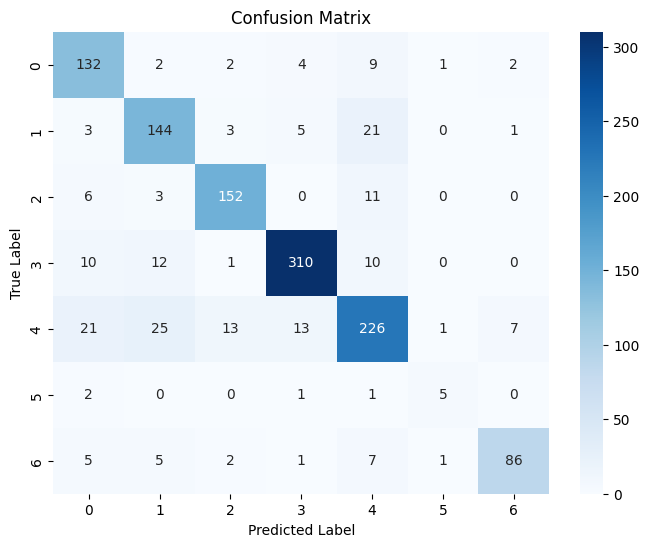

Class 0: Accuracy = 0.8684, Misclassification Rate = 0.1316
Class 1: Accuracy = 0.8136, Misclassification Rate = 0.1864
Class 2: Accuracy = 0.8837, Misclassification Rate = 0.1163
Class 3: Accuracy = 0.9038, Misclassification Rate = 0.0962
Class 4: Accuracy = 0.7386, Misclassification Rate = 0.2614
Class 5: Accuracy = 0.5556, Misclassification Rate = 0.4444
Class 6: Accuracy = 0.8037, Misclassification Rate = 0.1963
 AUC Score (OvR): 0.9665


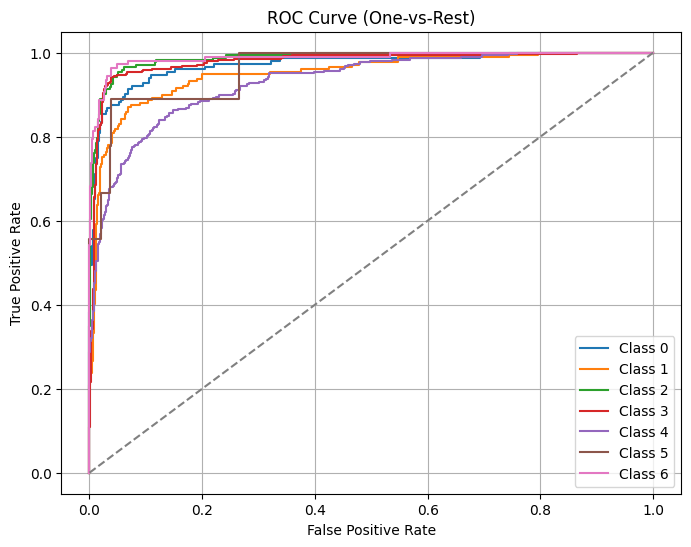

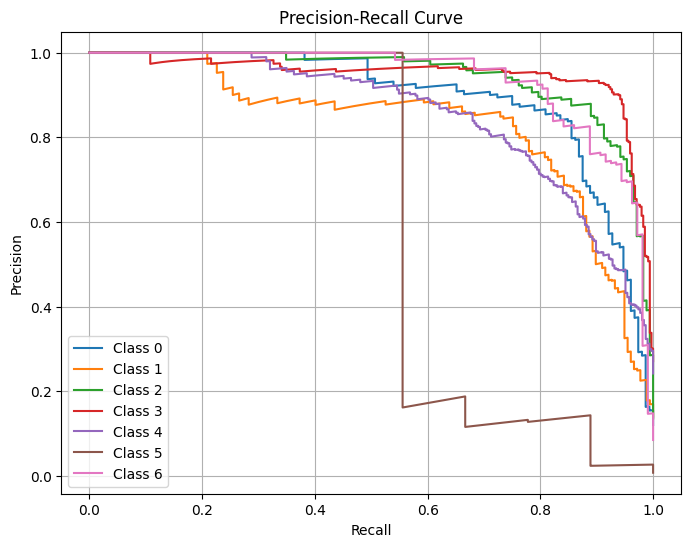

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix, log_loss, roc_auc_score,
    precision_recall_curve, roc_curve
)
from sklearn.preprocessing import label_binarize
from tensorflow.keras.metrics import top_k_categorical_accuracy

# Predict
y_test = np.array(y_test)
y_pred_probs = model.predict([X_test, test_df[['has_event', 'has_date', 'has_person']]])
y_pred = np.argmax(y_pred_probs, axis=1)



# Classification Report
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Per-Class Accuracy
class_accuracies = cm.diagonal() / cm.sum(axis=1)
for i, acc in enumerate(class_accuracies):
    print(f"Class {i}: Accuracy = {acc:.4f}, Misclassification Rate = {1 - acc:.4f}")


# ROC AUC (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
auc_score = roc_auc_score(y_test_bin, y_pred_probs, multi_class="ovr")
print(f" AUC Score (OvR): {auc_score:.4f}")

# ROC Curve (One-vs-Rest)
plt.figure(figsize=(8, 6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    plt.plot(fpr, tpr, label=f"Class {i}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest)")
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i in range(y_test_bin.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_probs[:, i])
    plt.plot(recall, precision, label=f"Class {i}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()


Log Loss: 0.5517


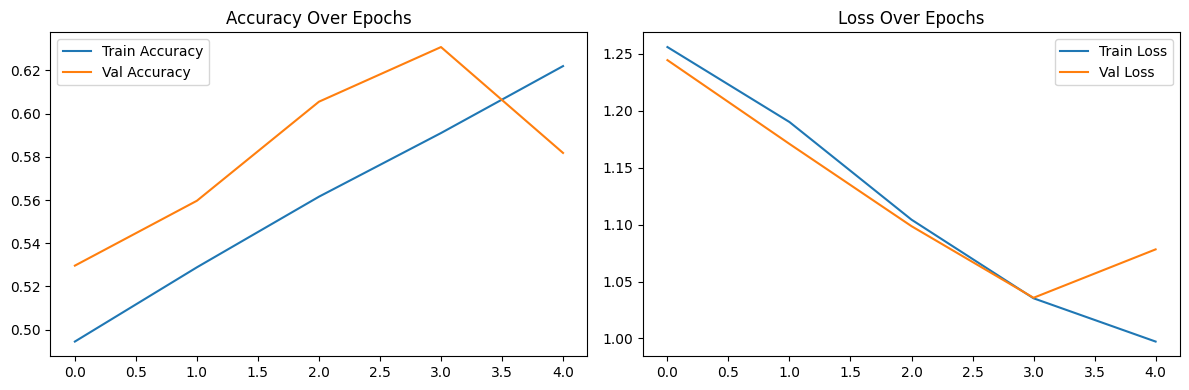

In [ ]:
logloss = log_loss(test_df["petition_topic"], y_pred_probs)
print(f"Log Loss: {logloss:.4f}")
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_fine.history['accuracy'], label='Train Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")

plt.subplot(1,2,2)
plt.plot(history_fine.history['loss'], label='Train Loss')
plt.plot(history_fine.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Over Epochs")

plt.tight_layout()
plt.show()

In [ ]:
y_pred = np.argmax(y_pred_probs, axis=1)
confidence_scores = np.max(y_pred_probs, axis=1)

misclassified_df = test_df.copy()
misclassified_df["true_label"] = y_test
misclassified_df["predicted_label"] = y_pred
misclassified_df["confidence"] = confidence_scores

misclassified_only = misclassified_df[misclassified_df["true_label"] != misclassified_df["predicted_label"]]


misclassified_sorted = misclassified_only.sort_values(by="confidence", ascending=False)

columns_to_show = ["petition_text", "true_label", "predicted_label", "confidence"]
print(misclassified_sorted[columns_to_show].head(10))

                                          petition_text  true_label  \
969   ban greyhound racing and improve protections f...           0   
2813  government to offer more assistance to car own...           1   
7339  ban sale and use of leaf blowers. ban the sale...           4   
2858  extend rules on listing ingredients and recall...           4   
1184  set stricter legal targets for air quality and...           4   
5761  make it a legal requirement to state allergens...           4   
6134  ensure that adequate shelter is provided for a...           0   
6319  fund free childcare for all pre-school pupils....           1   
7133  fund band 6 pay for newly-qualified nurses. th...           6   
1221  require food labels to include pesticides used...           4   

      predicted_label  confidence  
969                 3    0.995923  
2813                3    0.993860  
7339                3    0.991533  
2858                3    0.991094  
1184                3    0.991046  
57

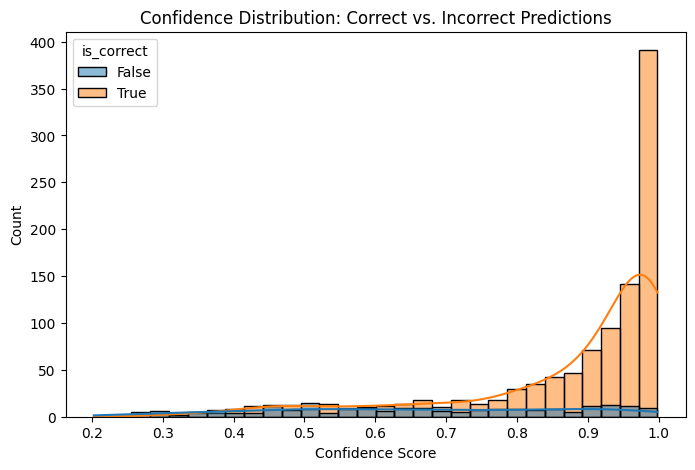

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confidence for correct vs incorrect
misclassified_df["is_correct"] = misclassified_df["true_label"] == misclassified_df["predicted_label"]

plt.figure(figsize=(8,5))
sns.histplot(data=misclassified_df, x="confidence", hue="is_correct", kde=True, bins=30)
plt.title("Confidence Distribution: Correct vs. Incorrect Predictions")
plt.xlabel("Confidence Score")
plt.show()


In [ ]:
# Sort by lowest confidence
uncertain_preds = misclassified_df.sort_values(by="confidence", ascending=True)
print(uncertain_preds[columns_to_show].head(10))


                                          petition_text  true_label  \
4471  new laws to protect our nhs. the nhs should be...           4   
8156  the government should directly fund all air am...           0   
4799  limit postal votes. limit postal votes to the ...           6   
6215  fund a pay rise for nhs workers by raising the...           6   
229   increase pay for nhs healthcare workers and re...           6   
788   change the hold music on the dwp phone line. c...           0   
942   guarantee pay to 0 hour workers in the event o...           0   
3184  open vape shops as a essential business during...           4   
935   increase the minimum pay for retail sales advi...           0   
5603  do not fund portraits of his majesty the king ...           4   

      predicted_label  confidence  
4471                6    0.202883  
8156                4    0.254897  
4799                4    0.258206  
6215                3    0.259278  
229                 4    0.262935  
78

# BILSTM Model 8 - fail

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, LSTM, Bidirectional, Dense, Dropout, SpatialDropout1D, Embedding, Concatenate, BatchNormalization
)
from tensorflow.keras.optimizers import Adam

def build_bilstm_model(vocab_size, embedding_matrix, embedding_dim=300, trainable=False):
    text_input = Input(shape=(max_length,))
    embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], trainable=trainable)(text_input)

    bilstm = SpatialDropout1D(0.3)(embedding_layer)
    bilstm = Bidirectional(LSTM(128, return_sequences=True))(bilstm)
    bilstm = Dropout(0.5)(bilstm)  # Increased Dropout
    bilstm = Bidirectional(LSTM(128))(bilstm)

    cat_input = Input(shape=(3,))
    cat_dense = Dense(64, activation='relu')(cat_input)
    cat_dense = BatchNormalization()(cat_dense)
    cat_dense = Dropout(0.3)(cat_dense)

    combined = Concatenate()([bilstm, cat_dense])
    combined_dense = Dense(64, activation='relu')(combined)
    combined_dense = Dropout(0.35)(combined_dense)

    output = Dense(len(np.unique(train_df["petition_topic"])), activation='softmax')(combined_dense)

    model = Model(inputs=[text_input, cat_input], outputs=output)

    model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=5e-5), metrics=['accuracy'])

    return model

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
model = build_bilstm_model(vocab_size, embedding_matrix, embedding_dim=300, trainable=False)

from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_df["petition_topic"]),
    y=train_df["petition_topic"]
)

class_weights_dict = {i: min(weight, 5.0) for i, weight in enumerate(class_weights)}

class_weights_dict[5] *= 2.5  # More focus on Class 5
class_weights_dict[6] *= 2.0  # More focus on Class 6
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Stop training if validation loss stops improving
    patience=2,  # Wait for 2 epochs before stopping
    restore_best_weights=True,  # Revert to best model weights
    verbose=1
)


# Train the model (Phase 1 - Frozen Embeddings)
history = model.fit(
    [X_train, train_df[['has_event', 'has_date', 'has_person']]],
    y_train,
    validation_data=([X_val, val_df[['has_event', 'has_date', 'has_person']]], y_val),
    epochs=5,  # First 5 epochs (Frozen embeddings)
    batch_size=64,  # Faster training
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)

# Unfreeze Embeddings for Fine-Tuning
model.layers[1].trainable = True  # Unfreezes embedding layer

# Recompile with a lower learning rate
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=Adam(learning_rate=3e-5),  #  More stable learning rate
              metrics=['accuracy'])

# Train the model (Phase 2 - Fine-Tuned Embeddings)
history_finetune = model.fit(
    [X_train, train_df[['has_event', 'has_date', 'has_person']]],
    y_train,
    validation_data=([X_val, val_df[['has_event', 'has_date', 'has_person']]], y_val),
    epochs=5,  # Second 5 epochs (Fine-tuning)
    batch_size=64,
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)

model.save("bilstm_finetuned_class_weights.h5")
print(" Model with tuned parameters & fine-tuning saved successfully!")

Epoch 1/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - accuracy: 0.1067 - loss: 2.2115 - val_accuracy: 0.0854 - val_loss: 1.9597
Epoch 2/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.1141 - loss: 2.1448 - val_accuracy: 0.0854 - val_loss: 1.9454
Epoch 3/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.1176 - loss: 2.1669 - val_accuracy: 0.0854 - val_loss: 1.9298
Epoch 4/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.1310 - loss: 2.0260 - val_accuracy: 0.1921 - val_loss: 1.9525
Epoch 5/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.2305 - loss: 1.9356 - val_accuracy: 0.3470 - val_loss: 1.7394
Restoring model weights from the end of the best epoch: 5.
Epoch 1/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.2779 - loss: 1.8672 - val_accuracy: 0.3478 - val_loss: 1.7046
Epoch 2/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.3156 - loss: 1.7669 - val_accuracy: 0.3834 - val_loss: 1.7043
Epoch 3/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accu

 Model with tuned parameters & fine-tuning saved successfully!


# BILSTM MODEL 9 - fail

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, LSTM, Bidirectional, Dense, Dropout, SpatialDropout1D, Embedding, Concatenate, BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights again
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_df["petition_topic"]),
    y=train_df["petition_topic"]
)

# Convert class weights to dictionary format
class_weights_dict = {i: min(weight, 5.0) for i, weight in enumerate(class_weights)}

# Increase class weights further to fix imbalance
class_weights_dict[5] *= 3.5  # More weight on Class 5
class_weights_dict[6] *= 3.0  # More weight on Class 6

def build_bilstm_model(vocab_size, embedding_matrix, embedding_dim=300, trainable=True):  # Trainable from start
    text_input = Input(shape=(max_length,))
    embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], trainable=trainable)(text_input)

    bilstm = SpatialDropout1D(0.3)(embedding_layer)
    bilstm = Bidirectional(LSTM(128, return_sequences=True))(bilstm)
    bilstm = Dropout(0.35)(bilstm)  # Lowered dropout for better retention
    bilstm = Bidirectional(LSTM(128))(bilstm)

    cat_input = Input(shape=(3,))
    cat_dense = Dense(64, activation='relu')(cat_input)
    cat_dense = BatchNormalization()(cat_dense)
    cat_dense = Dropout(0.3)(cat_dense)

    combined = Concatenate()([bilstm, cat_dense])
    combined_dense = Dense(64, activation='relu')(combined)
    combined_dense = Dropout(0.35)(combined_dense)

    output = Dense(len(np.unique(train_df["petition_topic"])), activation='softmax')(combined_dense)

    model = Model(inputs=[text_input, cat_input], outputs=output)

    # Use Balanced Cross Entropy
    model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=3e-5), metrics=['accuracy'])

    return model

# Define vocab size
vocab_size = len(tokenizer.word_index) + 1

# Build model with trainable embeddings from the start
model = build_bilstm_model(vocab_size, embedding_matrix, embedding_dim=300, trainable=True)

# Define Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, verbose=1)

# Train the model (Using Balanced Cross Entropy)
history = model.fit(
    [X_train, train_df[['has_event', 'has_date', 'has_person']]],
    y_train,
    validation_data=([X_val, val_df[['has_event', 'has_date', 'has_person']]], y_val),
    epochs=10,
    batch_size=32,  # 🔹 Reduced batch size for better updates
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)

# Save the updated model
#model.save("bilstm_final_tuned.h5")
#print("Model with updated training settings saved successfully!")


Epoch 1/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.1439 - loss: 2.5592 - val_accuracy: 0.0854 - val_loss: 1.9580
Epoch 2/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.1162 - loss: 2.4153 - val_accuracy: 0.0854 - val_loss: 2.0255
Epoch 3/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.0993 - loss: 2.4676 - val_accuracy: 0.0870 - val_loss: 2.0289
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


# **BILSTM - MODEL 3 IN THE REPORT**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, LSTM, Bidirectional, Dense, Dropout, SpatialDropout1D, Embedding, Concatenate, BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_df["petition_topic"]),
    y=train_df["petition_topic"]
)

class_weights_dict = {i: min(weight, 5.0) for i, weight in enumerate(class_weights)}

class_weights_dict[5] *= 2.0  # Lowered to avoid instability
class_weights_dict[6] *= 1.8  # Less aggressive weighting

def build_bilstm_model(vocab_size, embedding_matrix, embedding_dim=300, trainable=True):
    text_input = Input(shape=(max_length,))
    embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], trainable=trainable)(text_input)

    bilstm = SpatialDropout1D(0.3)(embedding_layer)
    bilstm = Bidirectional(LSTM(128, return_sequences=True))(bilstm)
    bilstm = Dropout(0.35)(bilstm)
    bilstm = Bidirectional(LSTM(128))(bilstm)

    cat_input = Input(shape=(3,))
    cat_dense = Dense(64, activation='relu')(cat_input)
    cat_dense = BatchNormalization()(cat_dense)
    cat_dense = Dropout(0.3)(cat_dense)

    combined = Concatenate()([bilstm, cat_dense])
    combined_dense = Dense(64, activation='relu')(combined)
    combined_dense = Dropout(0.35)(combined_dense)

    output = Dense(len(np.unique(train_df["petition_topic"])), activation='softmax')(combined_dense)

    model = Model(inputs=[text_input, cat_input], outputs=output)


    model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

    return model


vocab_size = len(tokenizer.word_index) + 1

model = build_bilstm_model(vocab_size, embedding_matrix, embedding_dim=300, trainable=True)

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

history = model.fit(
    [X_train, train_df[['has_event', 'has_date', 'has_person']]],
    y_train,
    validation_data=([X_val, val_df[['has_event', 'has_date', 'has_person']]], y_val),
    epochs=10,
    batch_size=64,
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.1331 - loss: 2.1263 - val_accuracy: 0.1391 - val_loss: 1.9270
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.1224 - loss: 2.0076 - val_accuracy: 0.1573 - val_loss: 1.8923
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.1967 - loss: 1.9101 - val_accuracy: 0.3937 - val_loss: 1.6168
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.3927 - loss: 1.5611 - val_accuracy: 0.4688 - val_loss: 1.4176
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.4594 - loss: 1.3169 - val_accuracy: 0.6158 - val_loss: 1.1474
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.5560 - loss: 1.1468 - val_accuracy: 0.6553 - val_loss: 1.0003
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.6418 - loss: 0.9450 - val_accuracy: 0.6498 - val_loss: 1.0261
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.6594 - loss: 0.8717 - val_accuracy: 0.682

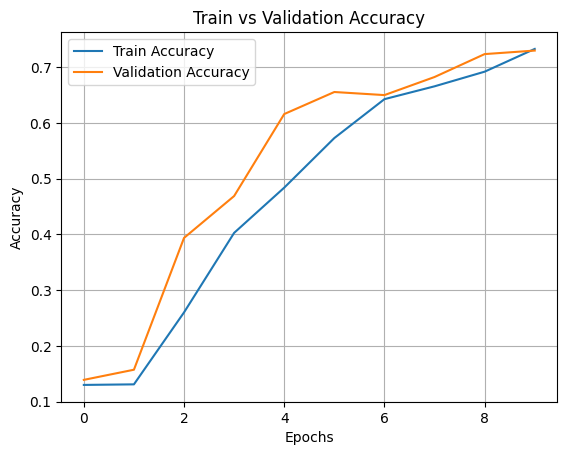

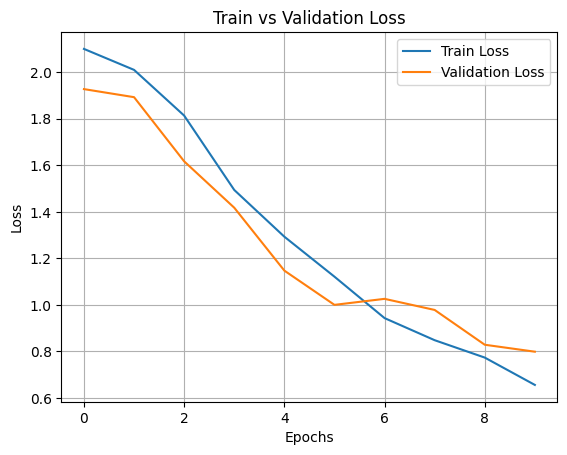

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

from tensorflow.keras.optimizers import Adam

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=Adam(learning_rate=2e-5),
              metrics=['accuracy'])


history_finetune = model.fit(
    [X_train, train_df[['has_event', 'has_date', 'has_person']]],
    y_train,
    validation_data=([X_val, val_df[['has_event', 'has_date', 'has_person']]], y_val),
    epochs=5,
    batch_size=64,
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)




Epoch 1/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.7570 - loss: 0.5983 - val_accuracy: 0.7360 - val_loss: 0.7996
Epoch 2/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.7677 - loss: 0.5483 - val_accuracy: 0.7510 - val_loss: 0.7614
Epoch 3/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.7748 - loss: 0.5457 - val_accuracy: 0.7549 - val_loss: 0.7552
Epoch 4/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.7781 - loss: 0.5395 - val_accuracy: 0.7731 - val_loss: 0.7288
Epoch 5/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.7928 - loss: 0.5125 - val_accuracy: 0.7794 - val_loss: 0.7451
Restoring model weights from the end of the best epoch: 4.


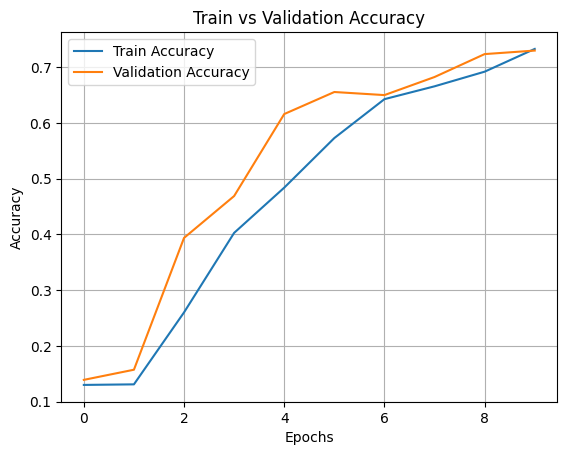

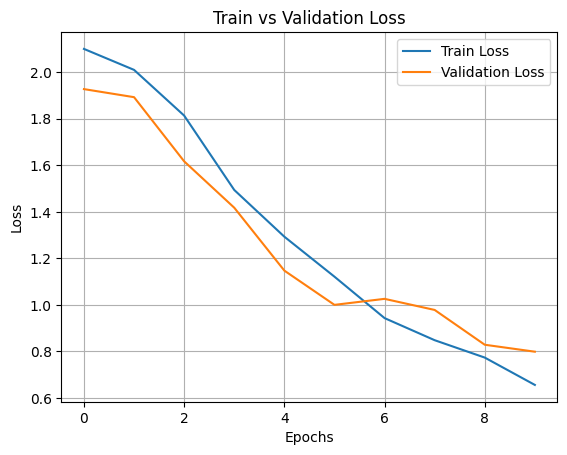

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=Adam(learning_rate=1e-5),
              metrics=['accuracy'])


history_finetune = model.fit(
    [X_train, train_df[['has_event', 'has_date', 'has_person']]],
    y_train,
    validation_data=([X_val, val_df[['has_event', 'has_date', 'has_person']]], y_val),
    epochs=5,
    batch_size=64,
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)




Epoch 1/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 97ms/step - accuracy: 0.8041 - loss: 0.5021 - val_accuracy: 0.7731 - val_loss: 0.7425
Epoch 2/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.8079 - loss: 0.4858 - val_accuracy: 0.7826 - val_loss: 0.7245
Epoch 3/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.7977 - loss: 0.5153 - val_accuracy: 0.7802 - val_loss: 0.7349
Epoch 4/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.8106 - loss: 0.4920 - val_accuracy: 0.7874 - val_loss: 0.7247
Epoch 5/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.8012 - loss: 0.4717 - val_accuracy: 0.7874 - val_loss: 0.7201
Restoring model weights from the end of the best epoch: 5.
✅ Model Fine-Tuned and Saved Successfully!


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=Adam(learning_rate=5e-6),
              metrics=['accuracy'])

history_finetune = model.fit(
    [X_train, train_df[['has_event', 'has_date', 'has_person']]],
    y_train,
    validation_data=([X_val, val_df[['has_event', 'has_date', 'has_person']]], y_val),
    epochs=3,
    batch_size=64,
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 16s 76ms/step - accuracy: 0.8245 - loss: 0.4504 - val_accuracy: 0.7866 - val_loss: 0.7039
Epoch 2/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.8195 - loss: 0.4469 - val_accuracy: 0.7874 - val_loss: 0.7009
Epoch 3/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.8325 - loss: 0.4539 - val_accuracy: 0.7905 - val_loss: 0.7085
Restoring model weights from the end of the best epoch: 2.


In [ ]:
model.save("bilstm_final_finetuned_extra.keras")
print(" Fine-Tuning Completed and Model Saved!")

 Fine-Tuning Completed and Model Saved!


In [ ]:
y_test = np.array(y_test)


test_loss, test_acc = model.evaluate(
    [X_test, test_df[['has_event', 'has_date', 'has_person']]],
    y_test
)

print(f" Final Test Accuracy: {test_acc:.4f}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7719 - loss: 0.7335
 Final Test Accuracy: 0.7915


In [ ]:
from sklearn.metrics import classification_report

y_pred = np.argmax(model.predict([X_test, test_df[['has_event', 'has_date', 'has_person']]]), axis=1)
print(classification_report(y_test, y_pred))


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       152
           1       0.73      0.78      0.75       177
           2       0.81      0.85      0.83       172
           3       0.86      0.81      0.83       343
           4       0.85      0.80      0.82       306
           5       0.26      0.56      0.36         9
           6       0.82      0.82      0.82       107

    accuracy                           0.79      1266
   macro avg       0.71      0.76      0.73      1266
weighted avg       0.80      0.79      0.79      1266



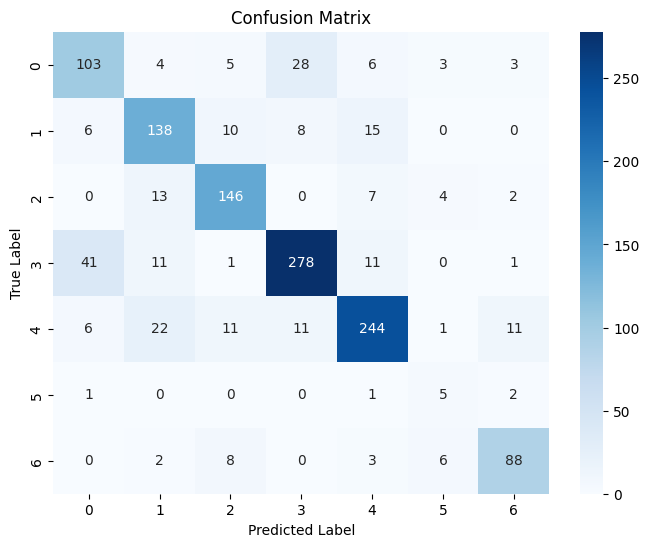

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Compute Per-Class Accuracy
class_accuracies = cm.diagonal() / cm.sum(axis=1)
misclassification_rates = 1 - class_accuracies

# Print Per-Class Performance
for i, (acc, mis) in enumerate(zip(class_accuracies, misclassification_rates)):
    print(f"Class {i}: Accuracy = {acc:.4f}, Misclassification Rate = {mis:.4f}")


Class 0: Accuracy = 0.6776, Misclassification Rate = 0.3224
Class 1: Accuracy = 0.7797, Misclassification Rate = 0.2203
Class 2: Accuracy = 0.8488, Misclassification Rate = 0.1512
Class 3: Accuracy = 0.8105, Misclassification Rate = 0.1895
Class 4: Accuracy = 0.7974, Misclassification Rate = 0.2026
Class 5: Accuracy = 0.5556, Misclassification Rate = 0.4444
Class 6: Accuracy = 0.8224, Misclassification Rate = 0.1776


In [ ]:
import numpy as np


y_pred_probs = model.predict([X_test, test_df[['has_event', 'has_date', 'has_person']]])
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels


y_test = np.array(y_test)

print("y_test Shape:", y_test.shape)  # Should be (num_samples,)
print("y_pred Shape:", y_pred.shape)  # Should be (num_samples,)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
y_test Shape: (1266,)
y_pred Shape: (1266,)


In [ ]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, y_pred_probs)
print(f"\n Log Loss: {logloss:.4f}")



 Log Loss: 0.6967



 AUC Score (One-vs-Rest): 0.9556


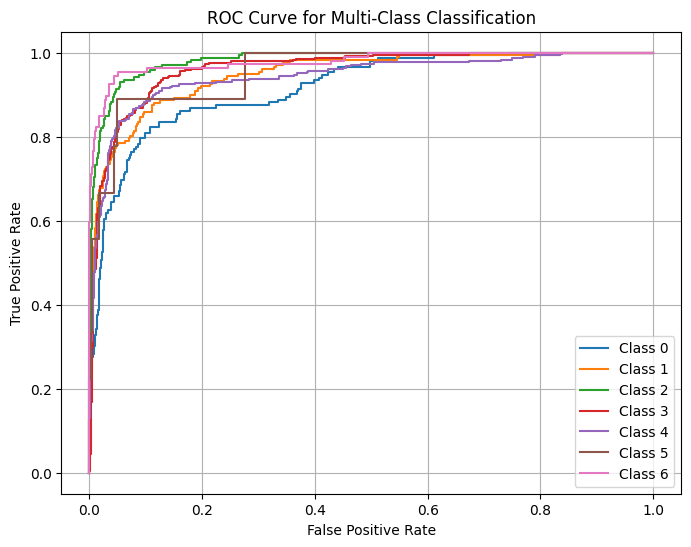

In [ ]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize


y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]


auc_score = roc_auc_score(y_test_bin, y_pred_probs, multi_class="ovr")
print(f"\n AUC Score (One-vs-Rest): {auc_score:.4f}")

from sklearn.metrics import roc_curve

plt.figure(figsize=(8,6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    plt.plot(fpr, tpr, label=f"Class {i}")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Classification")
plt.legend()
plt.grid(True)
plt.show()


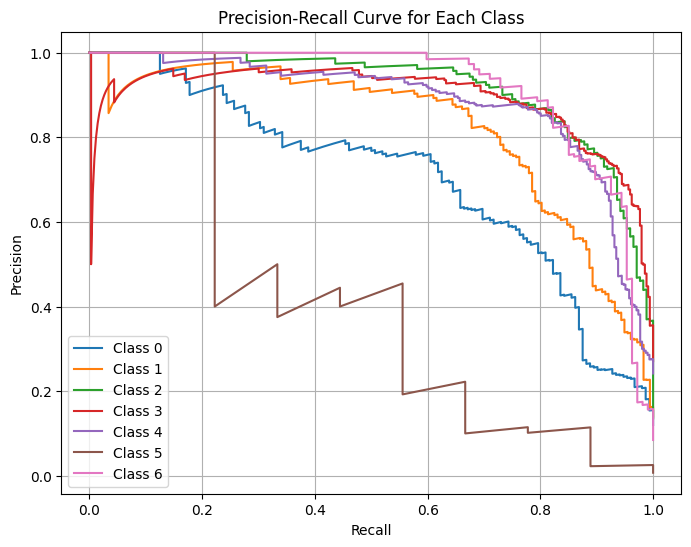

In [ ]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(8,6))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_probs[:, i])
    plt.plot(recall, precision, label=f"Class {i}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Each Class")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
misclassified_indices = np.where(y_pred != y_test)[0]


misclassified_samples = test_df.iloc[misclassified_indices].copy()
misclassified_samples["true_label"] = y_test[misclassified_indices]
misclassified_samples["predicted_label"] = y_pred[misclassified_indices]


confidence_scores = np.max(y_pred_probs, axis=1)
misclassified_samples["confidence_score"] = confidence_scores[misclassified_indices]
columns_to_display = ["petition_text", "true_label", "predicted_label", "confidence_score"]
misclassified_display = misclassified_samples[columns_to_display]

print(misclassified_display.head(10))


                                          petition_text  true_label  \
954   review statutory ratios in early years. we bel...           4   
5332  launch an independent review into future healt...           4   
7470  to allow staff working in offices within parli...           4   
4192  limit the shooting season of woodcock. ma , cp...           3   
4878  a commission to investigate the feasibility an...           1   
7812  bring back sundays being a day of rest. bring ...           0   
6711  force footballers to take a pay cut during the...           0   
6319  fund free childcare for all pre-school pupils....           1   
964   introduce fines for long phone waiting times a...           0   
5488  change the uk's airport slots regulations. in ...           3   

      predicted_label  confidence_score  
954                 1          0.640982  
5332                6          0.704638  
7470                6          0.950843  
4192                0          0.678125  
4878    

# **BILSTM OPTUNA - FIRST MODEL  IN THE REPORT**

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.5 MB/s eta 0:00:00


In [ ]:
import optuna
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Dense, Dropout, SpatialDropout1D, Embedding, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

def objective(trial):

    lstm_units = trial.suggest_categorical('lstm_units', [64, 96, 128])
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.3, 0.5)
    batch_size = trial.suggest_categorical('batch_size', [32, 64])
    learning_rate = trial.suggest_loguniform('learning_rate', 2e-5, 1e-4)


    class_weights = compute_class_weight(
        class_weight="balanced",
        classes=np.unique(train_df["petition_topic"]),
        y=train_df["petition_topic"]
    )
    class_weights_dict = {i: min(weight, 5.0) for i, weight in enumerate(class_weights)}




    def build_model():
        text_input = Input(shape=(max_length,))
        embedding_layer = Embedding(input_dim=vocab_size, output_dim=300, weights=[embedding_matrix], trainable=True)(text_input)

        bilstm = SpatialDropout1D(0.3)(embedding_layer)
        bilstm = Bidirectional(LSTM(lstm_units, return_sequences=True))(bilstm)
        bilstm = Dropout(dropout_rate)(bilstm)
        bilstm = Bidirectional(LSTM(lstm_units))(bilstm)

        cat_input = Input(shape=(3,))
        cat_dense = Dense(64, activation='relu')(cat_input)
        cat_dense = BatchNormalization()(cat_dense)
        cat_dense = Dropout(0.3)(cat_dense)

        combined = Concatenate()([bilstm, cat_dense])
        combined_dense = Dense(64, activation='relu')(combined)
        combined_dense = Dropout(0.35)(combined_dense)

        output = Dense(len(np.unique(train_df["petition_topic"])), activation='softmax')(combined_dense)
        model = Model(inputs=[text_input, cat_input], outputs=output)
        model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
        return model

    model = build_model()


    history = model.fit(
        [X_train, train_df[['has_event', 'has_date', 'has_person']]],
        y_train,
        validation_data=([X_val, val_df[['has_event', 'has_date', 'has_person']]], y_val),
        epochs=5,
        batch_size=batch_size,
        class_weight=class_weights_dict,
        verbose=0
    )

    val_accuracy = max(history.history['val_accuracy'])
    return val_accuracy
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)


print("\n Best Hyperparameters:", study.best_params)

best_params = study.best_params


[I 2025-03-16 16:46:25,182] A new study created in memory with name: no-name-3dd44770-25fd-47bc-83b1-80ab742e86c9
<ipython-input-109-d843f5d8c446>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.3, 0.5)
<ipython-input-109-d843f5d8c446>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 2e-5, 1e-4)
[I 2025-03-16 16:47:21,812] Trial 0 finished with value: 0.5944663882255554 and parameters: {'lstm_units': 128, 'dropout_rate': 0.3512892925746529, 'batch_size': 32, 'learning_rate': 4.170890956245553e-05}. Best is trial 0 with value: 0.5944663882255554.
<ipython-input-109-d843f5d8c


 Best Hyperparameters: {'lstm_units': 128, 'dropout_rate': 0.46451388063593435, 'batch_size': 32, 'learning_rate': 8.968896964197625e-05}


In [ ]:
best_lstm_units = 128
best_dropout = 0.4645
best_batch_size = 32
best_learning_rate = 8.97e-5

def build_best_model():
    text_input = Input(shape=(max_length,))
    embedding_layer = Embedding(input_dim=vocab_size, output_dim=300, weights=[embedding_matrix], trainable=True)(text_input)

    bilstm = SpatialDropout1D(0.3)(embedding_layer)
    bilstm = Bidirectional(LSTM(best_lstm_units, return_sequences=True))(bilstm)
    bilstm = Dropout(best_dropout)(bilstm)
    bilstm = Bidirectional(LSTM(best_lstm_units))(bilstm)

    cat_input = Input(shape=(3,))
    cat_dense = Dense(64, activation='relu')(cat_input)
    cat_dense = BatchNormalization()(cat_dense)
    cat_dense = Dropout(0.3)(cat_dense)

    combined = Concatenate()([bilstm, cat_dense])
    combined_dense = Dense(64, activation='relu')(combined)
    combined_dense = Dropout(0.35)(combined_dense)

    output = Dense(len(np.unique(train_df["petition_topic"])), activation='softmax')(combined_dense)

    model = Model(inputs=[text_input, cat_input], outputs=output)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=best_learning_rate), metrics=['accuracy'])

    return model


final_model = build_best_model()

history = final_model.fit(
    [X_train, train_df[['has_event', 'has_date', 'has_person']]],
    y_train,
    validation_data=([X_val, val_df[['has_event', 'has_date', 'has_person']]], y_val),
    epochs=10,
    batch_size=best_batch_size,
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)



Epoch 1/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.1153 - loss: 2.1206 - val_accuracy: 0.0854 - val_loss: 1.8987
Epoch 2/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.1476 - loss: 1.9877 - val_accuracy: 0.4379 - val_loss: 1.7483
Epoch 3/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.3162 - loss: 1.7164 - val_accuracy: 0.4379 - val_loss: 1.4314
Epoch 4/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.4570 - loss: 1.3834 - val_accuracy: 0.5913 - val_loss: 1.1395
Epoch 5/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.5791 - loss: 1.1665 - val_accuracy: 0.7028 - val_loss: 0.8846
Epoch 6/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.6743 - loss: 0.9349 - val_accuracy: 0.7344 - val_loss: 0.7995
Epoch 7/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.7367 - loss: 0.8233 - val_accuracy: 0.7502 - val_loss: 0.7598
Epoch 8/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.7812 - loss: 0.7334 - val

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=Adam(learning_rate=1e-5),
              metrics=['accuracy'])

history_finetune = model.fit(
    [X_train, train_df[['has_event', 'has_date', 'has_person']]],
    y_train,
    validation_data=([X_val, val_df[['has_event', 'has_date', 'has_person']]], y_val),
    epochs=3,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 33s 107ms/step - accuracy: 0.8256 - loss: 0.4748 - val_accuracy: 0.7913 - val_loss: 0.7086
Epoch 2/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.8342 - loss: 0.4214 - val_accuracy: 0.7905 - val_loss: 0.6906
Epoch 3/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.8482 - loss: 0.4201 - val_accuracy: 0.8024 - val_loss: 0.6769
Restoring model weights from the end of the best epoch: 3.


In [ ]:
model.save("bilstm_final_best.keras")
print(" Fine-Tuning Completed and Model Saved!")


 Fine-Tuning Completed and Model Saved!


In [ ]:
test_loss, test_acc = model.evaluate(
    [X_test, test_df[['has_event', 'has_date', 'has_person']]],
    y_test
)
print(fFinal Test Accuracy: {test_acc:.4f}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7862 - loss: 0.6988
Final Test Accuracy: 0.8025


In [ ]:
from sklearn.metrics import classification_report

y_pred_probs = model.predict([X_test, test_df[['has_event', 'has_date', 'has_person']]])
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n Classification Report:\n", classification_report(y_test, y_pred, digits=4))


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step

 Classification Report:
               precision    recall  f1-score   support

           0     0.6887    0.6842    0.6865       152
           1     0.7320    0.8023    0.7655       177
           2     0.8146    0.8430    0.8286       172
           3     0.8727    0.8192    0.8451       343
           4     0.8372    0.8235    0.8303       306
           5     0.2500    0.5556    0.3448         9
           6     0.8700    0.8131    0.8406       107

    accuracy                         0.8025      1266
   macro avg     0.7236    0.7630    0.7345      1266
weighted avg     0.8098    0.8025    0.8052      1266



40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7862 - loss: 0.6988
Test Accuracy: 0.8025
Test Loss: 0.6627

Classification Report:
               precision    recall  f1-score   support

           0     0.6887    0.6842    0.6865       152
           1     0.7320    0.8023    0.7655       177
           2     0.8146    0.8430    0.8286       172
           3     0.8727    0.8192    0.8451       343
           4     0.8372    0.8235    0.8303       306
           5     0.2500    0.5556    0.3448         9
           6     0.8700    0.8131    0.8406       107

    accuracy                         0.8025      1266
   macro avg     0.7236    0.7630    0.7345      1266
weighted avg     0.8098    0.8025    0.8052      1266



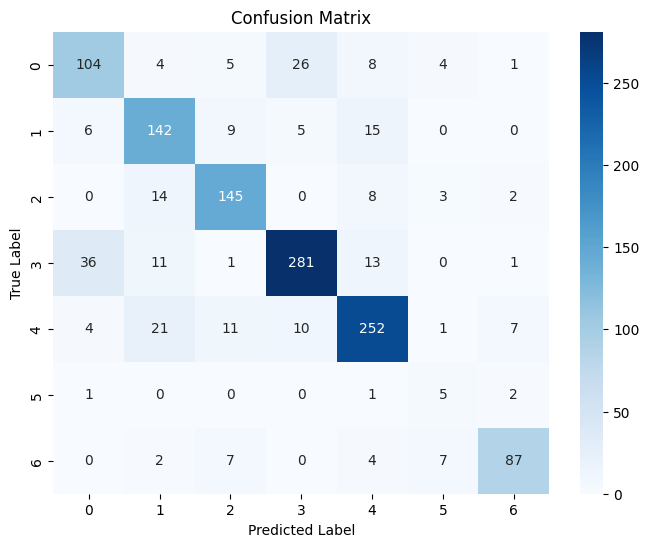

Class 0: Accuracy = 0.6842, Misclassification Rate = 0.3158
Class 1: Accuracy = 0.8023, Misclassification Rate = 0.1977
Class 2: Accuracy = 0.8430, Misclassification Rate = 0.1570
Class 3: Accuracy = 0.8192, Misclassification Rate = 0.1808
Class 4: Accuracy = 0.8235, Misclassification Rate = 0.1765
Class 5: Accuracy = 0.5556, Misclassification Rate = 0.4444
Class 6: Accuracy = 0.8131, Misclassification Rate = 0.1869
Top-3 Accuracy: 0.9581
AUC Score: 0.9588


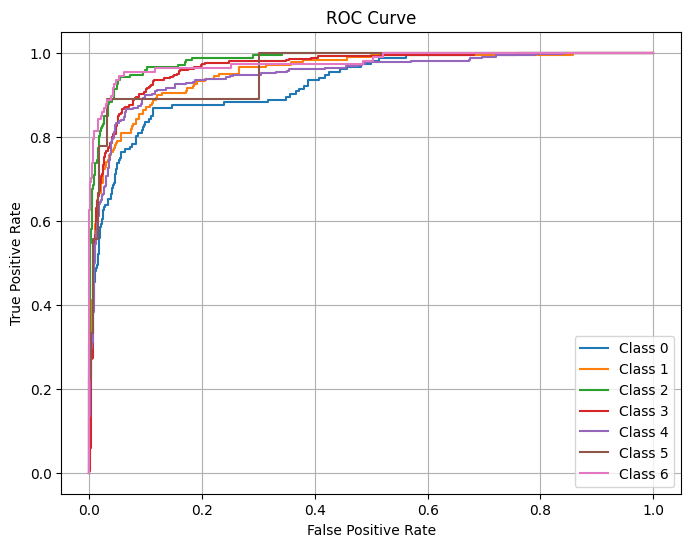

Log Loss: 0.6627


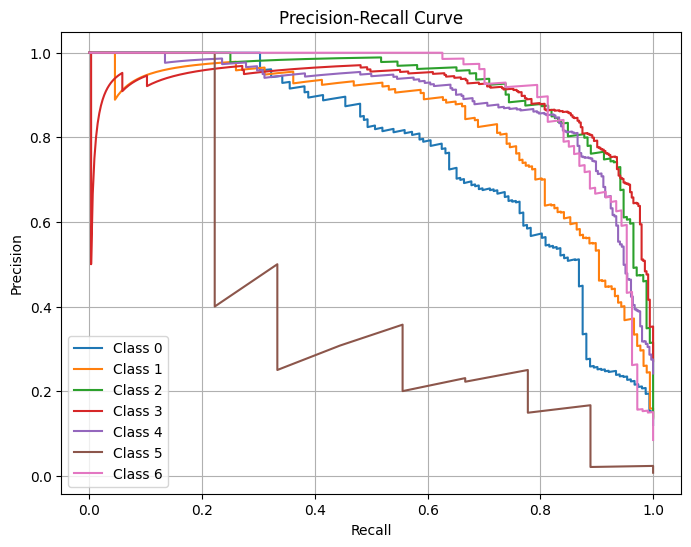

                                          petition_text  true_label  \
954   review statutory ratios in early years. we bel...           4   
7470  to allow staff working in offices within parli...           4   
4192  limit the shooting season of woodcock. ma , cp...           3   
6711  force footballers to take a pay cut during the...           0   
6319  fund free childcare for all pre-school pupils....           1   
964   introduce fines for long phone waiting times a...           0   
5488  change the uk's airport slots regulations. in ...           3   
7940  make formal examinations computer based to red...           2   
8724  only allow sale and use of fireworks on 5 nove...           3   
7473  require all hounds involved in 'trail hunts' t...           3   

      predicted_label  confidence_score  
954                 1          0.692644  
7470                6          0.899679  
4192                0          0.741808  
6711                5          0.816006  
6319    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, log_loss, precision_recall_curve
from sklearn.preprocessing import label_binarize


y_test = np.array(y_test)

y_pred_probs = model.predict([X_test, test_df[['has_event', 'has_date', 'has_person']]])
y_pred = np.argmax(y_pred_probs, axis=1)

test_loss, test_acc = model.evaluate([X_test, test_df[['has_event', 'has_date', 'has_person']]], y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

class_accuracies = cm.diagonal() / cm.sum(axis=1)
misclassification_rates = 1 - class_accuracies
for i, (acc, mis) in enumerate(zip(class_accuracies, misclassification_rates)):
    print(f"Class {i}: Accuracy = {acc:.4f}, Misclassification Rate = {mis:.4f}")


from tensorflow.keras.metrics import top_k_categorical_accuracy
def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)
y_test_one_hot = np.eye(len(np.unique(y_test)))[y_test]
top_3_acc = np.mean(top_3_accuracy(y_test_one_hot, y_pred_probs))
print(f"Top-3 Accuracy: {top_3_acc:.4f}")


y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]
auc_score = roc_auc_score(y_test_bin, y_pred_probs, multi_class="ovr")
print(f"AUC Score: {auc_score:.4f}")
plt.figure(figsize=(8,6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    plt.plot(fpr, tpr, label=f"Class {i}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


logloss = log_loss(y_test, y_pred_probs)
print(f"Log Loss: {logloss:.4f}")


plt.figure(figsize=(8,6))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_probs[:, i])
    plt.plot(recall, precision, label=f"Class {i}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()


misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_samples = test_df.iloc[misclassified_indices].copy()
misclassified_samples["true_label"] = y_test[misclassified_indices]
misclassified_samples["predicted_label"] = y_pred[misclassified_indices]
misclassified_samples["confidence_score"] = np.max(y_pred_probs, axis=1)[misclassified_indices]
columns_to_display = ["petition_text", "true_label", "predicted_label", "confidence_score"]
print(misclassified_samples[columns_to_display].head(10))


#  Hybrid CNN-BILSTM Model 1

In [ ]:
target_names = label_encoder.classes_.tolist()  # Convert to list


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, Dense, Dropout, Flatten, Embedding,
    SpatialDropout1D, Concatenate
)

def build_cnn_entity_model(vocab_size, max_length, embedding_matrix, embedding_dim=300):
    # Text Input (CNN)**
    text_input = Input(shape=(max_length,), name="text_input")
    text_embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix],
                               input_length=max_length, trainable=True)(text_input)
    text_embedding = SpatialDropout1D(0.3)(text_embedding)

    # CNN Layers for Text Processing
    cnn = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(text_embedding)
    cnn = MaxPooling1D(pool_size=2)(cnn)
    cnn = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(cnn)
    cnn = MaxPooling1D(pool_size=2)(cnn)
    cnn = Flatten()(cnn)

    # Entity Features Input (Dense)**
    entity_input = Input(shape=(3,), name="entity_input")  # 3 Binary Features (has_event, has_date, has_person)
    entity_dense = Dense(16, activation='relu')(entity_input)

    # Merge Text + Entity Features**
    merged = Concatenate()([cnn, entity_dense])

    # Fully Connected Layers**
    dense = Dense(128, activation='relu')(merged)
    dense = Dropout(0.3)(dense)
    dense = Dense(64, activation='relu')(dense)
    dense = Dropout(0.4)(dense)

    # Output Layer for Classification**
    output = Dense(len(target_names), activation='softmax')(dense)

    # Define Model with Two Inputs**
    model = Model(inputs=[text_input, entity_input], outputs=output)

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
                  metrics=['accuracy'])

    return model

# Build the Model
model = build_cnn_entity_model(vocab_size, max_length, embedding_matrix)
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)   │ (None, 219)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, 219, 300)       │      5,502,000 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ spatial_dropout1d_3       │ (None, 219, 300)       │              0 │ embedding_3[0][0]      │
│ (SpatialDropout1D)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_6 (Conv1D)         │ (None, 219, 128)       │        115,328 │ spatial_dropout1d_3[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_6           │ (None, 109, 128)       │              0 │ conv1d_6[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_7 (Conv1D)         │ (None, 109, 128)       │         49,280 │ max_pooling1d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_7           │ (None, 54, 128)        │              0 │ conv1d_7[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ entity_input (InputLayer) │ (None, 3)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 6912)           │              0 │ max_pooling1d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 16)             │             64 │ entity_input[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 6928)           │              0 │ flatten_3[0][0],       │
│ (Concatenate)             │                        │                │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 128)            │        886,912 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 128)            │              0 │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 64)             │          8,256 │ dropout_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 64)             │              0 │ dense_11[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 7)              │            455 │ dropout_7[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 6,562,295 (25.03 MB)

 Trainable params: 6,562,295 (25.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define Text Input (Preprocessed & Tokenized)
X_train_text = X_train  # Tokenized text sequences (from tokenizer)
X_val_text = X_val
X_test_text = X_test

# Define Entity Input (Structured Features)
X_train_entities = train_df[['has_event', 'has_date', 'has_person']].values
X_val_entities = val_df[['has_event', 'has_date', 'has_person']].values
X_test_entities = test_df[['has_event', 'has_date', 'has_person']].values

# Define Target Labels (Petition Topics)
y_train = train_df["petition_topic"].values
y_val = val_df["petition_topic"].values
y_test = test_df["petition_topic"].values


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    [X_train_text, X_train_entities], y_train,  # Two input sources
    validation_data=([X_val_text, X_val_entities], y_val),
    epochs=15,
    batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 54s 273ms/step - accuracy: 0.2193 - loss: 1.8434 - val_accuracy: 0.2957 - val_loss: 1.7562
Epoch 2/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 78s 252ms/step - accuracy: 0.2690 - loss: 1.7711 - val_accuracy: 0.2893 - val_loss: 1.7417
Epoch 3/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 80s 241ms/step - accuracy: 0.2860 - loss: 1.7530 - val_accuracy: 0.3684 - val_loss: 1.7084
Epoch 4/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 83s 245ms/step - accuracy: 0.3334 - loss: 1.7170 - val_accuracy: 0.4324 - val_loss: 1.5600
Epoch 5/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 83s 252ms/step - accuracy: 0.4268 - loss: 1.5471 - val_accuracy: 0.4648 - val_loss: 1.4075
Epoch 6/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 84s 263ms/step - accuracy: 0.4605 - loss: 1.4042 - val_accuracy: 0.4909 - val_loss: 1.2722
Epoch 7/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 80s 254ms/step - accuracy: 0.5167 - loss: 1.2767 - val_accuracy: 0.6071 - val_loss: 1.1420
Epoch 8/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 82s 257ms/step - accuracy: 0.5389 - loss: 1

In [ ]:
from sklearn.metrics import accuracy_score

# Compute Test Accuracy
test_acc = accuracy_score(y_test, np.argmax(model.predict([X_test_text, X_test_entities]), axis=1))

# Print Test Accuracy
print(f"\nFinal Test Accuracy: {test_acc:.4f}")




40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step

Final Test Accuracy: 0.8539


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, np.argmax(model.predict([X_test_text, X_test_entities]), axis=1))

# Compute Misclassification Rates Per Class
total_samples_per_class = conf_matrix.sum(axis=1)  # Total petitions per class
misclassified_per_class = total_samples_per_class - np.diag(conf_matrix)  # Misclassified samples
misclassification_rate = (misclassified_per_class / total_samples_per_class) * 100

# Print Misclassification Rates
print("\n🔹 Class-Wise Misclassification Rates:")
for i, class_name in enumerate(target_names):
    print(f"{class_name}: {misclassification_rate[i]:.2f}% misclassified")

# Save misclassification rates to CSV
misclassification_df = pd.DataFrame({"Class": target_names, "Misclassification Rate (%)": misclassification_rate})
misclassification_df.to_csv("misclassification_rates.csv", index=False)

print(" Misclassification rates saved!")


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step

🔹 Class-Wise Misclassification Rates:
0: 18.42% misclassified
1: 19.77% misclassified
2: 8.72% misclassified
3: 4.96% misclassified
4: 20.59% misclassified
5: 100.00% misclassified
6: 16.82% misclassified
 Misclassification rates saved!


In [ ]:
from sklearn.metrics import balanced_accuracy_score

# Compute Balanced Accuracy (handles class imbalance)
balanced_acc = balanced_accuracy_score(y_test, np.argmax(model.predict([X_test_text, X_test_entities]), axis=1))

# Print Balanced Accuracy
print(f"\n🔹 Balanced Accuracy: {balanced_acc:.4f}")

# Save to Accuracy File
with open("accuracy_scores.txt", "a") as f:
    f.write(f"Balanced Accuracy: {balanced_acc:.4f}\n")

print("Balanced accuracy saved!")

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step

🔹 Balanced Accuracy: 0.7296
Balanced accuracy saved!


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Compute Precision, Recall, and F1-Score for each class
precision, recall, f1, _ = precision_recall_fscore_support(y_test, np.argmax(model.predict([X_test_text, X_test_entities]), axis=1), average=None)

# Compute Macro and Weighted Scores
macro_f1 = f1.mean()  # Macro F1 (treats all classes equally)
weighted_f1 = np.sum(f1 * (total_samples_per_class / np.sum(total_samples_per_class)))  # Weighted F1

# Print results
print("\n🔹 Per-Class Precision, Recall, and F1-Score:")
for i, class_name in enumerate(target_names):
    print(f"{class_name}: Precision: {precision[i]:.4f}, Recall: {recall[i]:.4f}, F1-Score: {f1[i]:.4f}")

print(f"\n🔹 Macro F1-Score: {macro_f1:.4f}")
print(f"🔹 Weighted F1-Score: {weighted_f1:.4f}")

# Save Performance Metrics
metrics_df = pd.DataFrame({
    "Class": target_names,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
})
metrics_df.to_csv("performance_metrics.csv", index=False)




40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step

🔹 Per-Class Precision, Recall, and F1-Score:
0: Precision: 0.8493, Recall: 0.8158, F1-Score: 0.8322
1: Precision: 0.7676, Recall: 0.8023, F1-Score: 0.7845
2: Precision: 0.8351, Recall: 0.9128, F1-Score: 0.8722
3: Precision: 0.8956, Recall: 0.9504, F1-Score: 0.9222
4: Precision: 0.8741, Recall: 0.7941, F1-Score: 0.8322
5: Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000
6: Precision: 0.8476, Recall: 0.8318, F1-Score: 0.8396

🔹 Macro F1-Score: 0.7261
🔹 Weighted F1-Score: 0.8501


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import roc_auc_score
from tensorflow.keras.utils import to_categorical

# Convert y_test to One-Hot Encoding for Multi-Class AUC computation
y_test_one_hot = to_categorical(y_test, num_classes=len(target_names))

# Compute AUC-ROC Score
auc_roc = roc_auc_score(y_test_one_hot, model.predict([X_test_text, X_test_entities]), average="macro")

# Print and Save
print(f"\n🔹 AUC-ROC Score: {auc_roc:.4f}")

with open("performance_scores.txt", "a") as f:
    f.write(f"AUC-ROC Score: {auc_roc:.4f}\n")

print("✅ AUC-ROC score saved!")


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step

🔹 AUC-ROC Score: 0.9562
✅ AUC-ROC score saved!


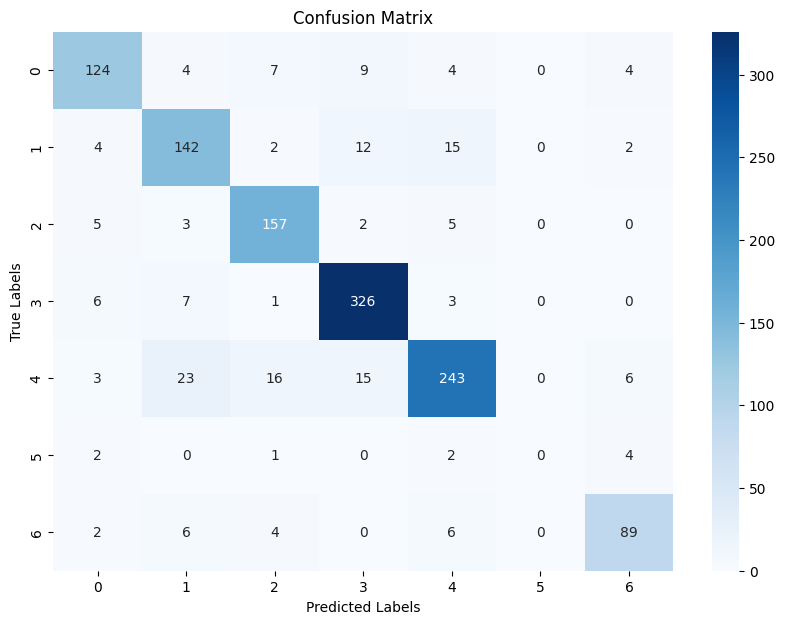

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()


# HYBRID CNN BILSTM MODEL 2 - fine tunning

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout, Flatten, Embedding,
    SpatialDropout1D, Concatenate
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

# Define Focal Loss
def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_true = tf.one_hot(tf.cast(y_true, tf.int32), depth=len(target_names))
        y_true = tf.cast(y_true, tf.float32)
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1.0 - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred)
        weight = tf.pow(1 - y_pred, gamma)
        focal_loss = alpha * weight * cross_entropy
        return tf.reduce_sum(focal_loss, axis=-1)
    return loss

# Define CNN + BiLSTM Model
def build_cnn_bilstm_model(vocab_size, max_length, embedding_matrix, embedding_dim=300):
    #  **Text Input (CNN + BiLSTM)**
    text_input = Input(shape=(max_length,), name="text_input")
    text_embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                               weights=[embedding_matrix], input_length=max_length, trainable=True)(text_input)
    text_embedding = SpatialDropout1D(0.3)(text_embedding)

    # CNN Layers (Feature Extraction)
    cnn = Conv1D(filters=256, kernel_size=3, activation='relu', padding='same')(text_embedding)  # Increased filters
    cnn = MaxPooling1D(pool_size=2)(cnn)
    cnn = Conv1D(filters=256, kernel_size=3, activation='relu', padding='same')(cnn)
    cnn = MaxPooling1D(pool_size=2)(cnn)

    # BiLSTM for Long-Term Dependencies
    lstm = Bidirectional(LSTM(128, return_sequences=False))(cnn)

    #  **Entity Feature Input (Structured Features)**
    entity_input = Input(shape=(3,), name="entity_input")  # Binary Features (has_event, has_date, has_person)
    entity_dense = Dense(16, activation='relu')(entity_input)

    # **Merge CNN + BiLSTM + Entity Features**
    merged = Concatenate()([lstm, entity_dense])

    #  **Fully Connected Layers**
    dense = Dense(128, activation='relu')(merged)
    dense = Dropout(0.4)(dense)  # Slightly higher dropout
    dense = Dense(64, activation='relu')(dense)
    dense = Dropout(0.4)(dense)

    # **Output Layer**
    output = Dense(len(target_names), activation='softmax')(dense)

    #  **Define Model**
    model = Model(inputs=[text_input, entity_input], outputs=output)

    model.compile(loss=focal_loss(alpha=0.25, gamma=2.0),  # Use Focal Loss
                  optimizer=Adam(learning_rate=2e-5),  # Lower learning rate for stable updates
                  metrics=['accuracy'])

    return model

#  Build the Model
model = build_cnn_bilstm_model(vocab_size, max_length, embedding_matrix)
model.summary()

# Define Inputs for Training
X_train_text = X_train  # Tokenized text input
X_train_entities = train_df[['has_event', 'has_date', 'has_person']].values

X_val_text = X_val
X_val_entities = val_df[['has_event', 'has_date', 'has_person']].values

X_test_text = X_test
X_test_entities = test_df[['has_event', 'has_date', 'has_person']].values

# Define Target Labels
y_train = train_df["petition_topic"].values
y_val = val_df["petition_topic"].values
y_test = test_df["petition_topic"].values

# Define Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Step 1: Train with Frozen Embeddings First
print("\n Training with Frozen Embeddings First...")
model.layers[1].trainable = False  # Freeze embeddings initially

history = model.fit(
    [X_train_text, X_train_entities], y_train,
    validation_data=([X_val_text, X_val_entities], y_val),
    epochs=5, batch_size=32, callbacks=[early_stopping]
)

#  Step 2: Unfreeze Embeddings and Continue Training
print("\n Unfreezing Embeddings and Continuing Training...")
model.layers[1].trainable = True  # Unfreeze embeddings for fine-tuning

history = model.fit(
    [X_train_text, X_train_entities], y_train,
    validation_data=([X_val_text, X_val_entities], y_val),
    epochs=10, batch_size=32, callbacks=[early_stopping]
)

# Evaluate Model
print("\n Evaluating Final Model on Test Set...")
test_acc = accuracy_score(y_test, np.argmax(model.predict([X_test_text, X_test_entities]), axis=1))
print(f"\nFinal Test Accuracy: {test_acc:.4f}")

# Save the Model
model.save("final_cnn_bilstm_focal_loss.h5")
print(" Model saved successfully!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)   │ (None, 219)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, 219, 300)       │      5,502,000 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ spatial_dropout1d_4       │ (None, 219, 300)       │              0 │ embedding_4[0][0]      │
│ (SpatialDropout1D)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_8 (Conv1D)         │ (None, 219, 256)       │        230,656 │ spatial_dropout1d_4[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_8           │ (None, 109, 256)       │              0 │ conv1d_8[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_9 (Conv1D)         │ (None, 109, 256)       │        196,864 │ max_pooling1d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_9           │ (None, 54, 256)        │              0 │ conv1d_9[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ entity_input (InputLayer) │ (None, 3)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 256)            │        394,240 │ max_pooling1d_9[0][0]  │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 16)             │             64 │ entity_input[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 272)            │              0 │ bidirectional[0][0],   │
│ (Concatenate)             │                        │                │ dense_13[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 128)            │         34,944 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_8 (Dropout)       │ (None, 128)            │              0 │ dense_14[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 64)             │          8,256 │ dropout_8[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 64)             │              0 │ dense_15[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 7)              │            455 │ dropout_9[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 6,367,479 (24.29 MB)

 Trainable params: 6,367,479 (24.29 MB)

 Non-trainable params: 0 (0.00 B)


 Training with Frozen Embeddings First...
Epoch 1/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 130s 617ms/step - accuracy: 0.2064 - loss: 0.3501 - val_accuracy: 0.2711 - val_loss: 0.3210
Epoch 2/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 137s 589ms/step - accuracy: 0.2567 - loss: 0.3229 - val_accuracy: 0.2798 - val_loss: 0.3074
Epoch 3/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 112s 608ms/step - accuracy: 0.2667 - loss: 0.3187 - val_accuracy: 0.3526 - val_loss: 0.3000
Epoch 4/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 139s 588ms/step - accuracy: 0.3030 - loss: 0.3071 - val_accuracy: 0.4221 - val_loss: 0.2816
Epoch 5/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 150s 632ms/step - accuracy: 0.3647 - loss: 0.2823 - val_accuracy: 0.4451 - val_loss: 0.2516

 Unfreezing Embeddings and Continuing Training...
Epoch 1/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 111s 602ms/step - accuracy: 0.3944 - loss: 0.2682 - val_accuracy: 0.4458 - val_loss: 0.2420
Epoch 2/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 138s 580ms/step - accuracy: 0.4081 - loss: 0.2582 - val_accuracy: 0.4514 - val_


Final Test Accuracy: 0.5711
 Model saved successfully!


In [ ]:
from sklearn.metrics import accuracy_score

# Compute Test Accuracy
test_acc = accuracy_score(y_test, np.argmax(model.predict([X_test_text, X_test_entities]), axis=1))

# Print Test Accuracy
print(f"\n🔹 Final Test Accuracy: {test_acc:.4f}")



40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 248ms/step

🔹 Final Test Accuracy: 0.5711


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, np.argmax(model.predict([X_test_text, X_test_entities]), axis=1))

# Compute Misclassification Rates Per Class
total_samples_per_class = conf_matrix.sum(axis=1)  # Total petitions per class
misclassified_per_class = total_samples_per_class - np.diag(conf_matrix)  # Misclassified samples
misclassification_rate = (misclassified_per_class / total_samples_per_class) * 100

# Print Misclassification Rates
print("\n🔹 Class-Wise Misclassification Rates:")
for i, class_name in enumerate(target_names):
    print(f"{class_name}: {misclassification_rate[i]:.2f}% misclassified")




40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 237ms/step

🔹 Class-Wise Misclassification Rates:
0: 52.63% misclassified
1: 71.19% misclassified
2: 76.16% misclassified
3: 16.62% misclassified
4: 10.78% misclassified
5: 100.00% misclassified
6: 100.00% misclassified


In [ ]:
from sklearn.metrics import balanced_accuracy_score

# Compute Balanced Accuracy (handles class imbalance)
balanced_acc = balanced_accuracy_score(y_test, np.argmax(model.predict([X_test_text, X_test_entities]), axis=1))

# Print Balanced Accuracy
print(f"\n🔹 Balanced Accuracy: {balanced_acc:.4f}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 215ms/step

🔹 Balanced Accuracy: 0.3895


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Compute Precision, Recall, and F1-Score for each class
precision, recall, f1, _ = precision_recall_fscore_support(y_test, np.argmax(model.predict([X_test_text, X_test_entities]), axis=1), average=None)

# Compute Macro and Weighted Scores
macro_f1 = f1.mean()  # Macro F1 (treats all classes equally)
weighted_f1 = np.sum(f1 * (total_samples_per_class / np.sum(total_samples_per_class)))  # Weighted F1

# Print results
print("\n🔹 Per-Class Precision, Recall, and F1-Score:")
for i, class_name in enumerate(target_names):
    print(f"{class_name}: Precision: {precision[i]:.4f}, Recall: {recall[i]:.4f}, F1-Score: {f1[i]:.4f}")

print(f"\n🔹 Macro F1-Score: {macro_f1:.4f}")
print(f"🔹 Weighted F1-Score: {weighted_f1:.4f}")

# Save Performance Metrics
metrics_df = pd.DataFrame({
    "Class": target_names,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
})
metrics_df.to_csv("performance_metrics.csv", index=False)



40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 268ms/step

🔹 Per-Class Precision, Recall, and F1-Score:
0: Precision: 0.5714, Recall: 0.4737, F1-Score: 0.5180
1: Precision: 0.4679, Recall: 0.2881, F1-Score: 0.3566
2: Precision: 0.8542, Recall: 0.2384, F1-Score: 0.3727
3: Precision: 0.8693, Recall: 0.8338, F1-Score: 0.8512
4: Precision: 0.4174, Recall: 0.8922, F1-Score: 0.5687
5: Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000
6: Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

🔹 Macro F1-Score: 0.3810
🔹 Weighted F1-Score: 0.5308


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import roc_auc_score
from tensorflow.keras.utils import to_categorical

# Convert y_test to One-Hot Encoding for Multi-Class AUC computation
y_test_one_hot = to_categorical(y_test, num_classes=len(target_names))

# Compute AUC-ROC Score
auc_roc = roc_auc_score(y_test_one_hot, model.predict([X_test_text, X_test_entities]), average="macro")

# Print and Save
print(f"\n🔹 AUC-ROC Score: {auc_roc:.4f}")




40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step

🔹 AUC-ROC Score: 0.8667


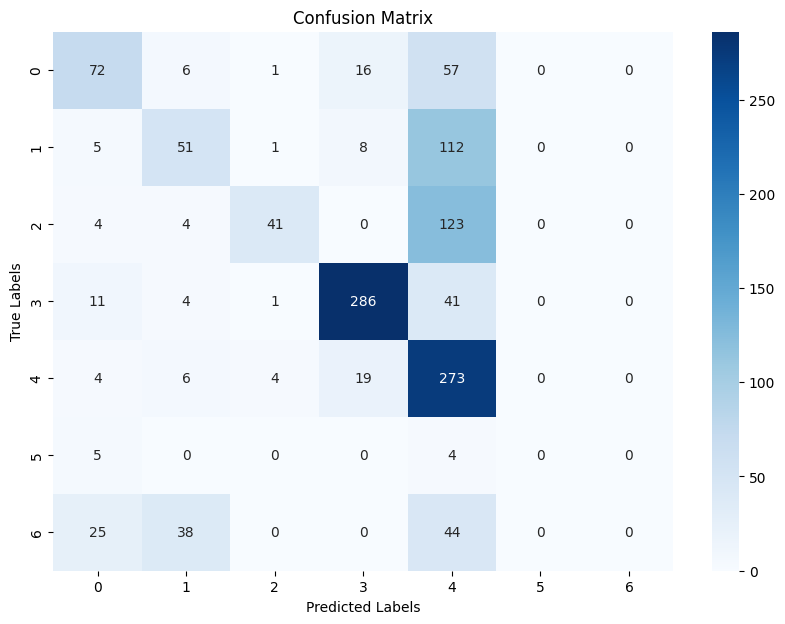

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()


# Task 2 ⚛



# More EDA for task 2 to select important features

In [ ]:
df_taskB = df_pre_split.copy()
print(df_taskB.columns)

Index(['petition_ID', 'has_entity', 'relevant_department',
       'deviation_across_regions', 'petition_status', 'petition_topic',
       'petition_importance', 'petition_text', 'text_length', 'word_count'],
      dtype='object')


In [ ]:
from pydoc import describe
df_taskB.info()
df_taskB.isnull().sum()
df_taskB["deviation_across_regions"].describe()

<class 'pandas.core.frame.DataFrame'>
Index: 8436 entries, 0 to 8897
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   petition_ID               8436 non-null   int64  
 1   has_entity                8436 non-null   object 
 2   relevant_department       6660 non-null   object 
 3   deviation_across_regions  6874 non-null   float64
 4   petition_status           8436 non-null   object 
 5   petition_topic            8436 non-null   object 
 6   petition_importance       20 non-null     object 
 7   petition_text             8436 non-null   object 
 8   text_length               8436 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 659.1+ KB


count    6874.000000
mean        0.002934
std         0.020253
min         0.000000
25%         0.000054
50%         0.000131
75%         0.000564
max         1.033035
Name: deviation_across_regions, dtype: float64

In [ ]:
categorical_columns = ["has_entity", "petition_status", "petition_importance" , "relevant_department"]

for col in categorical_columns:
    print(f"\n### Unique values and their counts for column '{col}' ###")
    print(df_taskB[col].value_counts())



### Unique values and their counts for column 'has_entity' ###
has_entity
EVENT:NO_DATE:NO_PERSON:NO_       3976
EVENT:NO_DATE:YES_PERSON:NO_      2841
EVENT:NO_DATE:NO_PERSON:YES_       776
EVENT:NO_DATE:YES_PERSON:YES_      690
EVENT:YES_DATE:YES_PERSON:NO_       72
EVENT:YES_DATE:NO_PERSON:NO_        51
EVENT:YES_DATE:YES_PERSON:YES_      22
EVENT:YES_DATE:NO_PERSON:YES_        8
Name: count, dtype: int64

### Unique values and their counts for column 'petition_status' ###
petition_status
unsuccessful           6368
rejected               1562
successful_response     389
successful_debated      117
Name: count, dtype: int64

### Unique values and their counts for column 'petition_importance' ###
petition_importance
important        11
not_important     9
Name: count, dtype: int64

### Unique values and their counts for column 'relevant_department' ###
relevant_department
department of health and social care                       1338
department for environment, food and rural affai

In [ ]:
df_filtered = df_pre_split[df_taskB['petition_importance'].notnull()]
display(df_filtered.head(20))

petition_ID                     has_entity  \
0        607158    EVENT:NO_DATE:NO_PERSON:NO_   
1        590629   EVENT:NO_DATE:YES_PERSON:NO_   
2        652724    EVENT:NO_DATE:NO_PERSON:NO_   
3        629281    EVENT:NO_DATE:NO_PERSON:NO_   
4        301747    EVENT:NO_DATE:NO_PERSON:NO_   
5        636123   EVENT:NO_DATE:YES_PERSON:NO_   
6        651267  EVENT:NO_DATE:YES_PERSON:YES_   
7        637324   EVENT:NO_DATE:YES_PERSON:NO_   
8        319460   EVENT:NO_DATE:NO_PERSON:YES_   
9        611907    EVENT:NO_DATE:NO_PERSON:NO_   
10       561733    EVENT:NO_DATE:NO_PERSON:NO_   
11       643133    EVENT:NO_DATE:NO_PERSON:NO_   
12       632406    EVENT:NO_DATE:NO_PERSON:NO_   
13       636879    EVENT:NO_DATE:NO_PERSON:NO_   
14       319388   EVENT:NO_DATE:YES_PERSON:NO_   
15       309592    EVENT:NO_DATE:NO_PERSON:NO_   
16       621997    EVENT:NO_DATE:NO_PERSON:NO_   
17       633148   EVENT:NO_DATE:YES_PERSON:NO_   
18       593313    EVENT:NO_DATE:NO_PERSON:NO_   
19       312552  EVENT:NO_DATE:YES_PERSON:YES_   

                                  relevant_department  \
0                            department for education   
1                department of health and social care   
2                department of health and social care   
3                                         hm treasury   
4                                                 NaN   
5                            department for education   
6                            department for education   
7                            department for education   
8             department for culture, media and sport   
9   department for business, energy and industrial...   
10                                        hm treasury   
11  department for environment, food and rural aff...   
12               department of health and social care   
13  department for environment, food and rural aff...   
14                           department for transport   
15                                                NaN   
16                           department for transport   
17        department for energy security and net zero   
18  department for environment, food and rural aff...   
19                                                NaN   

    deviation_across_regions petition_status                  petition_topic  \
0                   0.000137    unsuccessful                       education   
1                   0.002133    unsuccessful    uk government and devolution   
2                   0.000272    unsuccessful          health and social care   
3                   0.000083    unsuccessful     economy, labour and welfare   
4                        NaN        rejected        culture, sport and media   
5                   0.000206    unsuccessful                       education   
6                   0.000034    unsuccessful                       education   
7                   0.000013    unsuccessful                       education   
8                   0.000034    unsuccessful        culture, sport and media   
9                   0.000197    unsuccessful  environment and animal welfare   
10                  0.000083    unsuccessful     economy, labour and welfare   
11                  0.000078    unsuccessful  environment and animal welfare   
12                  0.001537    unsuccessful    uk government and devolution   
13                  0.000022    unsuccessful  environment and animal welfare   
14                  0.000138    unsuccessful  environment and animal welfare   
15                       NaN        rejected    uk government and devolution   
16                  0.000030    unsuccessful  environment and animal welfare   
17                  0.000200    unsuccessful  environment and animal welfare   
18                  0.002396    unsuccessful  environment and animal welfare   
19                       NaN        rejected        culture, sport and media   

   petition_importance                                      petition_text 

In [ ]:
# Calculate the mean deviation for each petition status within the first 20 labeled rows
mean_deviation_by_status = df_filtered.groupby("petition_status")["deviation_across_regions"].mean()

print("Mean Deviation Across Regions by Petition Status (First 20 Rows)")
print(mean_deviation_by_status)


Mean Deviation Across Regions by Petition Status (First 20 Rows)
petition_status
rejected             NaN
unsuccessful    0.000447
Name: deviation_across_regions, dtype: float64


In [ ]:
# Calculate statistics (mean, min, max, median, standard deviation) for deviation across each petition status
deviation_stats_by_status = df_taskB.groupby("petition_status")["deviation_across_regions"].agg(["mean", "min", "max", "median", "std"])

print("### Deviation Statistics Across Regions by Petition Status (Entire Dataset) ###")
print(deviation_stats_by_status)


### Deviation Statistics Across Regions by Petition Status (Entire Dataset) ###
                         mean       min       max    median       std
petition_status                                                      
rejected                  NaN       NaN       NaN       NaN       NaN
successful_debated   0.084149  0.004454  1.033035  0.050358  0.119419
successful_response  0.017535  0.001293  0.370188  0.009406  0.025573
unsuccessful         0.000550  0.000000  0.060383  0.000114  0.001788


The **mean deviation values** show that **successful debated petitions** have higher deviation (`0.084149`), meaning **regional petitions can still be important**. Meanwhile, **unsuccessful petitions have the lowest deviation (`0.000550`)**, indicating **some petitions had national support but still failed**. This proves that **low deviation does not always mean importance, and high deviation does not always mean irrelevance**—it depends on **petition content and political traction**. Therefore, **deviation alone is not a direct predictor of importance** and should be analyzed **alongside petition status and text** for better insights.

In [ ]:
# Count the number of petitions per topic for each petition status
petition_counts_by_topic_status = df_taskB.groupby(["petition_topic", "petition_status"]).size().unstack(fill_value=0)

# Calculate the mean deviation for each petition status within each topic
mean_deviation_by_topic_status = df_taskB.groupby(["petition_topic", "petition_status"])["deviation_across_regions"].mean().unstack(fill_value=0)

print("### Number of Petitions per Topic and Status ###")
print(petition_counts_by_topic_status)

print("\n### Mean Deviation Across Regions per Topic and Status ###")
print(mean_deviation_by_topic_status)


### Number of Petitions per Topic and Status ###
petition_status                 rejected  successful_debated  \
petition_topic                                                 
culture, sport and media             250                  10   
economy, labour and welfare          220                  12   
education                            215                  15   
environment and animal welfare       381                  39   
health and social care               272                  28   
london                                27                   2   
uk government and devolution         197                  11   

petition_status                 successful_response  unsuccessful  
petition_topic                                                     
culture, sport and media                         35           715  
economy, labour and welfare                      44           905  
education                                        44           874  
environment and animal welfare    

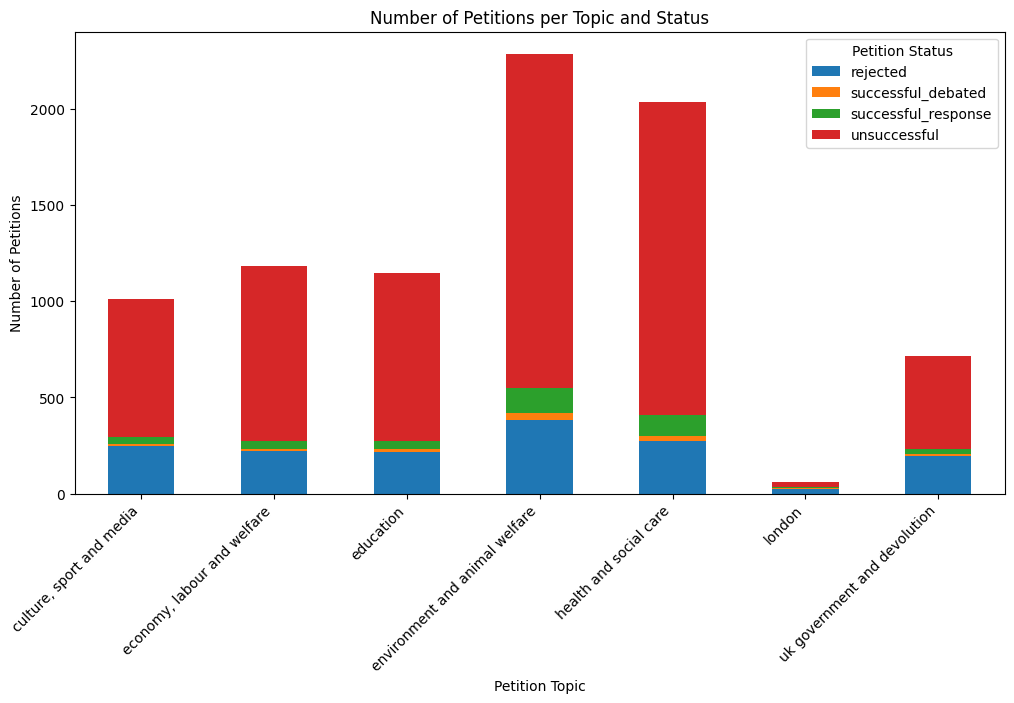

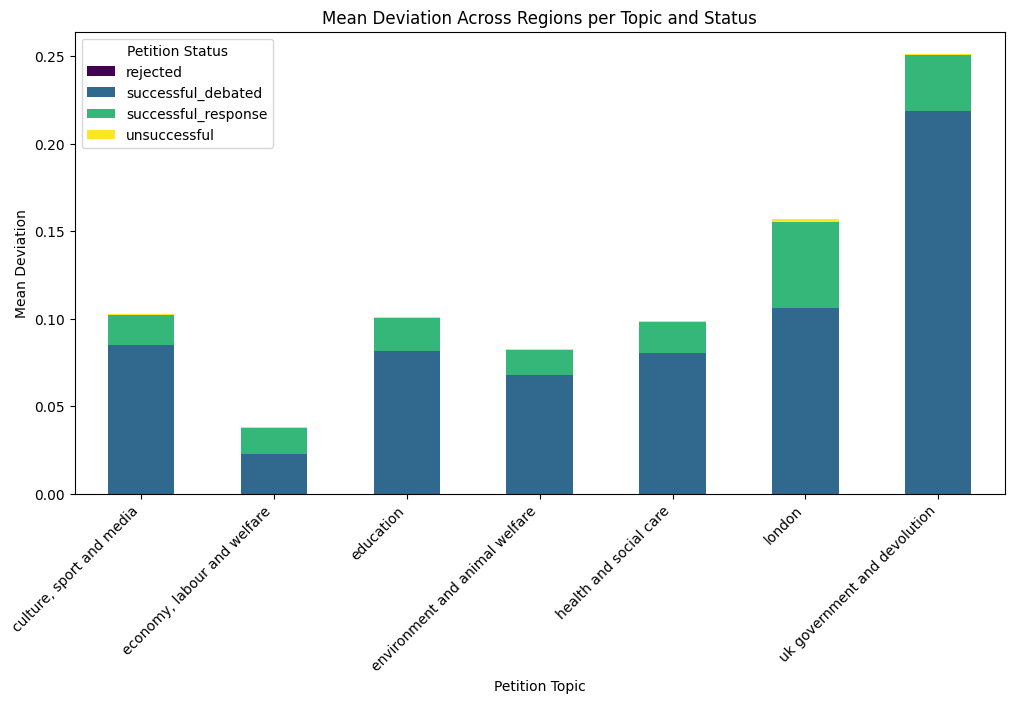

In [ ]:
import matplotlib.pyplot as plt


petition_counts_by_topic_status.plot(kind="bar", figsize=(12, 6), stacked=True)
plt.title("Number of Petitions per Topic and Status")
plt.xlabel("Petition Topic")
plt.ylabel("Number of Petitions")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Petition Status")
plt.show()

mean_deviation_by_topic_status.plot(kind="bar", figsize=(12, 6), stacked=True, colormap="viridis")
plt.title("Mean Deviation Across Regions per Topic and Status")
plt.xlabel("Petition Topic")
plt.ylabel("Mean Deviation")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Petition Status")
plt.show()


Most petitions fall under "environment and animal welfare" and "health and social care," but the majority are unsuccessful.

    Example: "environment and animal welfare" has 39 debated but 1734 unsuccessful petitions, showing many fail despite public interest.
Debated petitions often have higher deviation, meaning regional issues can still gain national attention.

    Example: "uk government and devolution" has the highest debated deviation (0.218373), showing regional political issues are sometimes debated.
Unsuccessful petitions have the lowest deviation (~0.0004 - 0.0006), meaning many had national support but still failed.

    This suggests nationwide support alone does not guarantee success—other factors like policy relevance matter.
London-based petitions rarely succeed (only 2 debated), but when they do, they have high deviation (0.105883).

    This means some city-based issues become significant enough for debate, but most do not gain traction.

# Creating the data frame for the prototype

20 samples from each status was collected to get labeled (besides the first 20 rows that were already labeled).

In [ ]:
sample_success_debated = df_taskB[df_taskB['petition_status'] == 'successful_debated'].sample(15, random_state=0)
sample_success_response = df_taskB[df_taskB['petition_status'] == 'successful_response'].sample(15, random_state=0)
sample_unsuccessful = df_taskB[df_taskB['petition_status'] == 'unsuccessful'].sample(30, random_state=0)
sample_rejected = df_taskB[df_taskB['petition_status'] == 'rejected'].sample(20, random_state=0)

new_labeled_data = pd.concat([sample_success_debated, sample_success_response, sample_unsuccessful, sample_rejected])

new_labeled_data.to_csv("new_labeled_petitions.csv", index=False)
print("Extracted 80 new petitions. Ready for manual labeling.")

Extracted 80 new petitions. Ready for manual labeling.


In [ ]:
display(new_labeled_data)

petition_ID                    has_entity  \
602        611810  EVENT:NO_DATE:YES_PERSON:NO_   
5023       619781   EVENT:NO_DATE:NO_PERSON:NO_   
7289       592642  EVENT:NO_DATE:YES_PERSON:NO_   
7017       653593  EVENT:NO_DATE:NO_PERSON:YES_   
474        599089  EVENT:NO_DATE:YES_PERSON:NO_   
...           ...                           ...   
4522       312327   EVENT:NO_DATE:NO_PERSON:NO_   
5387       302742   EVENT:NO_DATE:NO_PERSON:NO_   
588        306588  EVENT:NO_DATE:YES_PERSON:NO_   
7369       703428  EVENT:NO_DATE:NO_PERSON:YES_   
8485       703758  EVENT:NO_DATE:YES_PERSON:NO_   

                                    relevant_department  \
602   department for environment, food and rural aff...   
5023                                     cabinet office   
7289                           department for education   
7017                                ministry of justice   
474                                         hm treasury   
...                                                 ...   
4522                                                NaN   
5387                                                NaN   
588                                                 NaN   
7369                                                NaN   
8485                                                NaN   

      deviation_across_regions     petition_status  \
602                   0.035373  successful_debated   
5023                  0.289726  successful_debated   
7289                  0.080587  successful_debated   
7017                  0.094468  successful_debated   
474                   0.035649  successful_debated   
...                        ...                 ...   
4522                       NaN            rejected   
5387                       NaN            rejected   
588                        NaN            rejected   
7369                       NaN            rejected   
8485                       NaN            rejected   

                      petition_topic petition_importance  \
602   environment and animal welfare                 NaN   
5023    uk government and devolution                 NaN   
7289                       education                 NaN   
7017          health and social care                 NaN   
474   environment and animal welfare                 NaN   
...                              ...                 ...   
4522          health and social care                 NaN   
5387        culture, sport and media                 NaN   
588           health and social care                 NaN   
7369    uk government and devolution                 NaN   
8485                       education                 NaN   

                                          petition_text  text_length  
602   Ban commercial breeding for laboratories. Impl...          899  
5023  Call an immediate general election to end the ...          698  
7289  Protect student choice: do not withdraw fundin...          845  
7017  Hold a parliamentary vote on assisted dying. T...          766  
474   Reduce fuel duty and VAT by 40% for a period o...          716  
...                                                 ...          ...  
4522  To have clear advice for live out private nann...          838  
5387  Latest movies and series to be shown on terres...          481  
588   Give UK Childcare providers  emergency funding...          647  
7369  Petition His Majesty The King to intervene. We...          731  
8485  Increase education about our political system ...          627  

[80 rows x 9 columns]

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df_labeled.xlsx to df_labeled.xlsx


In [ ]:
df_labeled = pd.read_excel("df_labeled.xlsx")
df_labeled.columns
df_labeled.info()
#nulls in department changed to placeholder

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   petition_ID               100 non-null    int64  
 1   has_entity                100 non-null    object 
 2   relevant_department       100 non-null    object 
 3   deviation_across_regions  77 non-null     float64
 4   petition_status           100 non-null    object 
 5   petition_topic            100 non-null    object 
 6   petition_importance       100 non-null    object 
 7   petition_text             100 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.4+ KB


# Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
features = ["petition_text", "deviation_across_regions", "petition_topic"]
target = "petition_importance"

X_train, X_test, y_train, y_test = train_test_split(
    df_labeled[features], df_labeled[target],
    test_size=0.15,
    stratify=df_labeled[target],
    random_state=1
)

print("Train Set Distribution:\n", y_train.value_counts(normalize=True))
print("\nTest Set Distribution:\n", y_test.value_counts(normalize=True))

Train Set Distribution:
 petition_importance
important        0.635294
not_important    0.364706
Name: proportion, dtype: float64

Test Set Distribution:
 petition_importance
important        0.666667
not_important    0.333333
Name: proportion, dtype: float64


Status got deleted from the features.

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (85, 3)
X_test shape: (15, 3)
y_train shape: (85,)
y_test shape: (15,)


In [ ]:
print("Columns in X_train:", X_train.columns)
print("Columns in X_test:", X_test.columns)
print("Columns in y_train:", y_train.name)
print("Columns in y_test:", y_test.name)

Columns in X_train: Index(['petition_text', 'deviation_across_regions', 'petition_topic'], dtype='object')
Columns in X_test: Index(['petition_text', 'deviation_across_regions', 'petition_topic'], dtype='object')
Columns in y_train: petition_importance
Columns in y_test: petition_importance


# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders
#label_encoder_status = LabelEncoder()
label_encoder_topic = LabelEncoder()
label_encoder_importance = LabelEncoder()

# Apply label encoding on petition_status
#X_train["petition_status_encoded"] = label_encoder_status.fit_transform(X_train["petition_status"])
#X_test["petition_status_encoded"] = label_encoder_status.transform(X_test["petition_status"])

# Apply label encoding on petition_topic
X_train["petition_topic_encoded"] = label_encoder_topic.fit_transform(X_train["petition_topic"])
X_test["petition_topic_encoded"] = label_encoder_topic.transform(X_test["petition_topic"])

# Apply label encoding on the target variable petition_importance
y_train_encoded = label_encoder_importance.fit_transform(y_train)
y_test_encoded = label_encoder_importance.transform(y_test)

# Drop original categorical columns
X_train.drop(columns=["petition_topic"], inplace=True)
X_test.drop(columns=["petition_topic"], inplace=True)

# Display first few rows to verify encoding
print("Encoded Training Set:")
print(X_train.head())


# Verify encoded target labels
print("\nEncoded Target Labels Mapping:")
print(dict(enumerate(label_encoder_importance.classes_)))


Encoded Training Set:
                                        petition_text  \
85  Increase funding for SEND support in early yea...   
81  Lock NHS pay rises to increases in pay for MPs...   
21  Raise the Inheritance Tax threshold from £325,...   
93  Legalise the keeping of otters as domestic pet...   
5   Protect the clinically vulnerable, including d...   

    deviation_across_regions  petition_topic_encoded  
85                  0.000206                       2  
81                  0.002133                       5  
21                  0.000242                       1  
93                  0.000022                       3  
5                   0.000091                       4  

Encoded Target Labels Mapping:
{0: 'important', 1: 'not_important'}


In [ ]:
# Display petition_status label mappings
#print("\nEncoded Labels for `petition_status`:")
#print(dict(zip(label_encoder_status.classes_, label_encoder_status.transform(label_encoder_status.classes_))))

# Display petition_topic label mappings
print("\nEncoded Labels for `petition_topic`:")
print(dict(zip(label_encoder_topic.classes_, label_encoder_topic.transform(label_encoder_topic.classes_))))



Encoded Labels for `petition_topic`:
{'culture, sport and media': np.int64(0), 'economy, labour and welfare': np.int64(1), 'education': np.int64(2), 'environment and animal welfare': np.int64(3), 'health and social care': np.int64(4), 'uk government and devolution': np.int64(5)}


In [ ]:
print("\nTrain Set Encoded Target Distribution:")
print(pd.Series(y_train_encoded).value_counts())

print("\nTest Set Encoded Target Distribution:")
print(pd.Series(y_test_encoded).value_counts())


Train Set Encoded Target Distribution:
0    54
1    31
Name: count, dtype: int64

Test Set Encoded Target Distribution:
0    10
1     5
Name: count, dtype: int64


In [ ]:
y_train_encoded

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1])

In [ ]:
X_train.head()

petition_text  \
85  increase funding for send support in early yea...   
81  lock nhs pay rises to increases in pay for mps...   
21  raise the inheritance tax threshold from gbp32...   
93  legalise the keeping of otters as domestic pet...   
5   protect the clinically vulnerable, including d...   

    deviation_across_regions  \
85                  0.000206   
81                  0.002133   
21                  0.000242   
93                  0.000022   
5                   0.000091   

                                       tokenized_text  petition_topic_encoded  
85  [increase, funding, for, send, support, in, ea...                       2  
81  [lock, nhs, pay, rises, to, increases, in, pay...                       5  
21  [raise, the, inheritance, tax, threshold, from...                       1  
93  [legalise, the, keeping, of, otters, as, domes...                       3  
5   [protect, the, clinically, vulnerable, includi...                       4

# Test Cleaning

In [ ]:
!pip install contractions
!pip install ftfy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.8 MB/s eta 0:00:00


In [ ]:
import re
import ftfy
import unicodedata
from contractions import fix

def clean_text_advanced(text):
    if not isinstance(text, str) or pd.isna(text):  # Handle NaN values safely
        return ""

    # Fix encoding issues
    text = ftfy.fix_text(text)
    text = unicodedata.normalize("NFKC", text)

    # Expand contractions (can't → cannot, he's → he is)
    text = fix(text)

    # Remove URLs, emails, phone numbers
    text = re.sub(r"\S+@\S+", "<EMAIL>", text)  # Replace emails
    text = re.sub(r"http\S+|www\S+", "<URL>", text)  # Replace URLs
    text = re.sub(r"\+?\d{1,3}[-.\s]?\(?\d+\)?[-.\s]?\d+[-.\s]?\d+", "<PHONE>", text)  # Replace phone numbers

    # Replace common symbols
    text = text.replace("£", "GBP")
    text = text.replace("&", "and")
    text = re.sub(r"“|”", '"', text)  # Convert fancy quotes to standard quotes
    text = re.sub(r"–", "-", text)  # Convert en-dash to hyphen

    # Remove unwanted symbols (bullets, asterisks, extra colons, standalone parentheses)
    text = re.sub(r"[•*+]", "", text)
    text = re.sub(r"\s*[()]\s*", " ", text)

    # Remove excessive punctuation (!!! → !, ..... → .)
    text = re.sub(r"([!?.,]){3,}", r"\1", text)  # Replace multiple punctuation with a single instance
    text = re.sub(r'\.{2,}', '.', text)  # Replace multiple dots with a single dot
    # Remove newlines (`\n`) and carriage returns (`\r`)
    text = re.sub(r"\s*\n\s*", " ", text)  # Replace newlines with a space
    text = re.sub(r"\s*\r\s*", " ", text)  # Replace carriage returns with a spa

    # Convert entire text to lowercase
    text = text.lower()

    # Remove extra spaces & normalize spacing
    text = re.sub(r"\s+", " ", text).strip()

    return text


In [ ]:
X_train["petition_text"] = X_train["petition_text"].astype(str).apply(clean_text_advanced)
X_test["petition_text"] = X_test["petition_text"].astype(str).apply(clean_text_advanced)

print("Text cleaning applied. Cleaned datasets ready.")

X_train["petition_text"].head(5)


Text cleaning applied. Cleaned datasets ready.


85    increase funding for send support in early yea...
81    lock nhs pay rises to increases in pay for mps...
21    raise the inheritance tax threshold from gbp32...
93    legalise the keeping of otters as domestic pet...
5     protect the clinically vulnerable, including d...
Name: petition_text, dtype: object

# Token

In [ ]:
import re
import unicodedata

def tokenize_text(text):
    if not isinstance(text, str) or pd.isna(text):
        return []

    # Normalize Unicode text
    text = unicodedata.normalize("NFKC", text)

    # Remove punctuation (except important ones like hyphens)
    text = re.sub(r"[^\w\s-]", "", text)

    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()

    # Tokenize by splitting words
    tokens = text.split()
    return tokens


In [ ]:
X_train["tokenized_text"] = X_train["petition_text"].apply(tokenize_text)
X_test["tokenized_text"] = X_test["petition_text"].apply(tokenize_text)


In [ ]:
print("Tokenized Example:", X_train["tokenized_text"].iloc[0])
print("Data Type of First Tokenized Entry:", type(X_train["tokenized_text"].iloc[0]))


Tokenized Example: ['increase', 'funding', 'for', 'send', 'support', 'in', 'early', 'years', 'and', 'school', 'extend', 'early', 'years', 'inclusion', 'funding', 'to', 'reception', 'and', 'year', '1', 'increase', 'funding', 'for', 'speech', 'and', 'language', 'therapy', 'in', 'all', 'schools', 'fully', 'fund', 'all', 'ehcps', 'bring', 'back', 'school', 'action', 'and', 'school', 'action', 'for', 'children', 'who', 'do', 'not', 'qualify', 'for', 'send', 'support', 'the', 'impact', 'of', 'the', 'pandemic', 'is', 'huge', 'with', 'increasing', 'numbers', 'of', 'children', 'arriving', 'in', 'early', 'years', 'with', 'significant', 'sandl', 'communication', 'and', 'complex', 'needs', 'current', 'sen', 'funding', 'is', 'wholly', 'insufficient', 'evidence', 'for', 'ehcps', 'takes', 'time', 'but', 'schools', 'need', 'funding', 'in', 'the', 'interim', 'to', 'support', 'children', 'with', 'additional', 'sandl', 'provision', 'early', 'years', 'inclusion', 'funding', 'stops', 'at', 'fs2', 'meaning'

# Embedding and PCA

In [ ]:
!pip install fasttext


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313498 sha256=d9ff98f6328b69d79eeb81b498375e0c360e9aebe9e85fae492ddefd7fb7301e
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [ ]:
import fasttext
import fasttext.util

fasttext.util.download_model('en', if_exists='ignore')
ft_model = fasttext.load_model('cc.en.300.bin')


In [ ]:
import numpy as np
import fasttext
import fasttext.util

def get_fasttext_embedding(tokens):
    """Convert tokenized text into a 300D FastText embedding."""
    if not isinstance(tokens, list) or len(tokens) == 0:
        return np.zeros(300)
    word_vectors = [ft_model.get_word_vector(word) for word in tokens if word in ft_model.words]

    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(300)  # 300D vector

# Apply FastText embeddings to Train & Test (on tokenized text)
X_train["fasttext_embedding"] = X_train["tokenized_text"].apply(get_fasttext_embedding)
X_test["fasttext_embedding"] = X_test["tokenized_text"].apply(get_fasttext_embedding)

# Debugging: Check shape of first few embeddings
print("First Train Embedding Shape:", X_train["fasttext_embedding"].iloc[0].shape)
print("First Test Embedding Shape:", X_test["fasttext_embedding"].iloc[0].shape)

# Convert to NumPy arrays (Fix potential shape issues)
X_train_ft = np.vstack(X_train["fasttext_embedding"].tolist())  # Ensures proper shape
X_test_ft = np.vstack(X_test["fasttext_embedding"].tolist())    # Ensures proper shape


print(" X_train FastText Embeddings Shape:", X_train_ft.shape)
print(" X_test FastText Embeddings Shape:", X_test_ft.shape)


First Train Embedding Shape: (300,)
First Test Embedding Shape: (300,)
 X_train FastText Embeddings Shape: (85, 300)
 X_test FastText Embeddings Shape: (15, 300)


In [ ]:
print("Zero Vectors in Training Set:", np.sum(np.all(X_train_ft == 0, axis=1)))
print("Zero Vectors in Test Set:", np.sum(np.all(X_test_ft == 0, axis=1)))


Zero Vectors in Training Set: 0
Zero Vectors in Test Set: 0


In [ ]:
from sklearn.decomposition import PCA

# Reduce FastText embeddings from 300D to 50D
pca = PCA(n_components=50, random_state=0)
X_train_pca = pca.fit_transform(X_train_ft)
X_test_pca = pca.transform(X_test_ft)

# Check the new shapes
print("X_train Reduced Embeddings Shape:", X_train_pca.shape)
print("X_test Reduced Embeddings Shape:", X_test_pca.shape)


X_train Reduced Embeddings Shape: (85, 50)
X_test Reduced Embeddings Shape: (15, 50)


In [ ]:
X_train_pca_df = pd.DataFrame(X_train_pca, index=X_train.index)
X_test_pca_df = pd.DataFrame(X_test_pca, index=X_test.index)

structured_features = ["petition_topic_encoded", "deviation_across_regions"]

X_train_final = pd.concat([X_train_pca_df, X_train[structured_features]], axis=1)
X_test_final = pd.concat([X_test_pca_df, X_test[structured_features]], axis=1)

print(" Final Training Data Shape:", X_train_final.shape)
print(" Final Test Data Shape:", X_test_final.shape)


 Final Training Data Shape: (85, 52)
 Final Test Data Shape: (15, 52)


In [ ]:
X_train_final_df = pd.DataFrame(X_train_final)
X_test_final_df = pd.DataFrame(X_test_final)

y_train_encoded_df = pd.DataFrame(y_train_encoded, columns=["petition_importance"])
y_test_encoded_df = pd.DataFrame(y_test_encoded, columns=["petition_importance"])

X_train_final_df.to_csv("X_train_final.csv", index=False)
X_test_final_df.to_csv("X_test_final.csv", index=False)
y_train_encoded_df.to_csv("y_train_encoded.csv", index=False)
y_test_encoded_df.to_csv("y_test_encoded.csv", index=False)

print(" Final datasets saved successfully!")


 Final datasets saved successfully!


# Gradient Boosting with Dev, topic, status, text

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=0)

model.fit(X_train_final, y_train_encoded)


y_pred = model.predict(X_test_final)


print(classification_report(y_test_encoded, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.40      0.40      0.40         5

    accuracy                           0.60        15
   macro avg       0.55      0.55      0.55        15
weighted avg       0.60      0.60      0.60        15



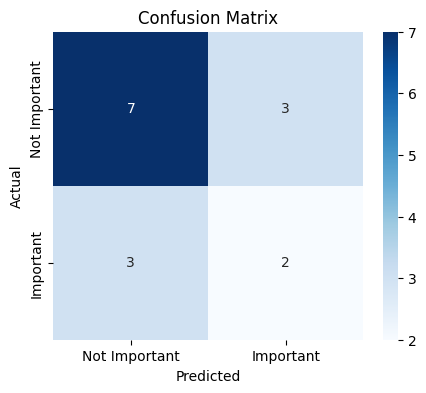

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Important", "Important"], yticklabels=["Not Important", "Important"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, log_loss

# Calculate Accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Calculate Log Loss (for probabilistic evaluation)
y_pred_proba = model.predict_proba(X_test_final)
logloss = log_loss(y_test_encoded, y_pred_proba)
print(f"Log Loss: {logloss:.4f}")


Model Accuracy: 0.6000
Log Loss: 0.7102


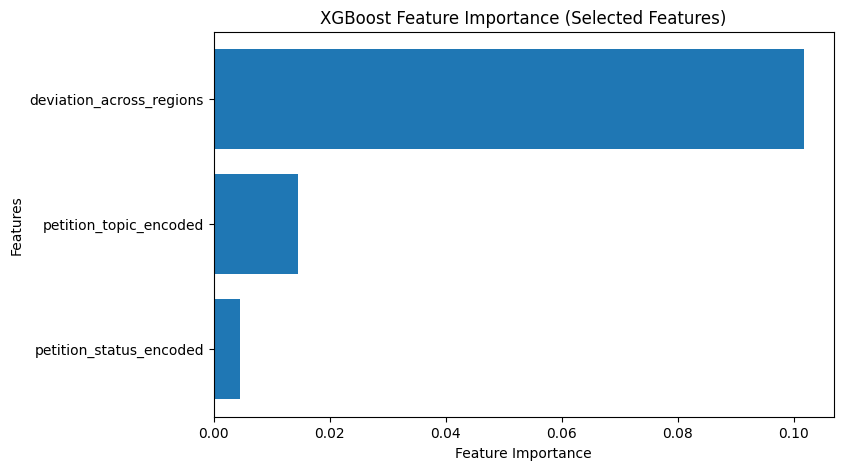

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the features to show
selected_features = ["deviation_across_regions", "petition_topic_encoded", "petition_status_encoded"]

feature_names = X_train_final.columns.astype(str)
importances = model.feature_importances_

mask = np.isin(feature_names, selected_features)

filtered_names = feature_names[mask]
filtered_importances = importances[mask]

sorted_idx = np.argsort(filtered_importances)

plt.figure(figsize=(8, 5))
plt.barh(range(len(sorted_idx)), filtered_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), filtered_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance (Selected Features)")
plt.show()


The feature deviation_across_regions was initially dominant in the model but posed an ethical concern due to its correlation with geographic popularity. Removing it reduced model bias but significantly hurt performance, especially recall for the “important” class. This demonstrates a clear trade-off between fairness and predictive power. In future iterations, incorporating petition text (via embeddings) may improve recall while maintaining fairness.

# Previos Model without Deviation

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Drop the 'deviation_across_regions' column from both train and test sets
X_train_reduced = X_train_final.drop(columns=["deviation_across_regions"])
X_test_reduced = X_test_final.drop(columns=["deviation_across_regions"])

# Initialize and train the model
model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
model.fit(X_train_reduced, y_train_encoded)

# Predict and evaluate
y_pred = model.predict(X_test_reduced)
print(classification_report(y_test_encoded, y_pred))


              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       1.00      0.20      0.33         5

    accuracy                           0.73        15
   macro avg       0.86      0.60      0.58        15
weighted avg       0.81      0.73      0.67        15



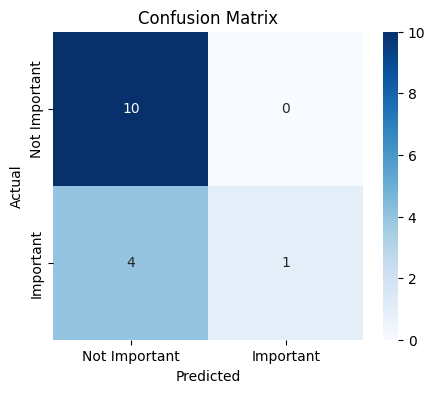

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Important", "Important"], yticklabels=["Not Important", "Important"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, log_loss

# Predict using reduced test set (with deviation column dropped)
y_pred = model.predict(X_test_reduced)

# Accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Predict probabilities using the same reduced test set
y_pred_proba = model.predict_proba(X_test_reduced)
logloss = log_loss(y_test_encoded, y_pred_proba)
print(f"Log Loss: {logloss:.4f}")


Model Accuracy: 0.7333
Log Loss: 0.6596


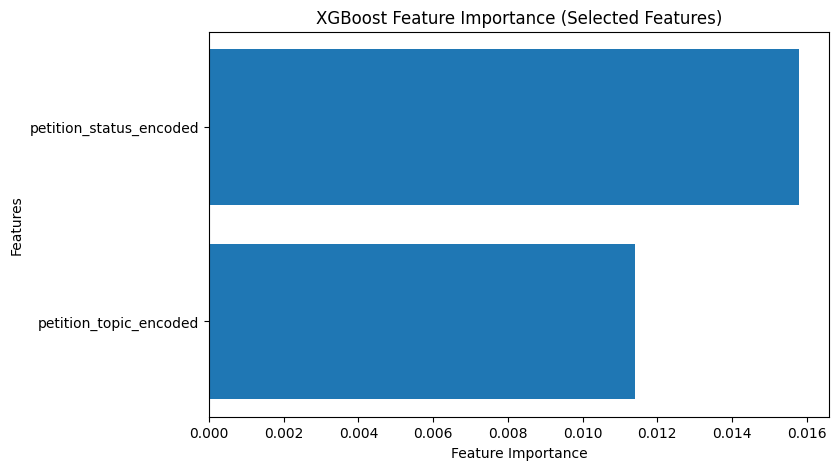

In [ ]:
selected_features = ["petition_topic_encoded", "petition_status_encoded"]

# Get feature names and importances
feature_names = X_train_final.drop(columns=["deviation_across_regions"]).columns.astype(str)
importances = model.feature_importances_

# Create mask for selected features
mask = np.isin(feature_names, selected_features)

# Filter names and importances
filtered_names = feature_names[mask]
filtered_importances = importances[mask]

# Sort for visualization
sorted_idx = np.argsort(filtered_importances)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(range(len(sorted_idx)), filtered_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), filtered_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance (Selected Features)")
plt.show()


# GB without status

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Drop the 'deviation_across_regions' column from both train and test sets
X_train_reduced = X_train_final.drop(columns=["petition_status_encoded"])
X_test_reduced = X_test_final.drop(columns=["petition_status_encoded"])

# Initialize and train the model
model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
model.fit(X_train_reduced, y_train_encoded)

# Predict and evaluate
y_pred = model.predict(X_test_reduced)
print(classification_report(y_test_encoded, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.40      0.40      0.40         5

    accuracy                           0.60        15
   macro avg       0.55      0.55      0.55        15
weighted avg       0.60      0.60      0.60        15



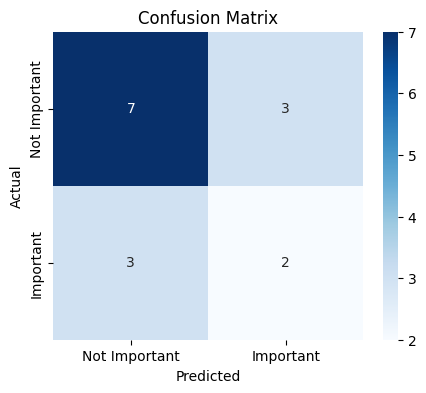

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Important", "Important"], yticklabels=["Not Important", "Important"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, log_loss

# Predict using reduced test set (with deviation column dropped)
y_pred = model.predict(X_test_reduced)

# Accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Predict probabilities using the same reduced test set
y_pred_proba = model.predict_proba(X_test_reduced)
logloss = log_loss(y_test_encoded, y_pred_proba)
print(f"Log Loss: {logloss:.4f}")


Model Accuracy: 0.6000
Log Loss: 0.7102


# GB Model Grid search with status

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=0
)

param_grid = {
    "n_estimators": [50, 100, 200],  # Fewer trees for small dataset
    "learning_rate": [0.05, 0.1, 0.2],  # Higher LR works fine with small data
    "max_depth": [2, 4, 6],  # Shallow trees prevent overfitting
    "min_child_weight": [1, 3],  # Controls leaf node splits
    "gamma": [0, 0.1],  # Regularization to reduce unnecessary splits
    "subsample": [0.7, 0.8],  # % of data per tree
    "colsample_bytree": [0.7, 0.8],  # % of features per tree
    "reg_lambda": [1, 5],  # Stronger L2 regularization to prevent overfitting
    "reg_alpha": [0, 1]  # L1 regularization (helps feature selection)
}

grid_search = GridSearchCV(
    model, param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=-1
)
grid_search.fit(X_train_final, y_train_encoded)

print(" Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
 Best Hyperparameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 5, 'subsample': 0.7}


In [ ]:
best_params = grid_search.best_params_

final_model = XGBClassifier(**best_params)
final_model.fit(X_train_final, y_train_encoded)

y_pred = final_model.predict(X_test_final)


In [ ]:
from sklearn.metrics import classification_report
print(" Classification Report:\n")
print(classification_report(y_test_encoded, y_pred))

accuracy = accuracy_score(y_test_encoded, y_pred)
print(f" Model Accuracy: {accuracy:.4f}")

 Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.40      0.40      0.40         5

    accuracy                           0.60        15
   macro avg       0.55      0.55      0.55        15
weighted avg       0.60      0.60      0.60        15

 Model Accuracy: 0.6000


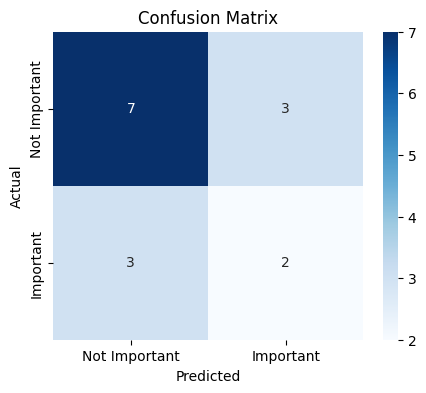

In [ ]:
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Important", "Important"], yticklabels=["Not Important", "Important"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import log_loss

y_pred_proba = final_model.predict_proba(X_test_final)

logloss = log_loss(y_test_encoded, y_pred_proba)
print(f"✅ Log Loss: {logloss:.4f}")


✅ Log Loss: 0.5607


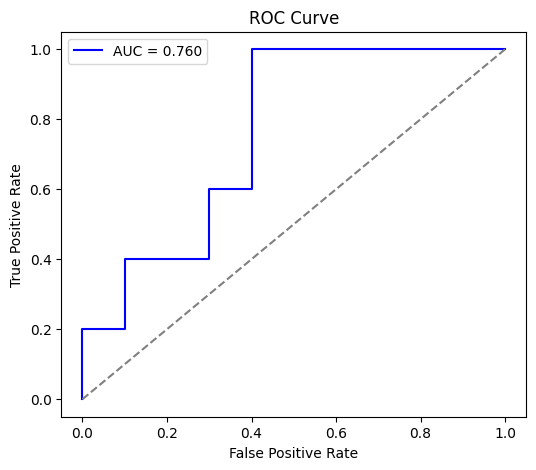

 AUC Score: 0.7600


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(f" AUC Score: {roc_auc:.4f}")


In [ ]:
y_pred_proba = final_model.predict_proba(X_test_final)

results_df = pd.DataFrame({
    "Actual": y_test_encoded,
    "Predicted": y_pred,
    "Confidence": y_pred_proba.max(axis=1)  # Get max probability (confidence score)
}, index=X_test_final.index)

misclassified_df = results_df[results_df["Actual"] != results_df["Predicted"]]

misclassified_df = misclassified_df.sort_values(by="Confidence", ascending=False)
print(" Misclassified Samples with Model Confidence:\n")
print(misclassified_df)


 Misclassified Samples with Model Confidence:

    Actual  Predicted  Confidence
33       0          1    0.807316
37       1          0    0.722875
24       0          1    0.715358
30       1          0    0.650051
32       0          1    0.551155
0        1          0    0.507490


In [ ]:
from sklearn.metrics import log_loss
y_train_proba = final_model.predict_proba(X_train_final)
y_test_proba = final_model.predict_proba(X_test_final)

train_log_loss = log_loss(y_train_encoded, y_train_proba)
test_log_loss = log_loss(y_test_encoded, y_test_proba)

print(f"Training Log Loss: {train_log_loss:.4f}")
print(f"Test Log Loss: {test_log_loss:.4f}")


Training Log Loss: 0.1154
Test Log Loss: 0.5607


In [ ]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_model = CalibratedClassifierCV(final_model, method='sigmoid', cv=5)
calibrated_model.fit(X_train_final, y_train_encoded)
y_proba = calibrated_model.predict_proba(X_test_final)[:, 1]


Should you keep topic?
Ethically: Yes, but acknowledge the risk.

    You’ve already tested that it doesn’t dominate predictions.

    You label without using it.

    You include it only as context for the model — this is acceptable.
status was dropped

# GB GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=0
)

param_grid = {
    "n_estimators": [50, 100, 200],  # Fewer trees for small dataset
    "learning_rate": [0.05, 0.1, 0.2],  # Higher LR works fine with small data
    "max_depth": [2, 4, 6],  # Shallow trees prevent overfitting
    "min_child_weight": [1, 3],  # Controls leaf node splits
    "gamma": [0, 0.1],  # Regularization to reduce unnecessary splits
    "subsample": [0.7, 0.8],  # % of data per tree
    "colsample_bytree": [0.7, 0.8],  # % of features per tree
    "reg_lambda": [1, 5],  # Stronger L2 regularization to prevent overfitting
    "reg_alpha": [0, 1]  # L1 regularization (helps feature selection)
}

grid_search = GridSearchCV(
    model, param_grid, cv=3, scoring="accuracy", verbose=1, n_jobs=-1
)
grid_search.fit(X_train_final, y_train_encoded)

print(" Best Hyperparameters:", grid_search.best_params_)


Fitting 3 folds for each of 1728 candidates, totalling 5184 fits
 Best Hyperparameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 50, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}


 Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.40      0.40      0.40         5

    accuracy                           0.60        15
   macro avg       0.55      0.55      0.55        15
weighted avg       0.60      0.60      0.60        15

 Model Accuracy: 0.6000


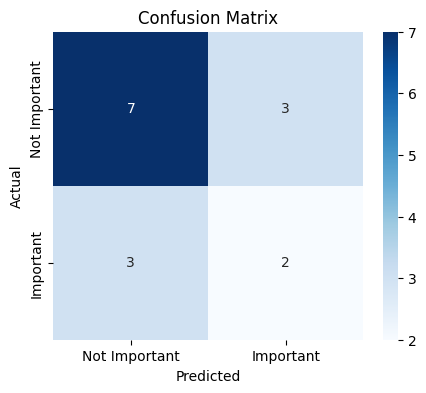

In [ ]:
best_params = grid_search.best_params_

final_model = XGBClassifier(**best_params)
final_model.fit(X_train_final, y_train_encoded)

y_pred = final_model.predict(X_test_final)
from sklearn.metrics import classification_report
print(" Classification Report:\n")
print(classification_report(y_test_encoded, y_pred))

accuracy = accuracy_score(y_test_encoded, y_pred)
print(f" Model Accuracy: {accuracy:.4f}")
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Important", "Important"], yticklabels=["Not Important", "Important"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import log_loss

y_pred_proba = final_model.predict_proba(X_test_final)

logloss = log_loss(y_test_encoded, y_pred_proba)
print(f" Log Loss: {logloss:.4f}")


 Log Loss: 0.5551


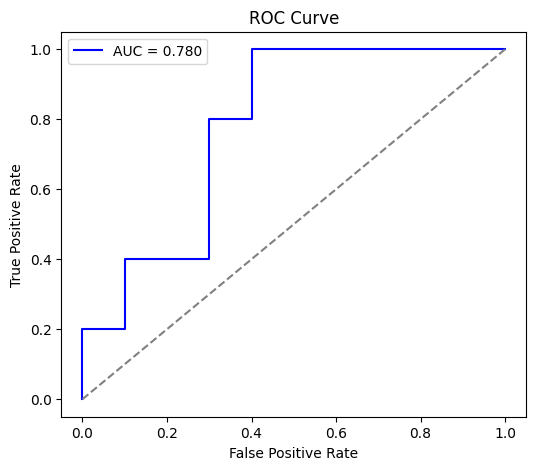

 AUC Score: 0.7800


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(f" AUC Score: {roc_auc:.4f}")


In [ ]:
y_pred_proba = final_model.predict_proba(X_test_final)

results_df = pd.DataFrame({
    "Actual": y_test_encoded,
    "Predicted": y_pred,
    "Confidence": y_pred_proba.max(axis=1)  # Get max probability (confidence score)
}, index=X_test_final.index)

misclassified_df = results_df[results_df["Actual"] != results_df["Predicted"]]

misclassified_df = misclassified_df.sort_values(by="Confidence", ascending=False)
print(" Misclassified Samples with Model Confidence:\n")
print(misclassified_df)


 Misclassified Samples with Model Confidence:

    Actual  Predicted  Confidence
24       0          1    0.797076
37       1          0    0.639589
33       0          1    0.621772
30       1          0    0.605237
0        1          0    0.603313
32       0          1    0.599871


In [ ]:

misclassified_df = pd.DataFrame({
    'true_label': y_test_encoded,
    'predicted_label': y_pred
})

# Filter where prediction doesn't match ground truth
misclassified_df = misclassified_df[misclassified_df['true_label'] != misclassified_df['predicted_label']]

print(f"Number of misclassified samples: {len(misclassified_df)}")
misclassified_df.head()


Number of misclassified samples: 6


true_label  predicted_label
2            0                1
3            1                0
5            0                1
10           1                0
11           1                0

#  **Full Code Cell for XGBoost + Grid Search with Class Weight Kfold**
too complex for this task

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
import numpy as np

# Compute class imbalance ratio
class_counts = np.bincount(y_train_encoded)
neg, pos = class_counts[0], class_counts[1]
print(f"Class 0: {neg}, Class 1: {pos}, Ratio = {neg / pos:.2f}")

# Set up cross-validation with stratified folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Base model
model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=0
)

# Parameter grid for exhaustive search
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [2, 4, 6],
    "min_child_weight": [1, 3],
    "gamma": [0, 0.1],
    "subsample": [0.7, 0.8],
    "colsample_bytree": [0.7, 0.8],
    "reg_lambda": [1, 5],
    "reg_alpha": [0, 1],
    "scale_pos_weight": [1, 3, 5, int(neg / pos)]
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=cv,
    scoring="f1",  # Better than accuracy for imbalance
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_final, y_train_encoded)

# Output best model and hyperparameters
print("Best F1 Score:", grid_search.best_score_)
print("Best Hyperparameters:", grid_search.best_params_)


Class 0: 54, Class 1: 31, Ratio = 1.74
Fitting 5 folds for each of 6912 candidates, totalling 34560 fits
Best F1 Score: 0.8230769230769232
Best Hyperparameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 5, 'subsample': 0.8}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:04:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Rebuild the model with best parameters
best_model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=0,
    **grid_search.best_params_
)

# Fit it on full training set
best_model.fit(X_train_final, y_train_encoded)

# Predict on test set
y_pred = best_model.predict(X_test_final)
y_pred_proba = best_model.predict_proba(X_test_final)


Accuracy: 0.6667
F1 Score (binary): 0.6667
F1 Score (macro): 0.6667
F1 Score (micro): 0.6667
Precision: 0.5000
Recall: 1.0000
AUC-ROC: 0.7200
Log Loss: 0.7676

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.50      1.00      0.67         5

    accuracy                           0.67        15
   macro avg       0.75      0.75      0.67        15
weighted avg       0.83      0.67      0.67        15



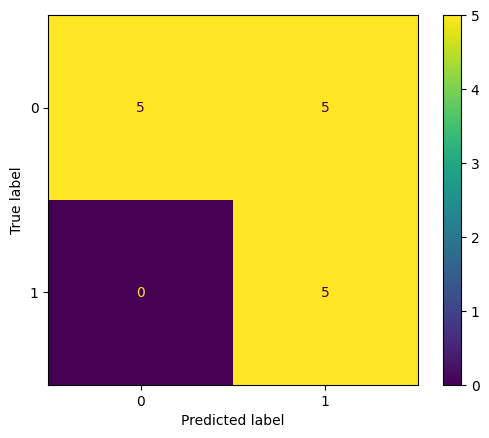

In [ ]:
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    roc_auc_score, log_loss, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)

# Binary predictions
y_pred = best_model.predict(X_test_final)

# Predicted probabilities
y_pred_proba = best_model.predict_proba(X_test_final)[:, 1]  # Probabilities for class 1

# Accuracy
acc = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {acc:.4f}")

# F1 Scores
print(f"F1 Score (binary): {f1_score(y_test_encoded, y_pred):.4f}")
print(f"F1 Score (macro): {f1_score(y_test_encoded, y_pred, average='macro'):.4f}")
print(f"F1 Score (micro): {f1_score(y_test_encoded, y_pred, average='micro'):.4f}")

# Precision and Recall
print(f"Precision: {precision_score(y_test_encoded, y_pred):.4f}")
print(f"Recall: {recall_score(y_test_encoded, y_pred):.4f}")

# ROC AUC
print(f"AUC-ROC: {roc_auc_score(y_test_encoded, y_pred_proba):.4f}")

# Log Loss
print(f"Log Loss: {log_loss(y_test_encoded, y_pred_proba):.4f}")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test_encoded, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_pred)


In [ ]:
from sklearn.metrics import log_loss

y_pred_proba = final_model.predict_proba(X_test_final)

logloss = log_loss(y_test_encoded, y_pred_proba)
print(f" Log Loss: {logloss:.4f}")


 Log Loss: 0.5551


In [ ]:
y_pred_proba = final_model.predict_proba(X_test_final)

results_df = pd.DataFrame({
    "Actual": y_test_encoded,
    "Predicted": y_pred,
    "Confidence": y_pred_proba.max(axis=1)  # Get max probability (confidence score)
}, index=X_test_final.index)

misclassified_df = results_df[results_df["Actual"] != results_df["Predicted"]]

misclassified_df = misclassified_df.sort_values(by="Confidence", ascending=False)
print(" Misclassified Samples with Model Confidence:\n")
print(misclassified_df)


 Misclassified Samples with Model Confidence:

    Actual  Predicted  Confidence
14       0          1    0.797076
13       0          1    0.651324
5        0          1    0.621772
9        0          1    0.616800
2        0          1    0.599871


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Rebuild model with best hyperparameters
best_model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=0,
    colsample_bytree=0.7,
    gamma=0,
    learning_rate=0.05,
    max_depth=4,
    min_child_weight=1,
    n_estimators=100,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=5,
    subsample=0.8
)

# Fit to training data
best_model.fit(X_train_final, y_train_encoded)

# Predict on both train and test sets
y_train_pred = best_model.predict(X_train_final)
y_test_pred = best_model.predict(X_test_final)

# Compare F1 scores
train_f1 = f1_score(y_train_encoded, y_train_pred, pos_label=0)
test_f1 = f1_score(y_test_encoded, y_test_pred, pos_label=0)

print("=== TRAINING SET ===")
print(classification_report(y_train_encoded, y_train_pred))
print(f"Train F1 (Important class): {train_f1:.4f}")

print("\n=== TEST SET ===")
print(classification_report(y_test_encoded, y_test_pred))
print(f"Test F1 (Important class): {test_f1:.4f}")

# Optional: check for overfitting
overfit_gap = train_f1 - test_f1
print(f"\nF1 Score Overfit Gap (Train - Test): {overfit_gap:.4f}")


=== TRAINING SET ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        31

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85

Train F1 (Important class): 1.0000

=== TEST SET ===
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.50      1.00      0.67         5

    accuracy                           0.67        15
   macro avg       0.75      0.75      0.67        15
weighted avg       0.83      0.67      0.67        15

Test F1 (Important class): 0.6667

F1 Score Overfit Gap (Train - Test): 0.3333


# xGB light model


=== TRAIN SET ===
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.89      1.00      0.94        31

    accuracy                           0.95        85
   macro avg       0.94      0.96      0.95        85
weighted avg       0.96      0.95      0.95        85

Train F1 (Important class): 0.9615

=== TEST SET ===
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.50      1.00      0.67         5

    accuracy                           0.67        15
   macro avg       0.75      0.75      0.67        15
weighted avg       0.83      0.67      0.67        15

Test F1 (Important class): 0.6667

F1 Score Overfit Gap (Train - Test): 0.2949


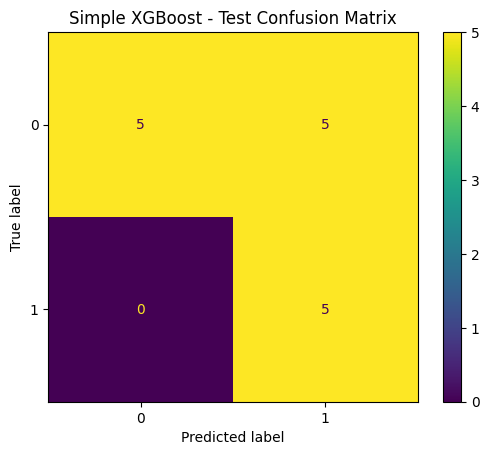

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Simpler XGBoost model for small dataset (no early stopping)
simple_model = XGBClassifier(
    objective="binary:logistic",
    learning_rate=0.1,
    max_depth=2,
    n_estimators=50,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.5,
    reg_lambda=1,
    scale_pos_weight=5,
    random_state=0,
    eval_metric="logloss"  # Set here instead of in .fit()
)

# Train without early stopping
simple_model.fit(X_train_final, y_train_encoded)

# Predictions
y_train_pred = simple_model.predict(X_train_final)
y_test_pred = simple_model.predict(X_test_final)

# Evaluate
train_f1 = f1_score(y_train_encoded, y_train_pred, pos_label=0)
test_f1 = f1_score(y_test_encoded, y_test_pred, pos_label=0)
overfit_gap = train_f1 - test_f1

print("\n=== TRAIN SET ===")
print(classification_report(y_train_encoded, y_train_pred))
print(f"Train F1 (Important class): {train_f1:.4f}")

print("\n=== TEST SET ===")
print(classification_report(y_test_encoded, y_test_pred))
print(f"Test F1 (Important class): {test_f1:.4f}")
print(f"\nF1 Score Overfit Gap (Train - Test): {overfit_gap:.4f}")

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_test_pred)
plt.title("Simple XGBoost - Test Confusion Matrix")
plt.show()


scale_pos_weight = 0.57 (1 = not_important, 0 = important)

=== CLASSIFICATION REPORT (TEST SET) ===
               precision    recall  f1-score   support

    important       0.67      1.00      0.80        10
not_important       0.00      0.00      0.00         5

     accuracy                           0.67        15
    macro avg       0.33      0.50      0.40        15
 weighted avg       0.44      0.67      0.53        15

Train Accuracy:     0.6353
Test Accuracy:      0.6667
Train ROC-AUC:      0.9301
Test ROC-AUC:       0.7000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:44:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

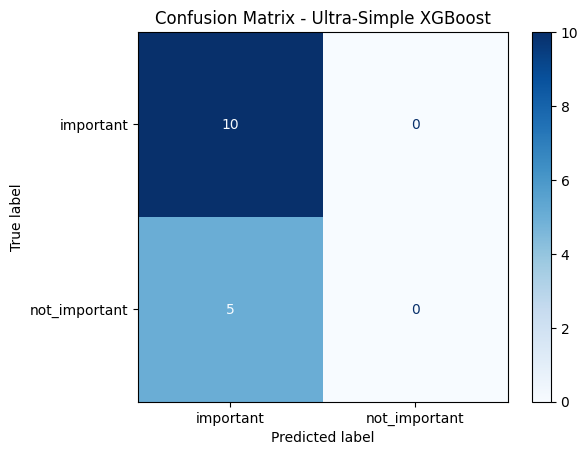

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_auc_score
)
import matplotlib.pyplot as plt
import numpy as np

# 1. Compute class imbalance ratio
important_count = np.sum(y_train_encoded == 0)
not_important_count = np.sum(y_train_encoded == 1)
scale_ratio = not_important_count / important_count
print(f"scale_pos_weight = {scale_ratio:.2f} (1 = not_important, 0 = important)")

# 2. Define ultra-simple XGBoost model
model = XGBClassifier(
    n_estimators=30,         # very few trees
    max_depth=1,             # stump-level trees
    learning_rate=0.03,      # very cautious learning
    scale_pos_weight=scale_ratio,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

# 3. Train the model
model.fit(X_train_final, y_train_encoded)

# 4. Predict on train and test
y_train_pred = model.predict(X_train_final)
y_test_pred = model.predict(X_test_final)

# 5. Probabilities for ROC-AUC
y_train_proba = model.predict_proba(X_train_final)[:, 1]
y_test_proba = model.predict_proba(X_test_final)[:, 1]

# 6. Metrics
train_acc = accuracy_score(y_train_encoded, y_train_pred)
test_acc = accuracy_score(y_test_encoded, y_test_pred)
train_auc = roc_auc_score(y_train_encoded, y_train_proba)
test_auc = roc_auc_score(y_test_encoded, y_test_proba)

# 7. Results
print("\n=== CLASSIFICATION REPORT (TEST SET) ===")
print(classification_report(y_test_encoded, y_test_pred, target_names=["important", "not_important"]))

print(f"Train Accuracy:     {train_acc:.4f}")
print(f"Test Accuracy:      {test_acc:.4f}")
print(f"Train ROC-AUC:      {train_auc:.4f}")
print(f"Test ROC-AUC:       {test_auc:.4f}")

# 8. Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["important", "not_important"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Ultra-Simple XGBoost")
plt.show()


# **Simple XG Boost - Final Model**

scale_pos_weight = 0.57 (1 = not_important, 0 = important)

=== TRAIN SET REPORT ===
               precision    recall  f1-score   support

    important       0.73      1.00      0.84        54
not_important       1.00      0.35      0.52        31

     accuracy                           0.76        85
    macro avg       0.86      0.68      0.68        85
 weighted avg       0.83      0.76      0.73        85

Train F1 (important): 0.8438

=== TEST SET REPORT ===
               precision    recall  f1-score   support

    important       0.71      1.00      0.83        10
not_important       1.00      0.20      0.33         5

     accuracy                           0.73        15
    macro avg       0.86      0.60      0.58        15
 weighted avg       0.81      0.73      0.67        15

Test F1 (important): 0.8333

Overfit Gap (Train - Test F1): 0.0104
 No significant overfitting.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:59:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


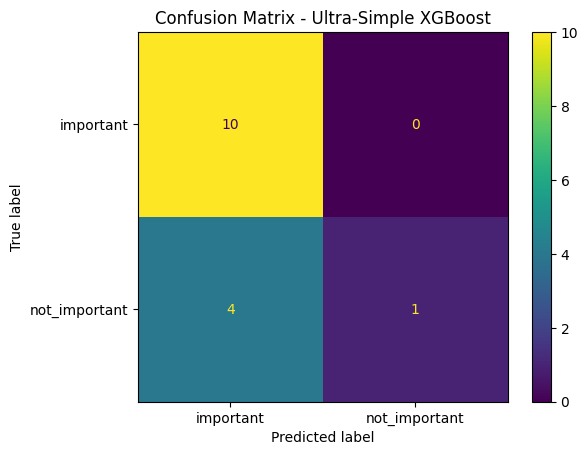

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, f1_score
)
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Compute scale_pos_weight
important_count = np.sum(y_train_encoded == 0)
not_important_count = np.sum(y_train_encoded == 1)
scale_ratio = not_important_count / important_count
print(f"scale_pos_weight = {scale_ratio:.2f} (1 = not_important, 0 = important)")

# Step 2: Define ultra-simple XGBoost
xgb_model = XGBClassifier(
    n_estimators=30,          # very small number of trees
    max_depth=1,              # stump-level trees (very simple)
    learning_rate=0.1,
    scale_pos_weight=scale_ratio,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"     # required for newer xgboost versions
)

# Step 3: Fit (handles NaNs internally)
xgb_model.fit(X_train_final, y_train_encoded)

# Step 4: Predict
y_train_pred = xgb_model.predict(X_train_final)
y_test_pred = xgb_model.predict(X_test_final)

# Step 5: Evaluate
f1_train = f1_score(y_train_encoded, y_train_pred, pos_label=0)
f1_test = f1_score(y_test_encoded, y_test_pred, pos_label=0)
overfit_gap = f1_train - f1_test

print("\n=== TRAIN SET REPORT ===")
print(classification_report(y_train_encoded, y_train_pred, target_names=["important", "not_important"]))
print(f"Train F1 (important): {f1_train:.4f}")

print("\n=== TEST SET REPORT ===")
print(classification_report(y_test_encoded, y_test_pred, target_names=["important", "not_important"]))
print(f"Test F1 (important): {f1_test:.4f}")

print(f"\nOverfit Gap (Train - Test F1): {overfit_gap:.4f}")
if overfit_gap < 0.1:
    print(" No significant overfitting.")
elif overfit_gap < 0.2:
    print(" Mild overfitting.")
else:
    print(" Likely overfitting.")

# Step 6: Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_test_pred, display_labels=["important", "not_important"])
plt.title("Confusion Matrix - Ultra-Simple XGBoost")
plt.show()


ROC-AUC Score (Test): 0.7900
Log Loss (Test): 0.5377
Average Classification Confidence: 0.6929


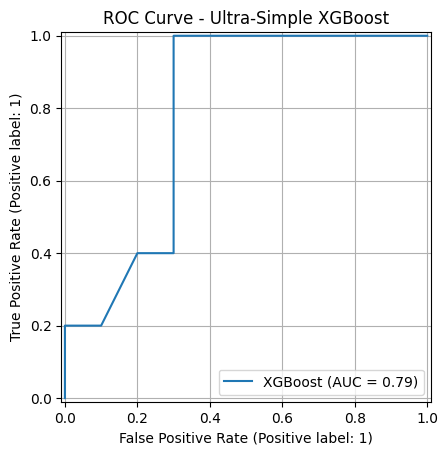

In [ ]:
from sklearn.metrics import (
    roc_auc_score, log_loss, RocCurveDisplay
)
import numpy as np
import matplotlib.pyplot as plt

# 1. Probabilities for test set
y_test_probs = xgb_model.predict_proba(X_test_final)[:, 1]  # Probability of class 1 (not_important)

# 2. ROC-AUC Score
roc_auc = roc_auc_score(y_test_encoded, y_test_probs)
print(f"ROC-AUC Score (Test): {roc_auc:.4f}")

# 3. Log Loss
logloss = log_loss(y_test_encoded, y_test_probs)
print(f"Log Loss (Test): {logloss:.4f}")

# 4. Classification Confidence (mean predicted prob of predicted class)
y_test_preds = xgb_model.predict(X_test_final)
y_test_confidence = xgb_model.predict_proba(X_test_final).max(axis=1)
avg_conf = np.mean(y_test_confidence)
print(f"Average Classification Confidence: {avg_conf:.4f}")

# 5. Plot ROC Curve
RocCurveDisplay.from_predictions(y_test_encoded, y_test_probs, name="XGBoost")
plt.title("ROC Curve - Ultra-Simple XGBoost")
plt.grid(True)
plt.show()


In [ ]:
# Step 0: Ensure your original DataFrame includes text and matches test set rows
# We'll assume you split it earlier like:
# X_test_final comes from df_with_text = original_df.drop(columns=['label_column'])

# Step 1: Re-attach the original petition text
misclassified_df = X_test_final.copy()
misclassified_df["true_label"] = y_test_encoded
misclassified_df["predicted_label"] = y_test_preds
misclassified_df["predicted_confidence"] = confidence

# Step 2: Add petition text back in (from the original DataFrame)
# Make sure row indices match! If they don't, you may need to reset/re-align
misclassified_df["petition_text"] = df_pre_split.loc[X_test_final.index, "petition_text"]

# Step 3: Filter misclassified samples
misclassified_df = misclassified_df[misclassified_df["true_label"] != misclassified_df["predicted_label"]]

# Step 4: View top 5 most confident misclassifications
misclassified_df = misclassified_df.sort_values(by="predicted_confidence", ascending=False)
misclassified_df.reset_index(drop=True, inplace=True)

# Display
misclassified_df[["petition_text", "true_label", "predicted_label", "predicted_confidence"]].head()


petition_text  true_label  \
0  Introduce mandatory neutering of pet cats. In ...           1   
1  Ban school uniforms in English schools. I want...           1   
2  Temporary stop to TV and Radio advertisements ...           1   
3  Ban all aircraft that run on fossil fuels by 2...           1   

   predicted_label  predicted_confidence  
0                0              0.683138  
1                0              0.683138  
2                0              0.624476  
3                0              0.571456